# First Attempt For Project Code


### Topic: Stellar Merger Remnant between MW and M31

Question that I will be addressing in the code: What class of galaxy will the merger of M31 and MW most closely resemble?


Outline for this code: In order to look at what class of galaxy the merger will result in, I will be doing two different plots:
1. Plotting the Sersic Profile of the stellar disk particles of M31 and MW. For both of these profiles I will be looking at how they compare to the profile for an elliptical galaxy and a spiral galaxy
2. Plotting the x and y position of the stellar disk particles of M31 and MW. I will be using this to do a visual comparison of what the merger looks like compared to the sersic profile given
    - note: at the moment for both of these galaxies I am only considering the stellar disk and not the stellar particles in the bulge- I am hoping to add these later in the simulation

In [3]:
#import Modules

# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

In [1]:
""" Note: All of this will be in one for loop- I hope to plot 
the 2D image and the sersic profile side by side"""

' Note: All of this will be in one for loop- I hope to plot \nthe 2D image and the sersic profile side by side'

0000


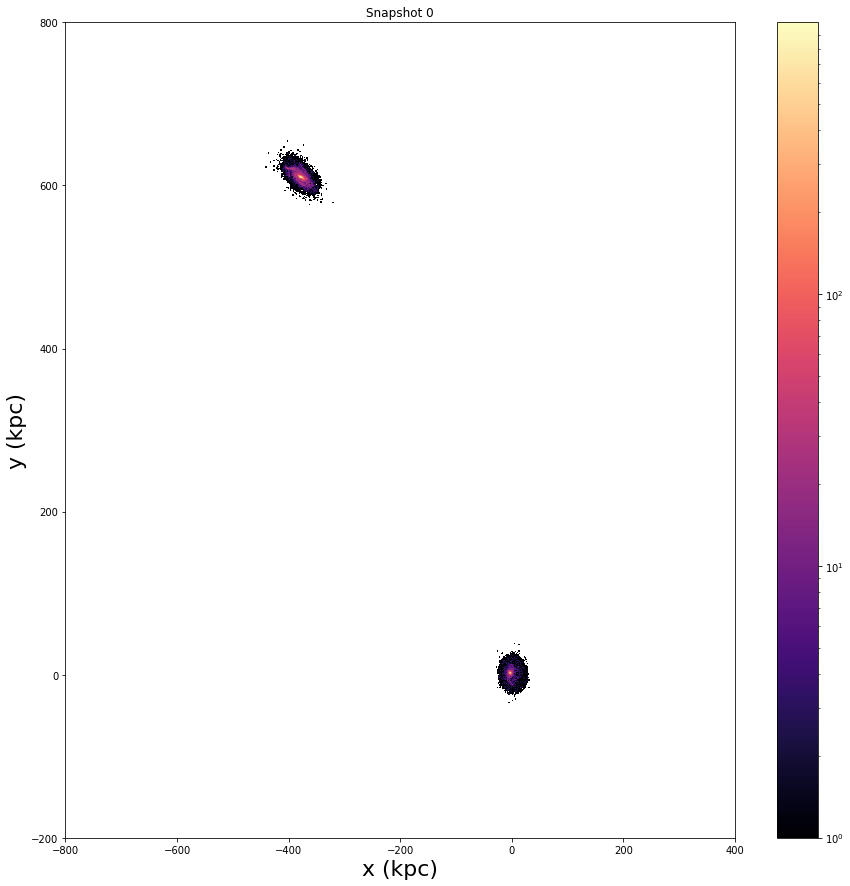

0005


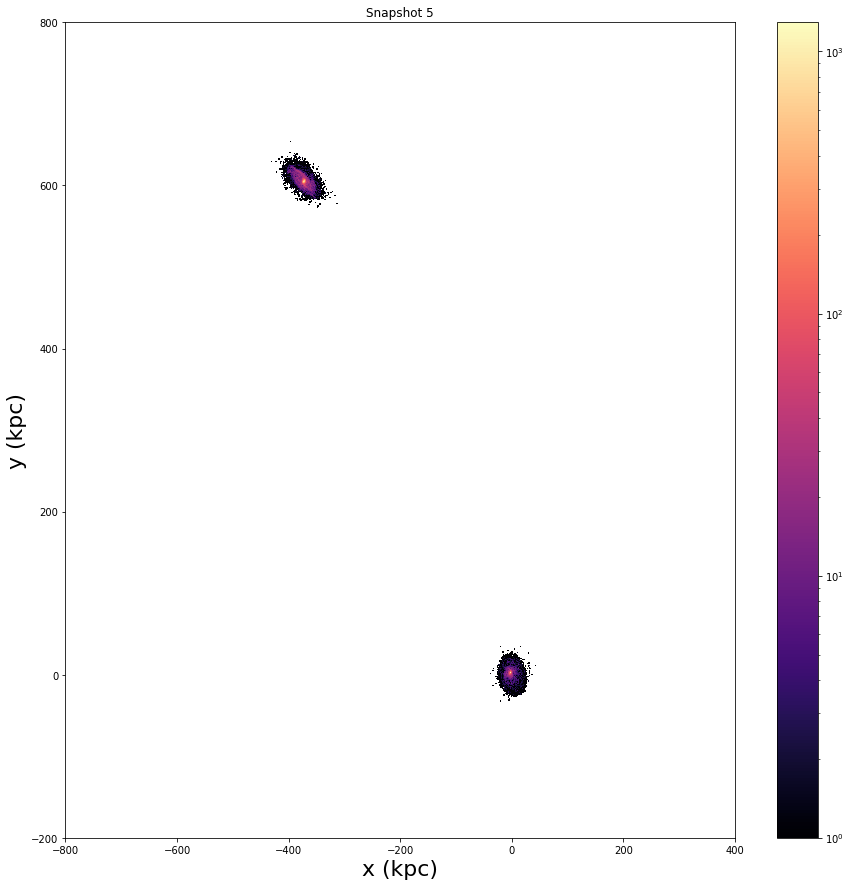

00010


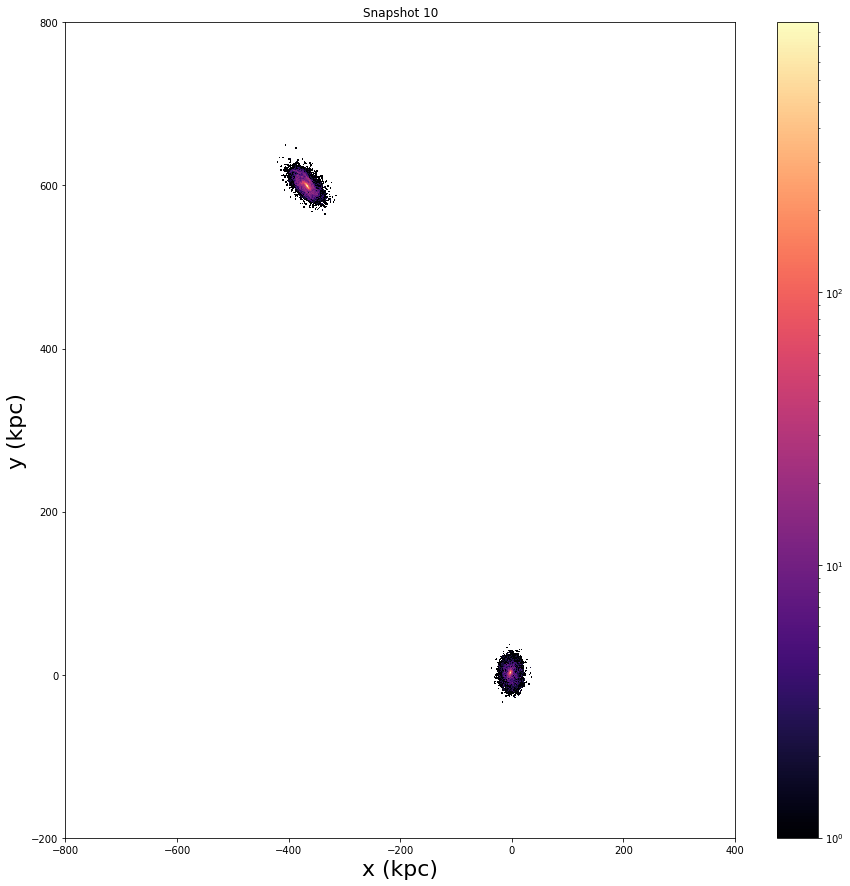

00015


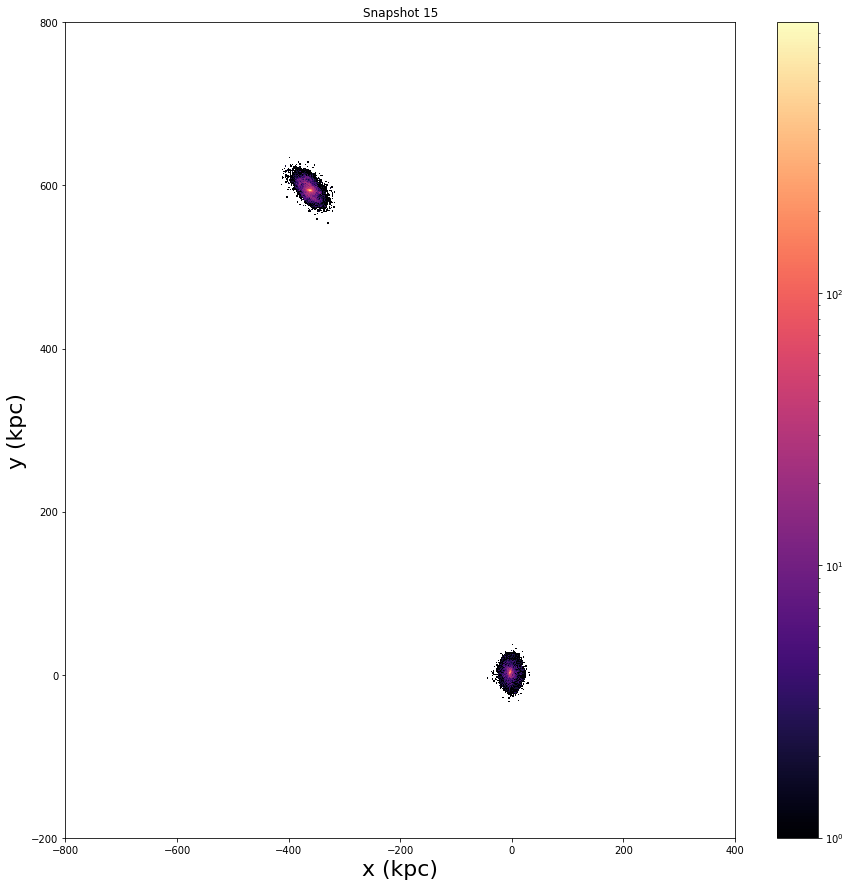

00020


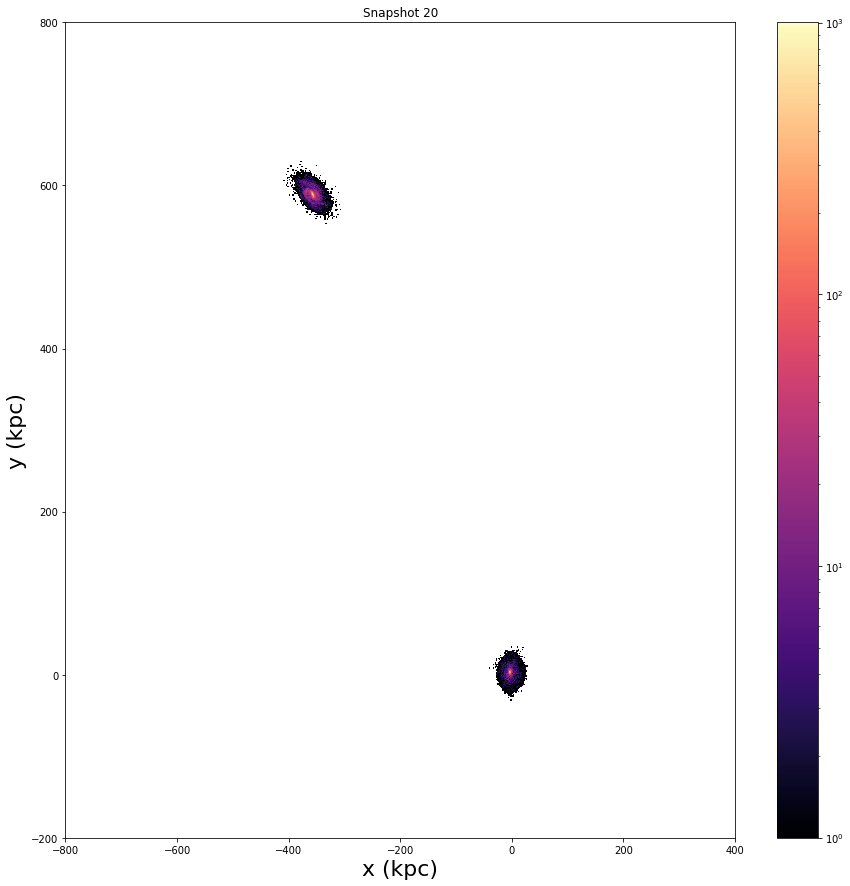

00025


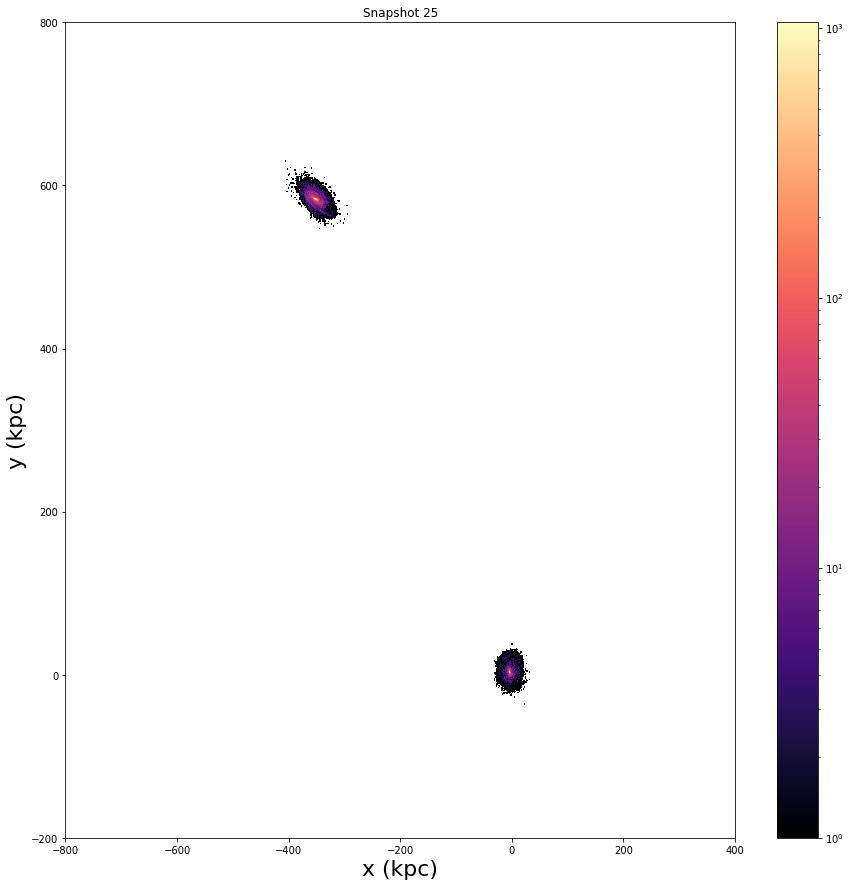

00030


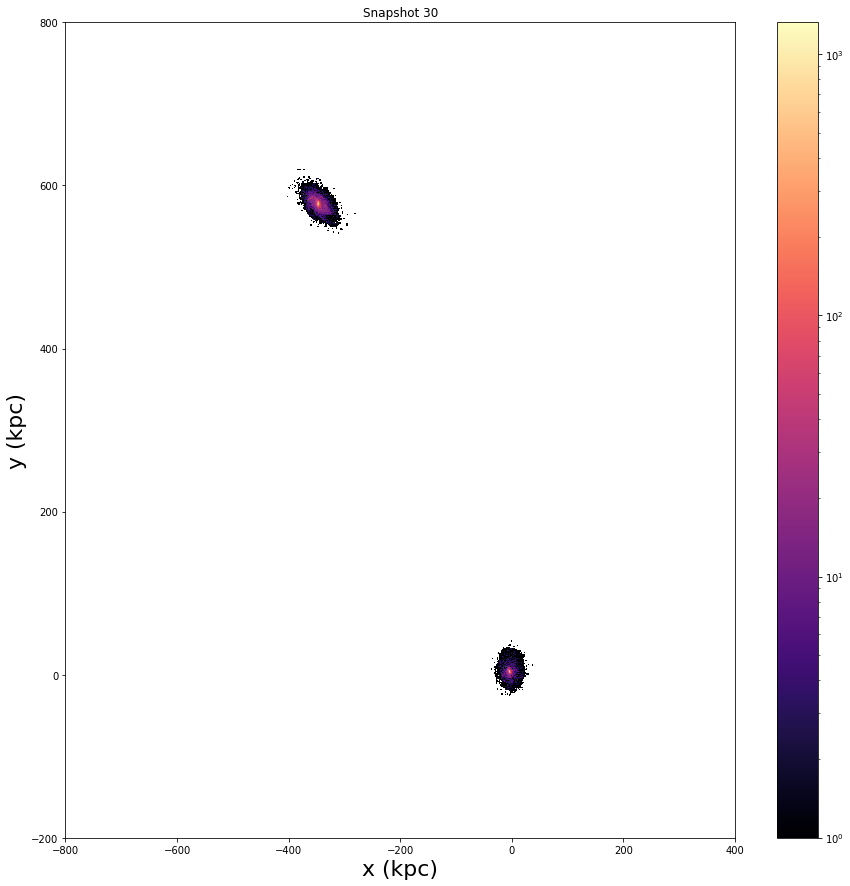

00035


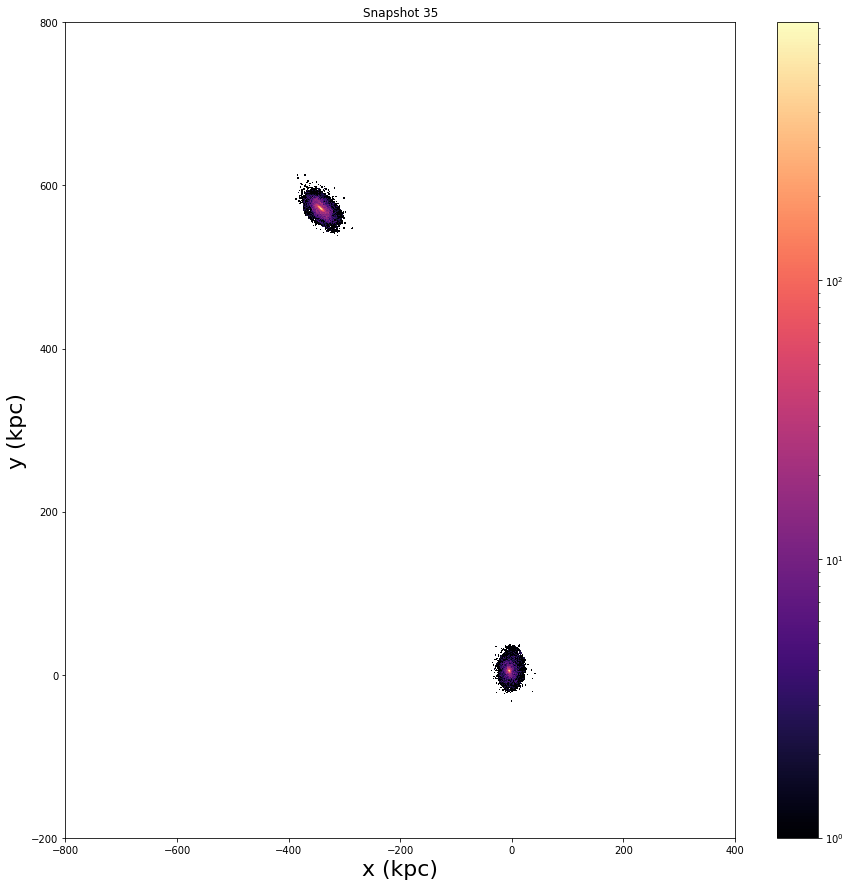

00040


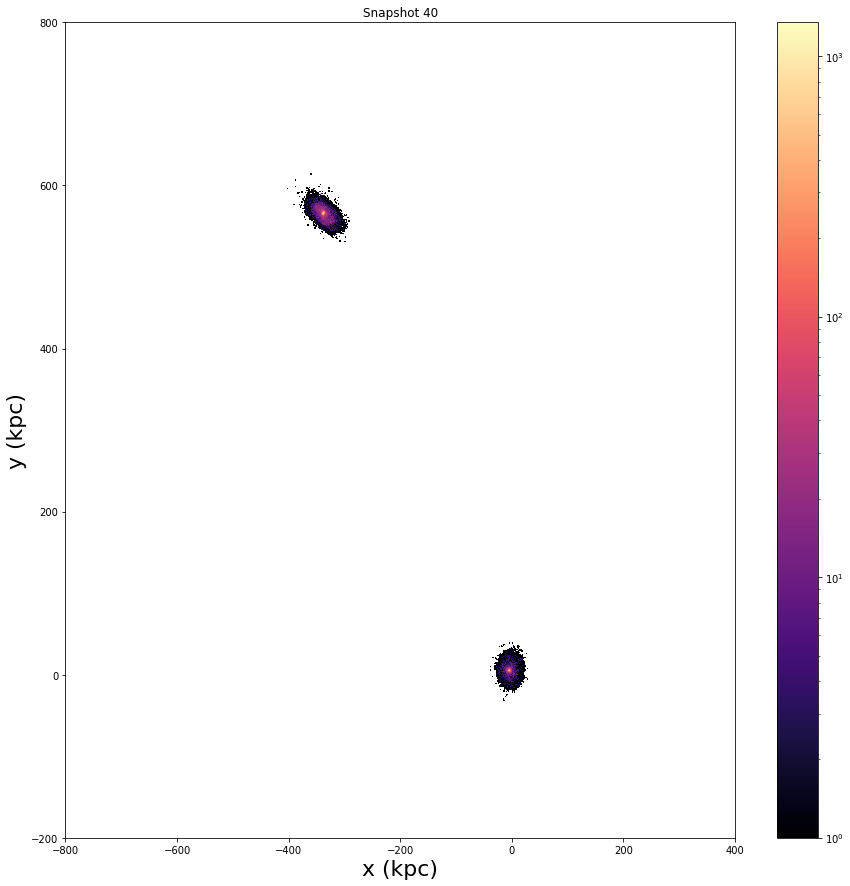

00045


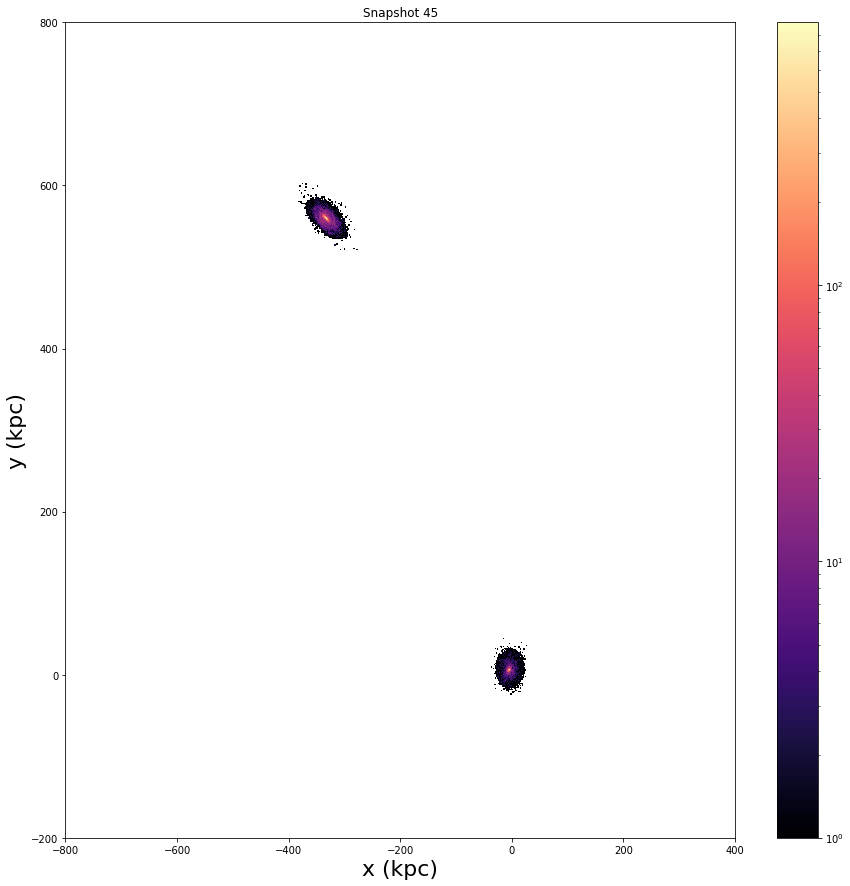

00050


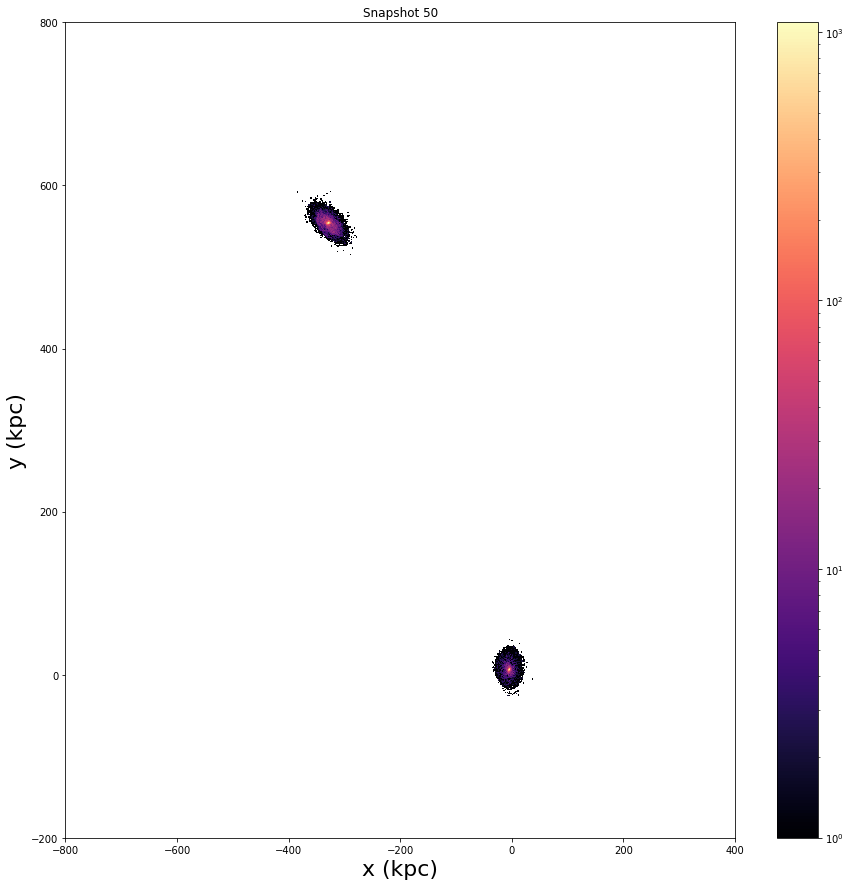

00055


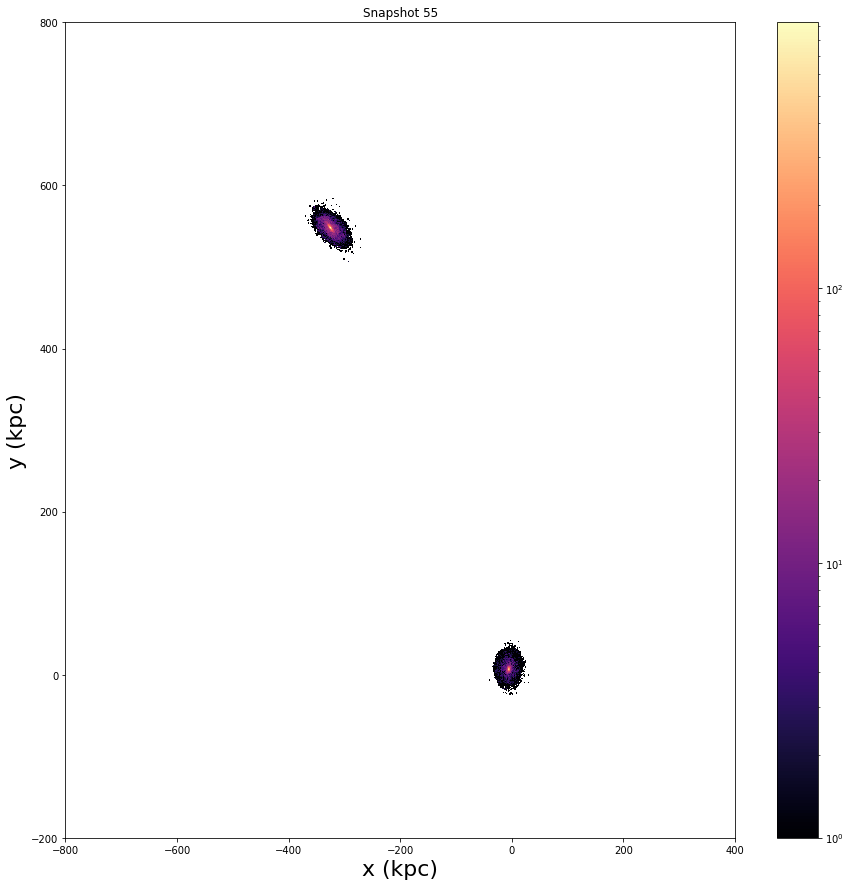

00060


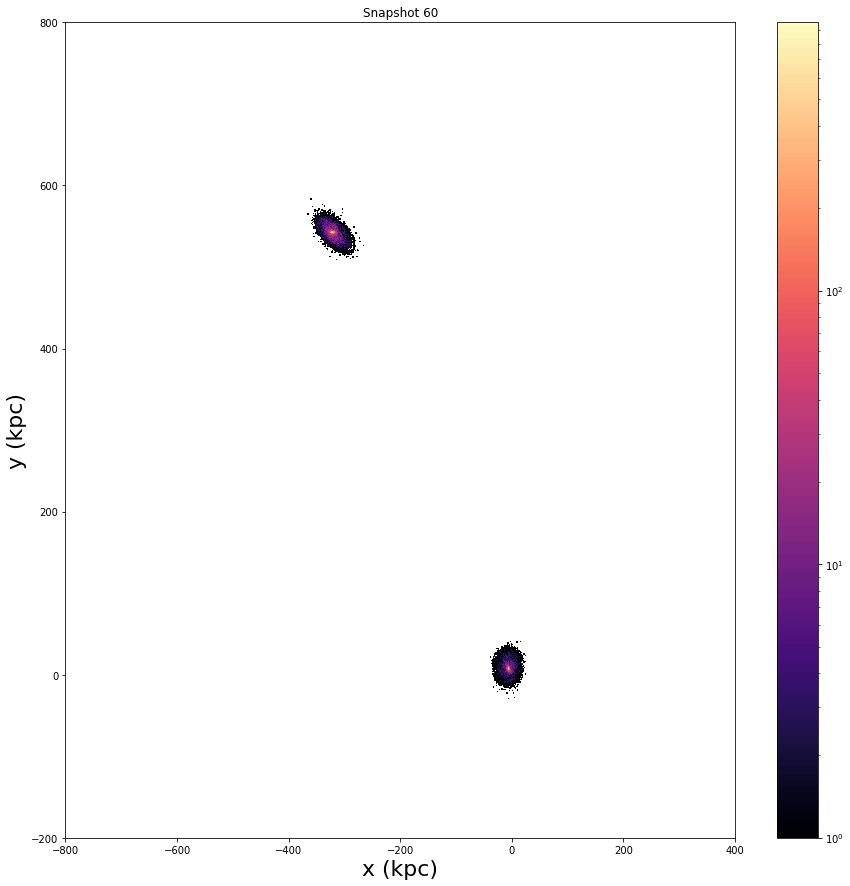

00065


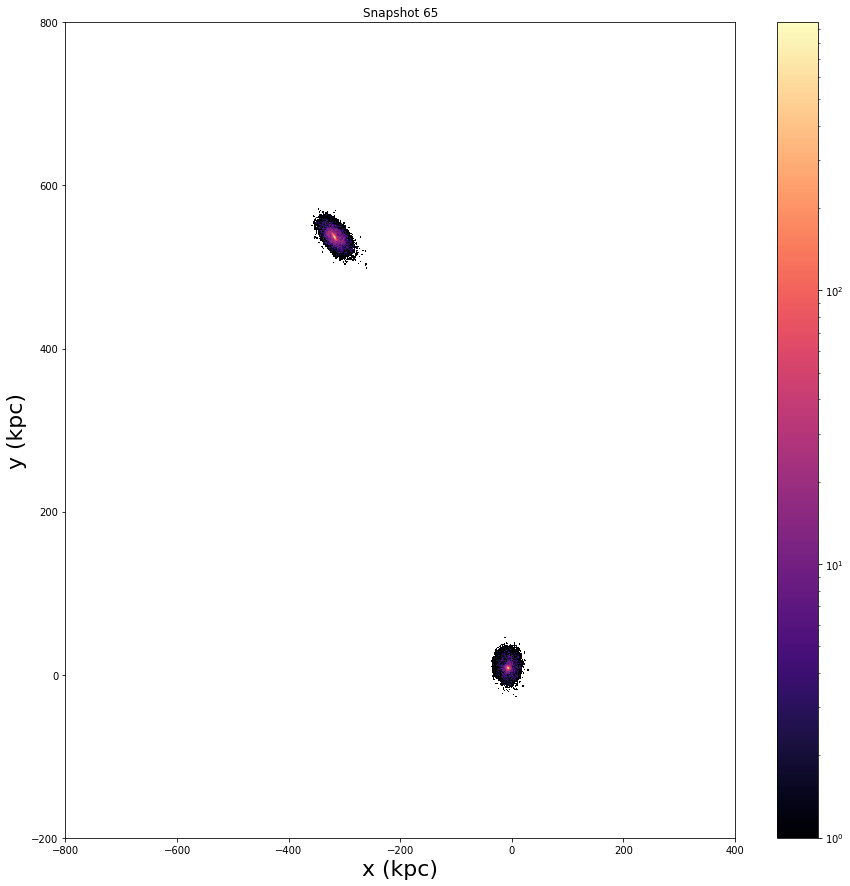

00070


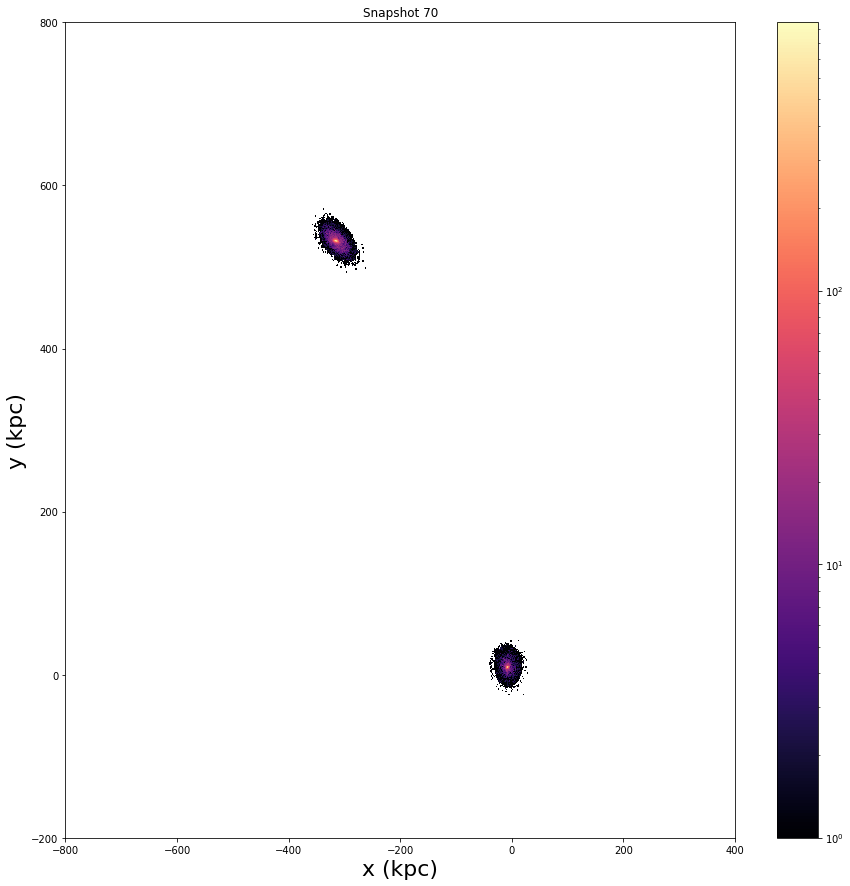

00075


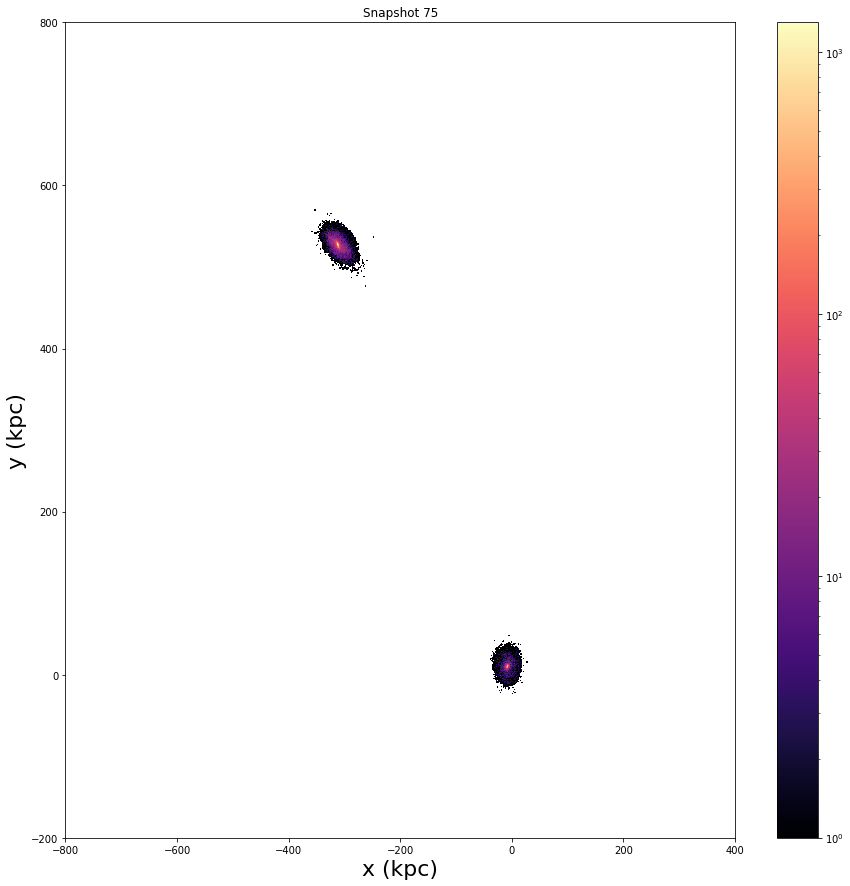

00080


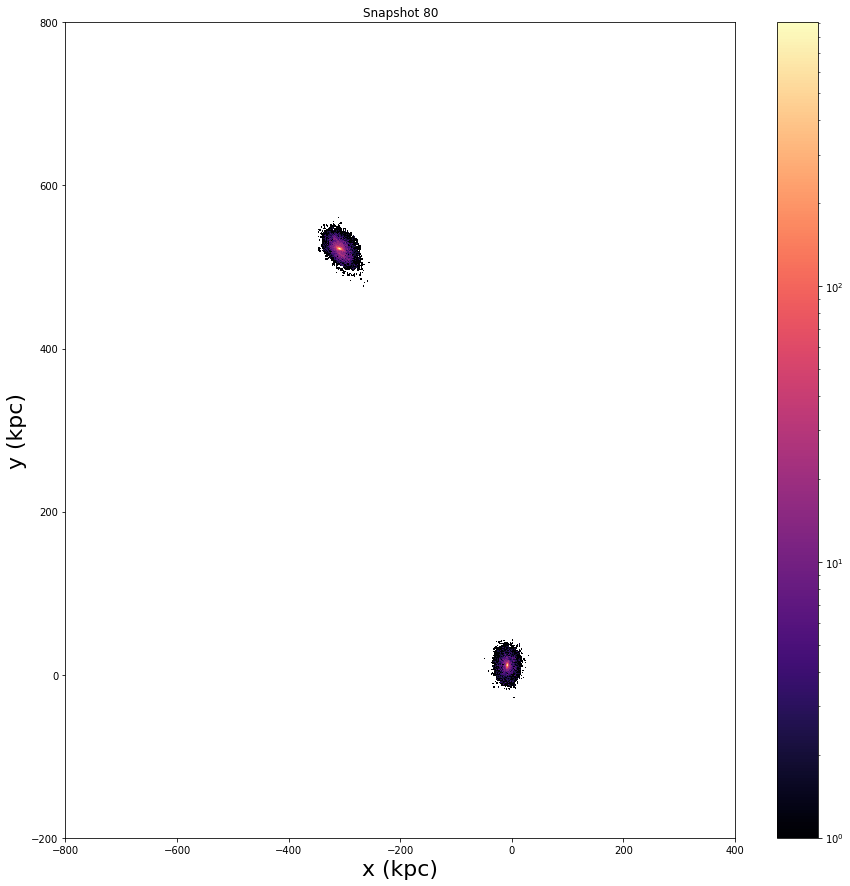

00085


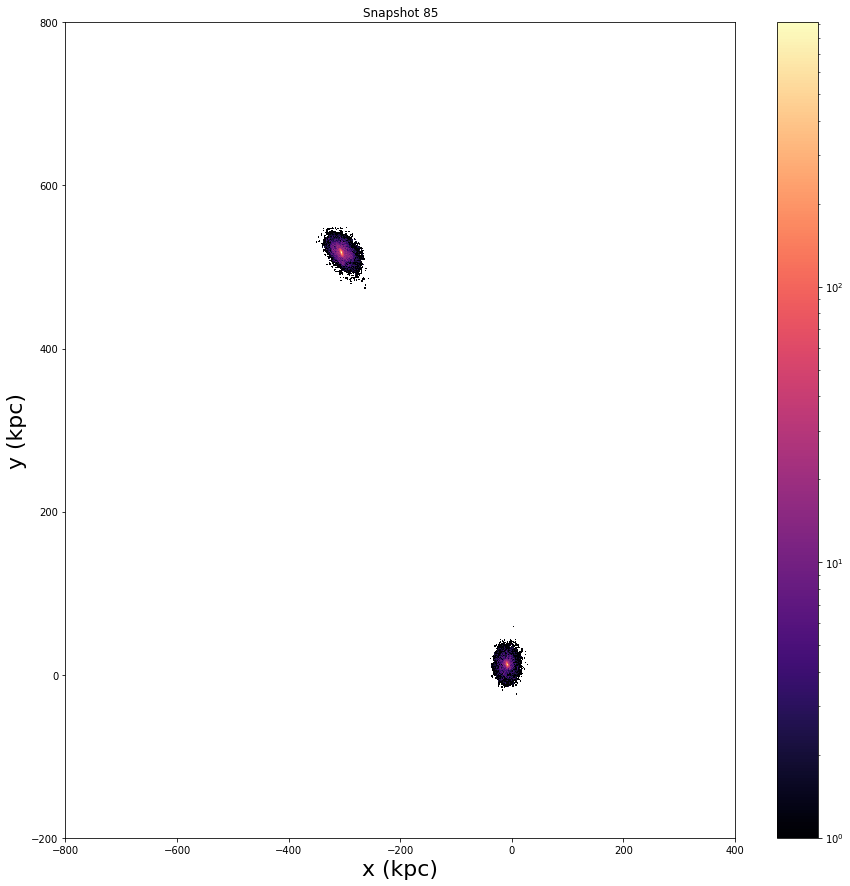

00090


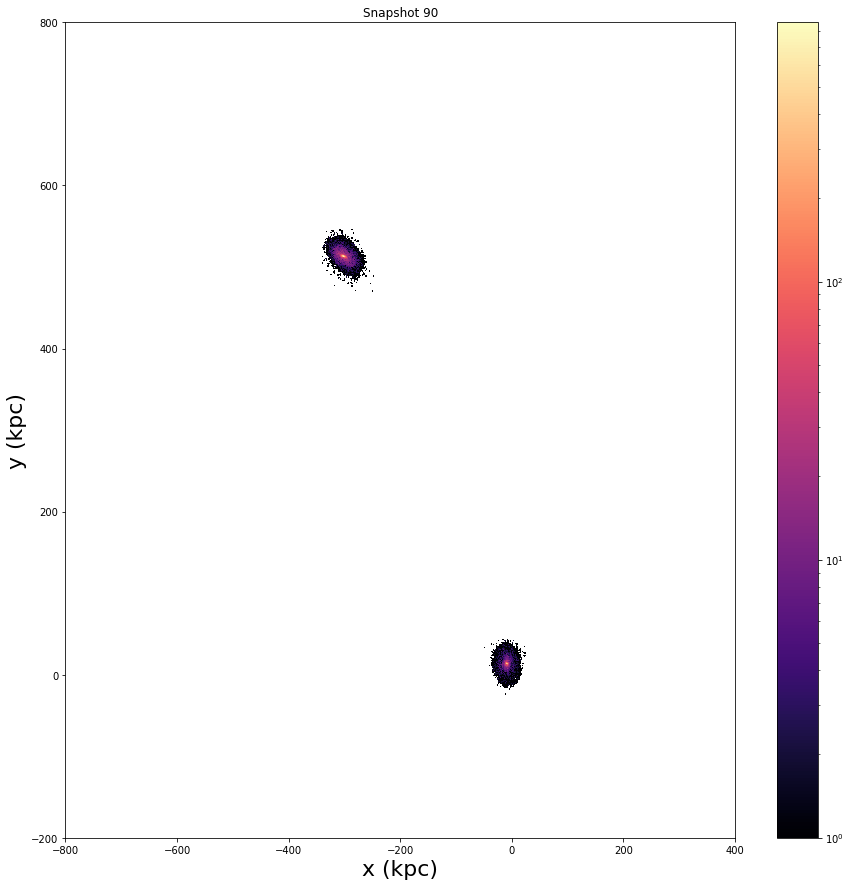

00095


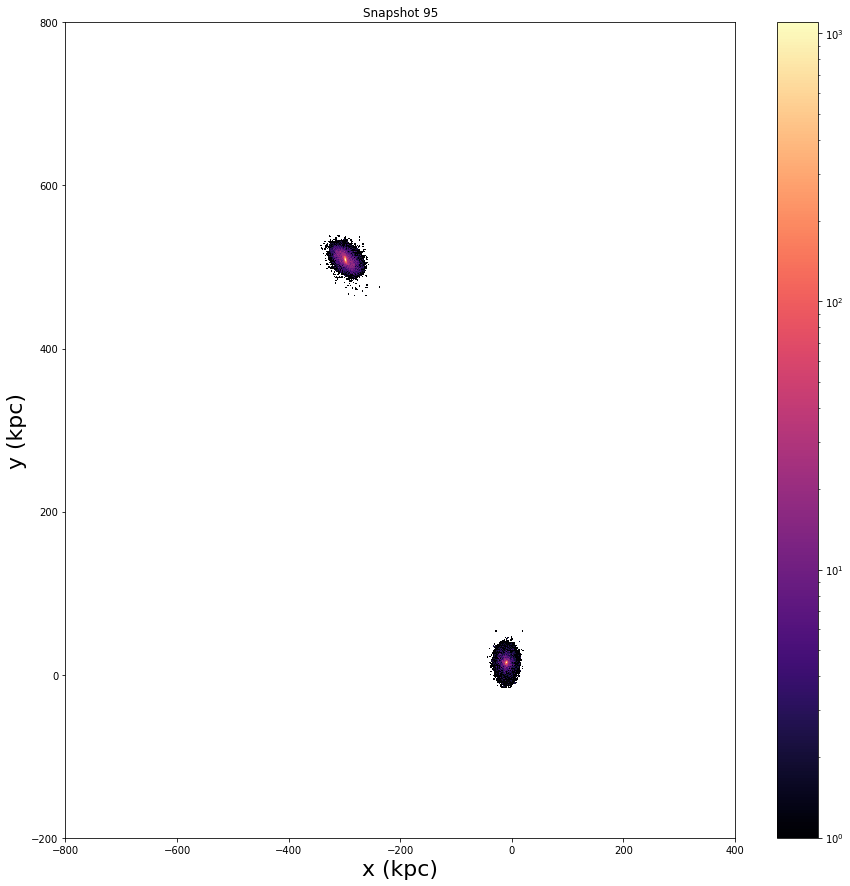

000100


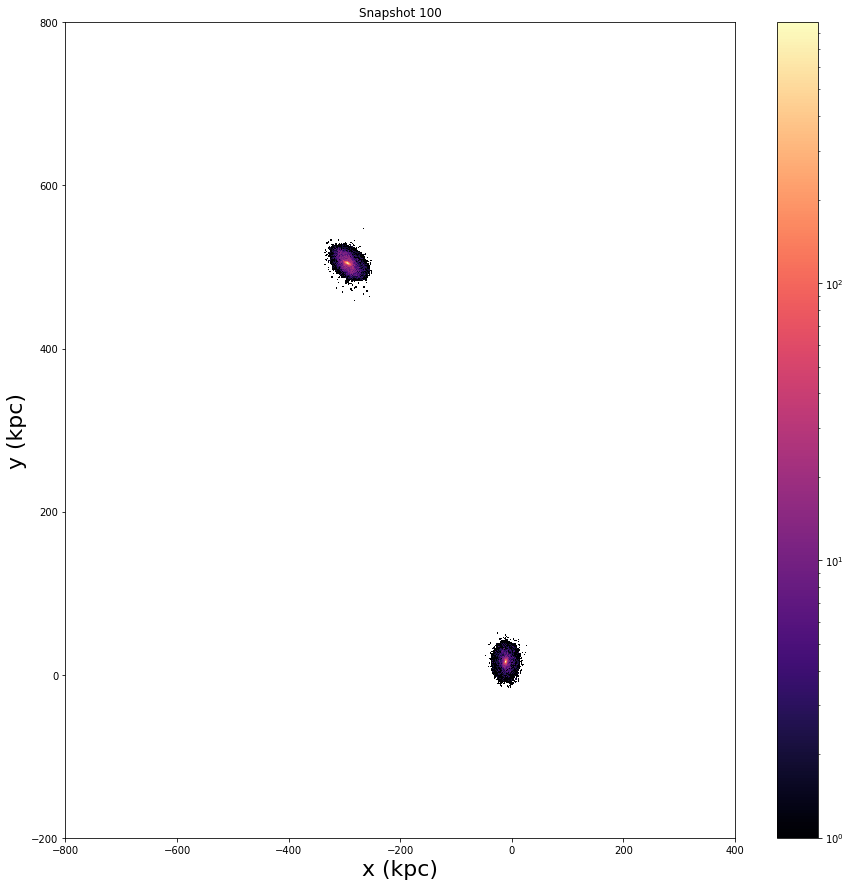

000105


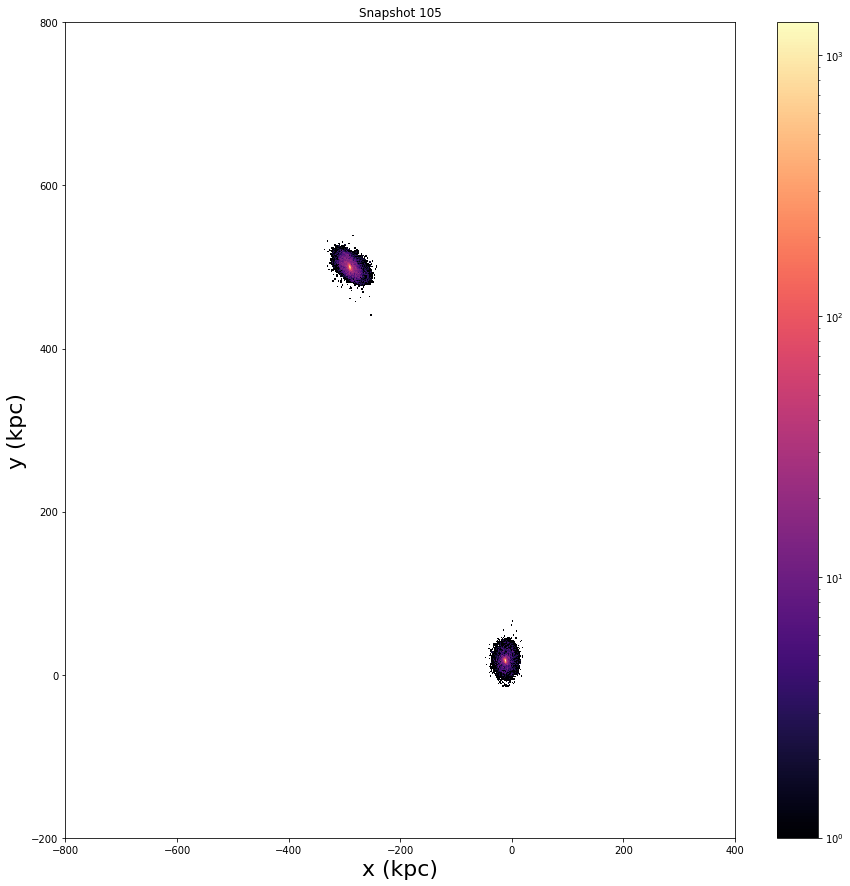

000110


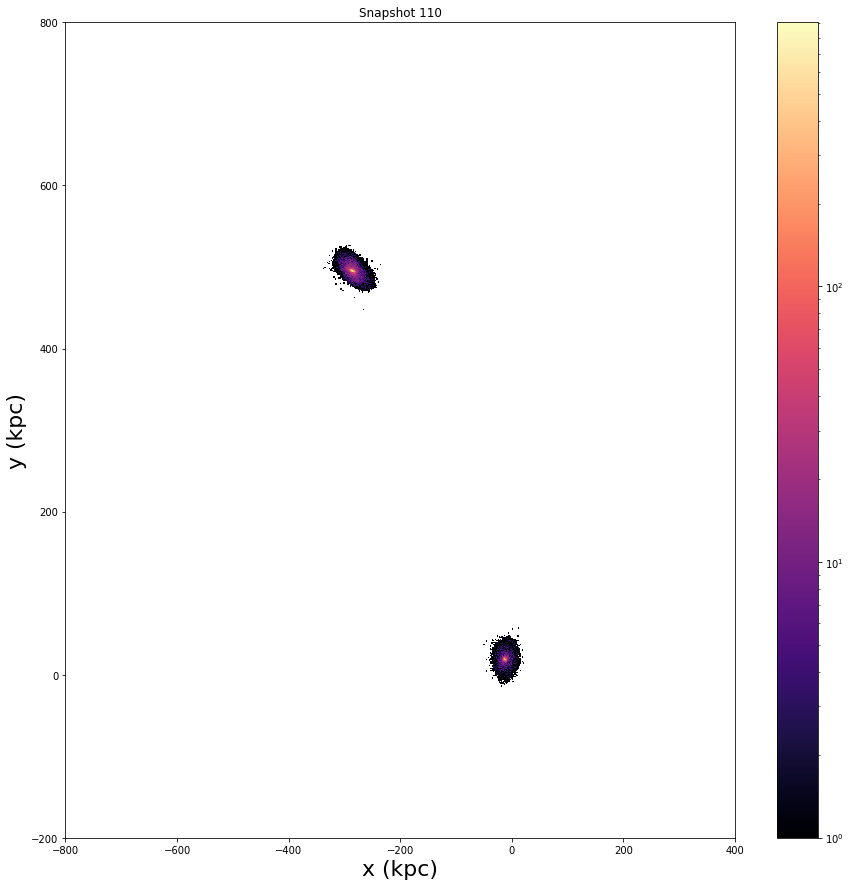

000115


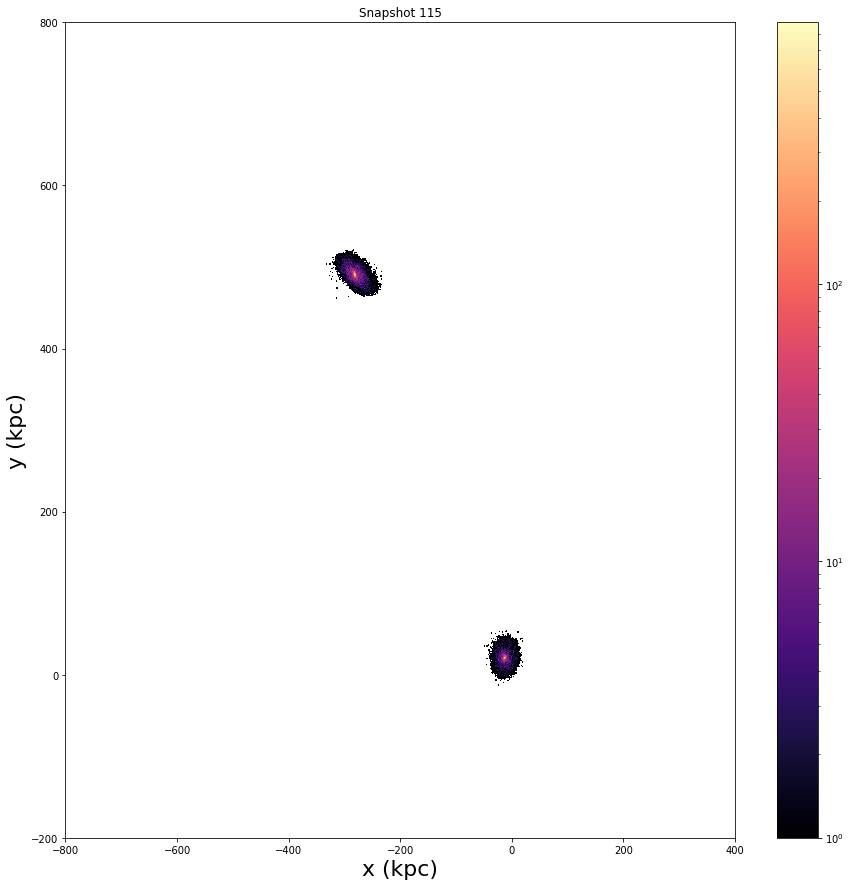

000120


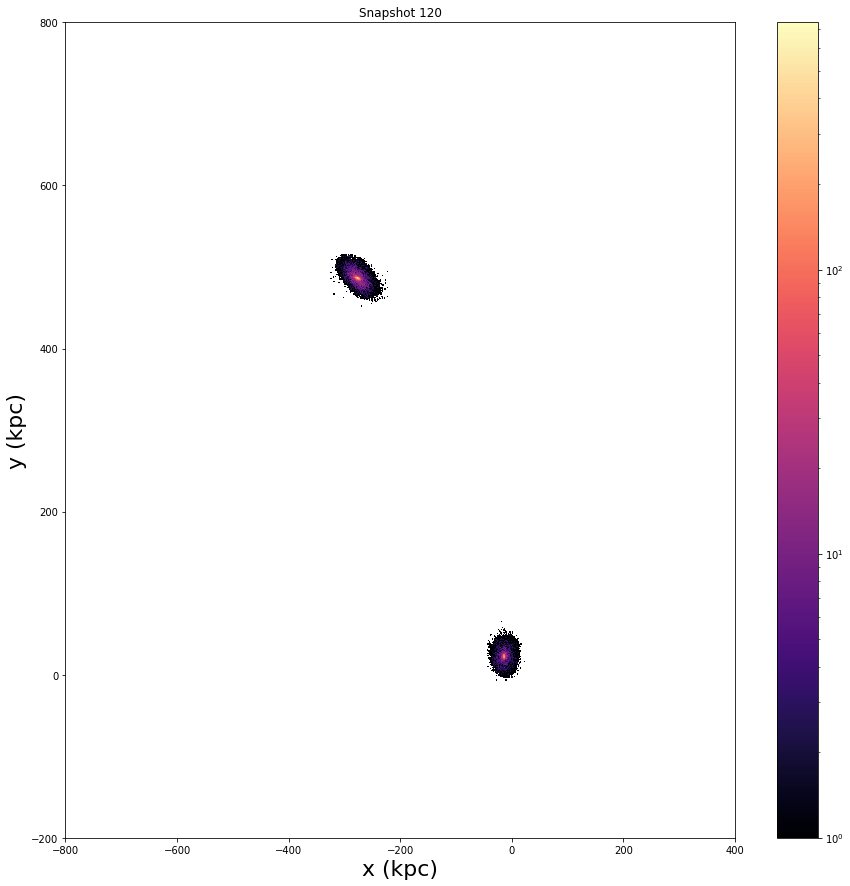

000125


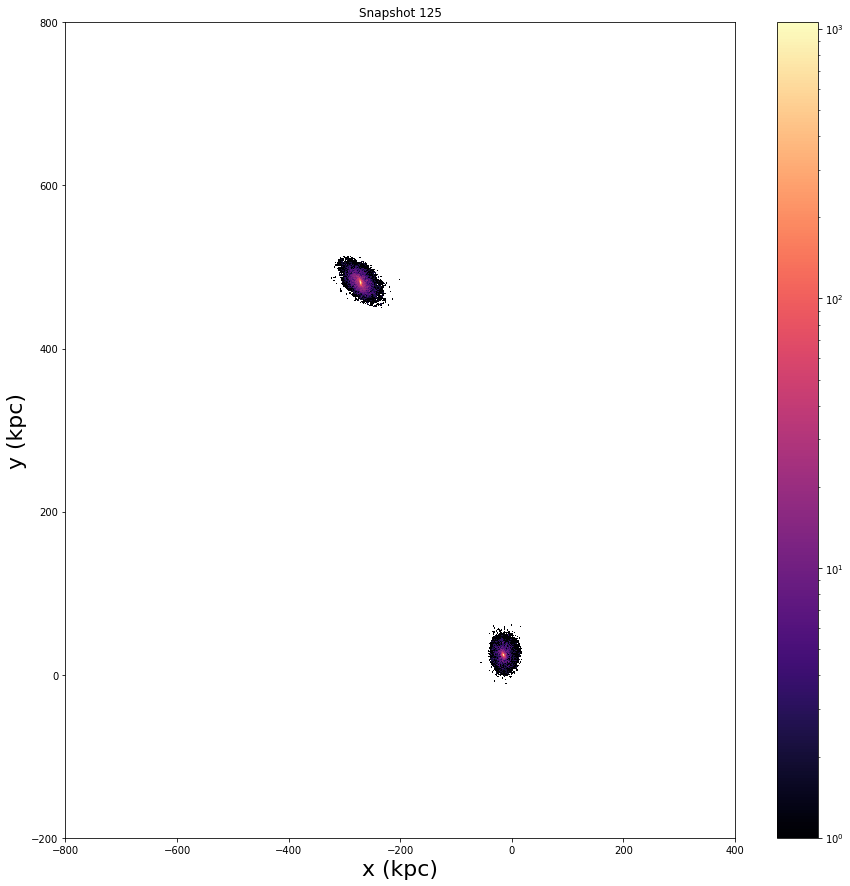

000130


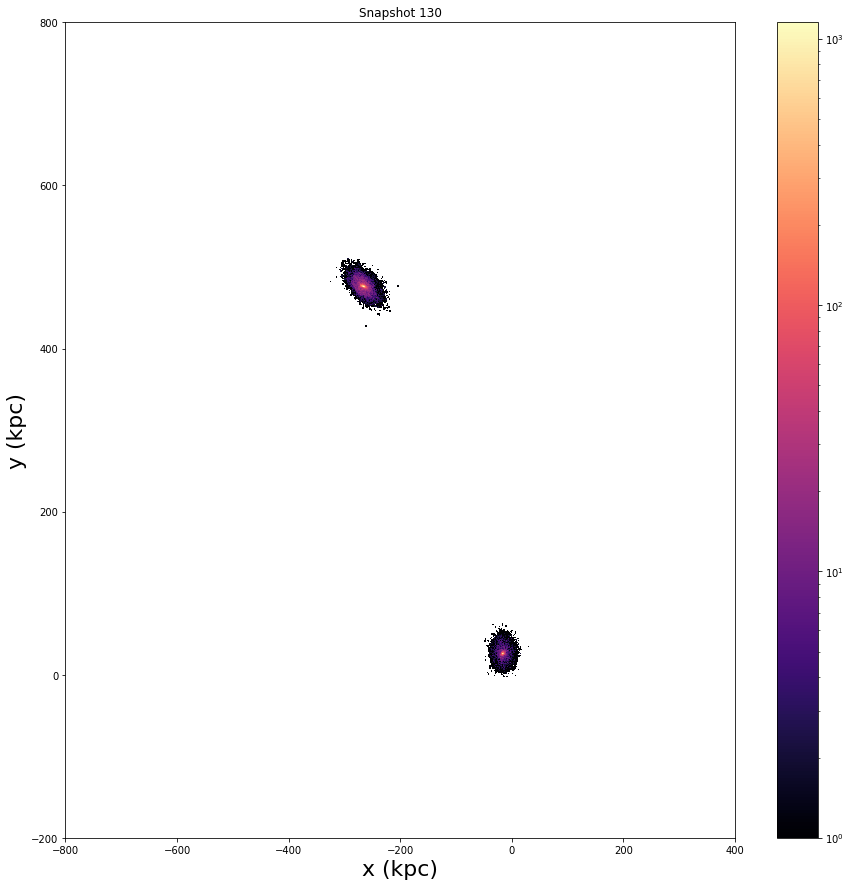

000135


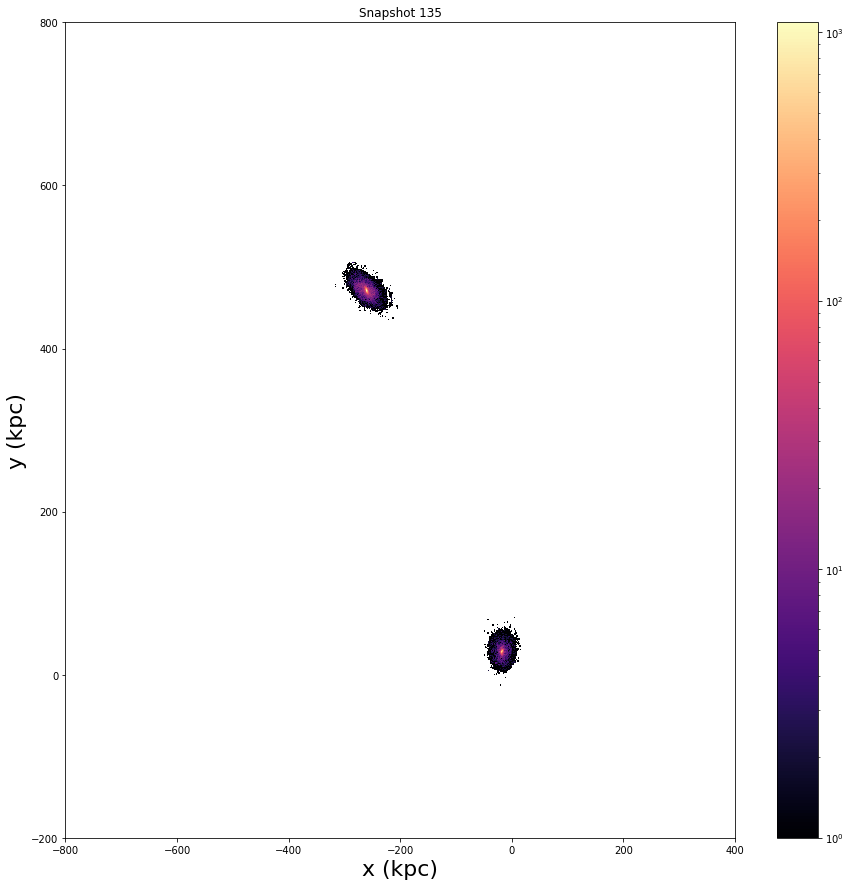

000140


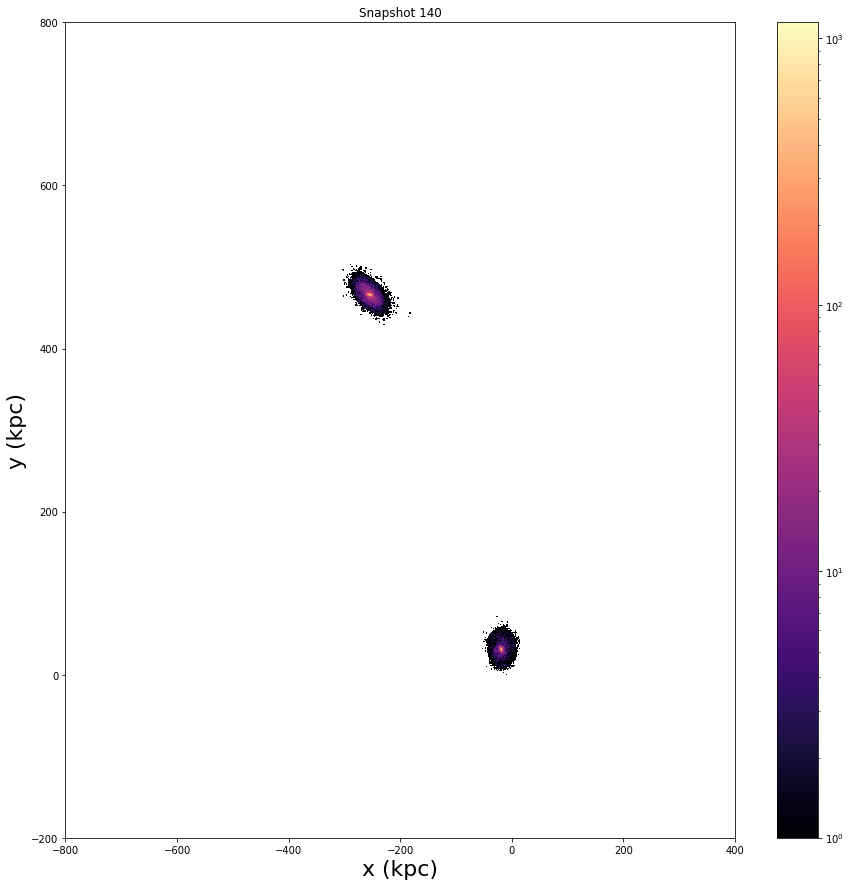

000145


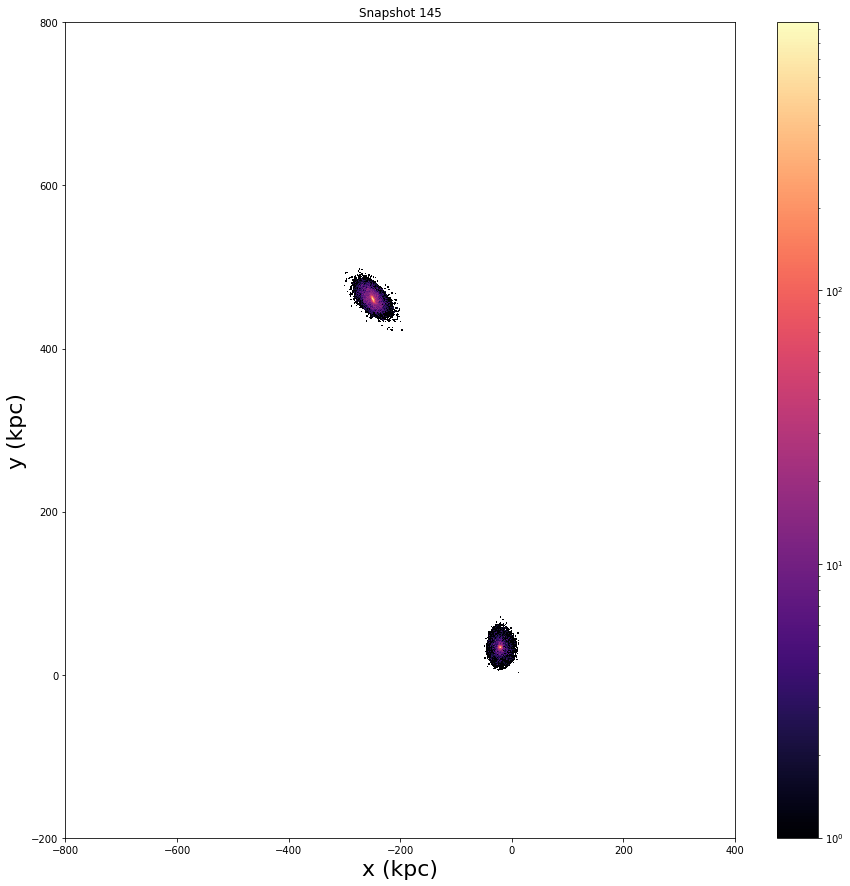

000150


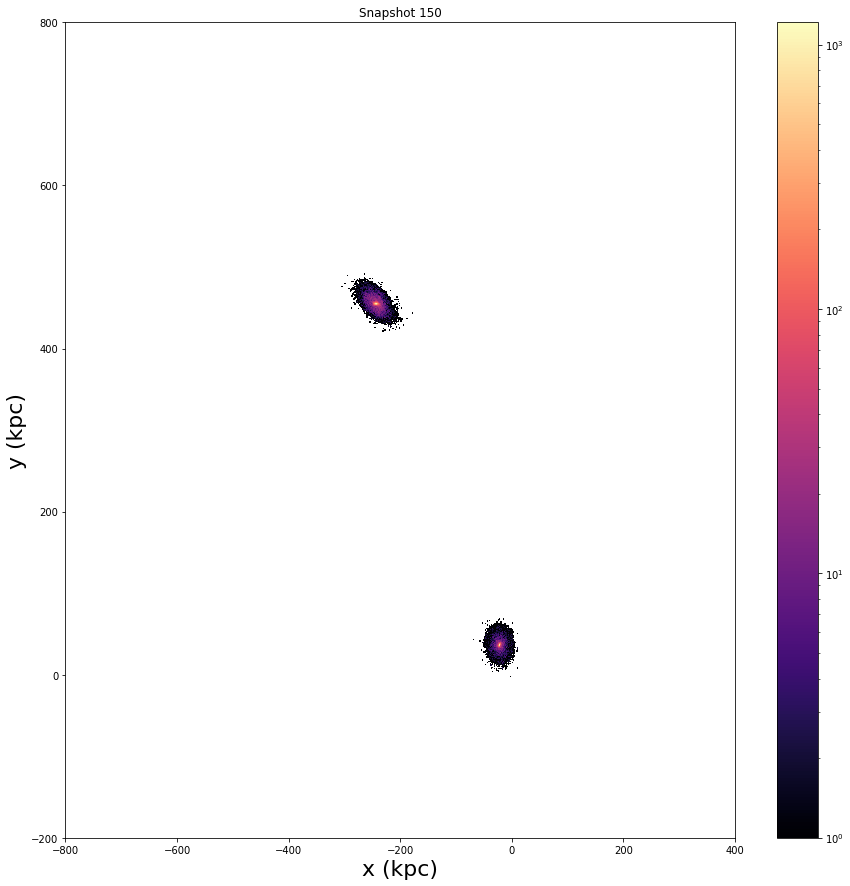

000155


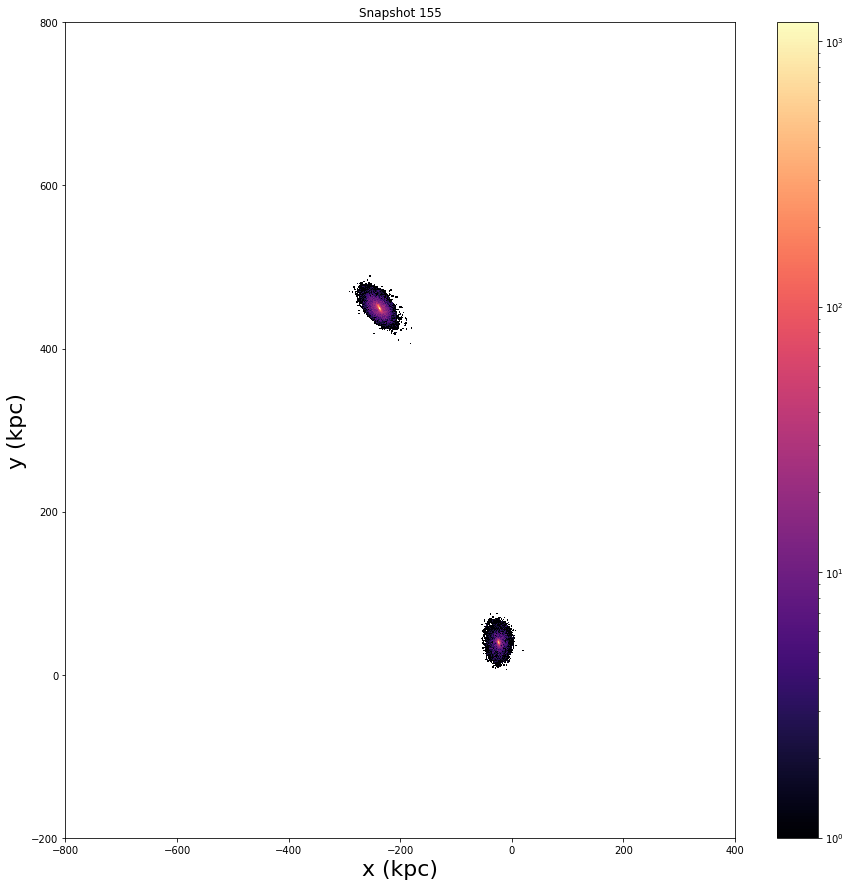

000160


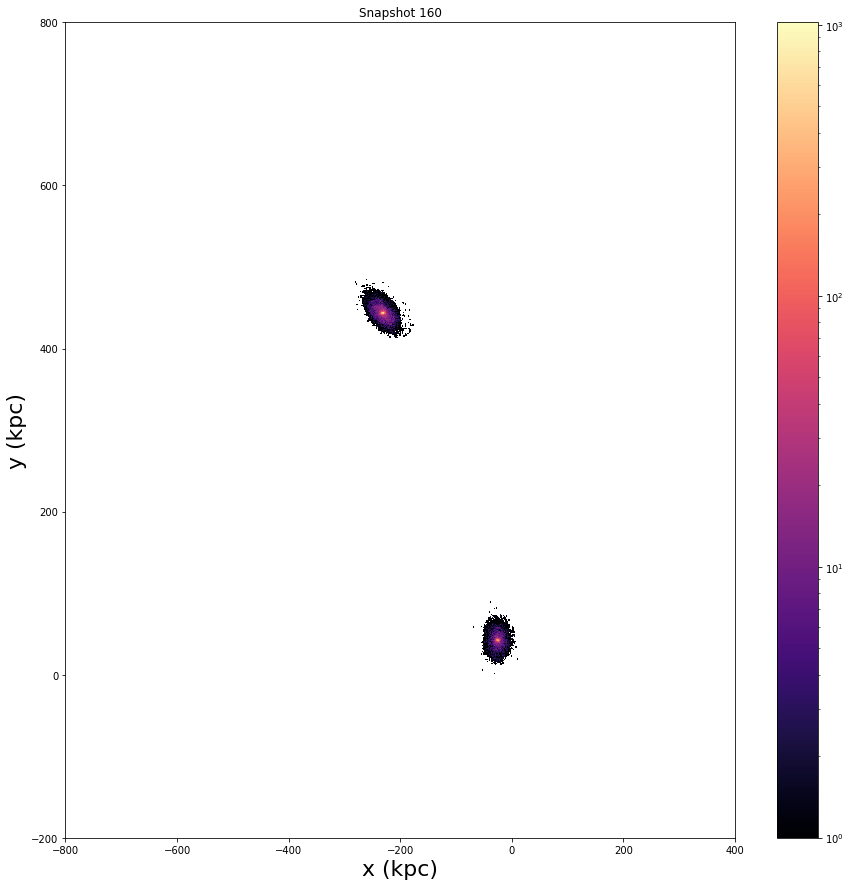

000165


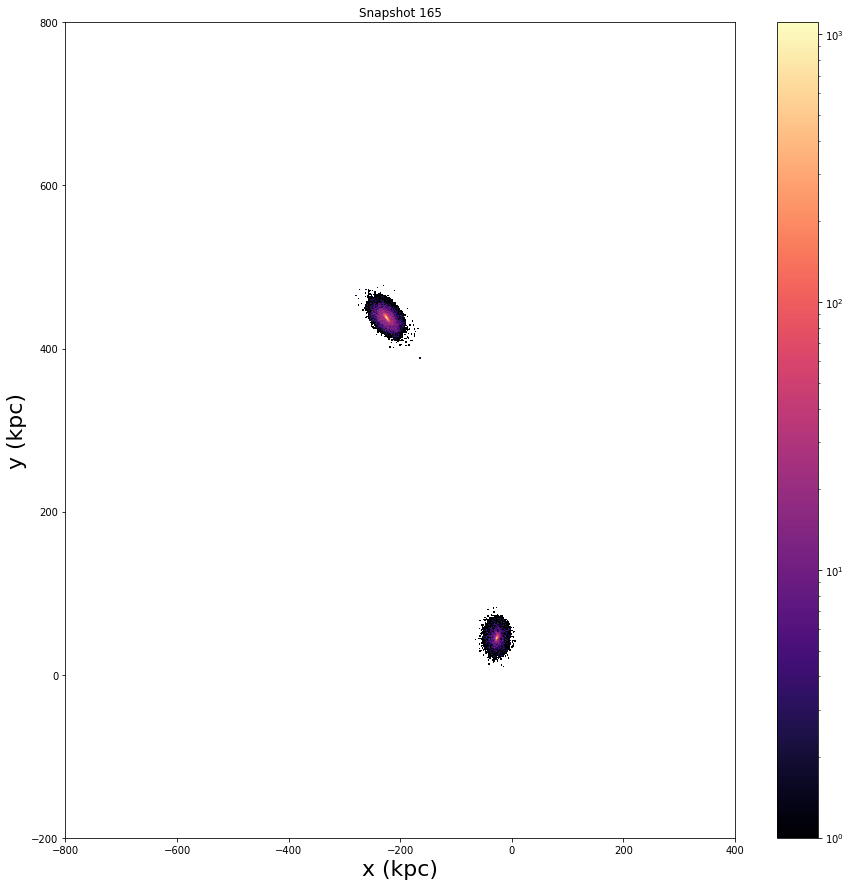

000170


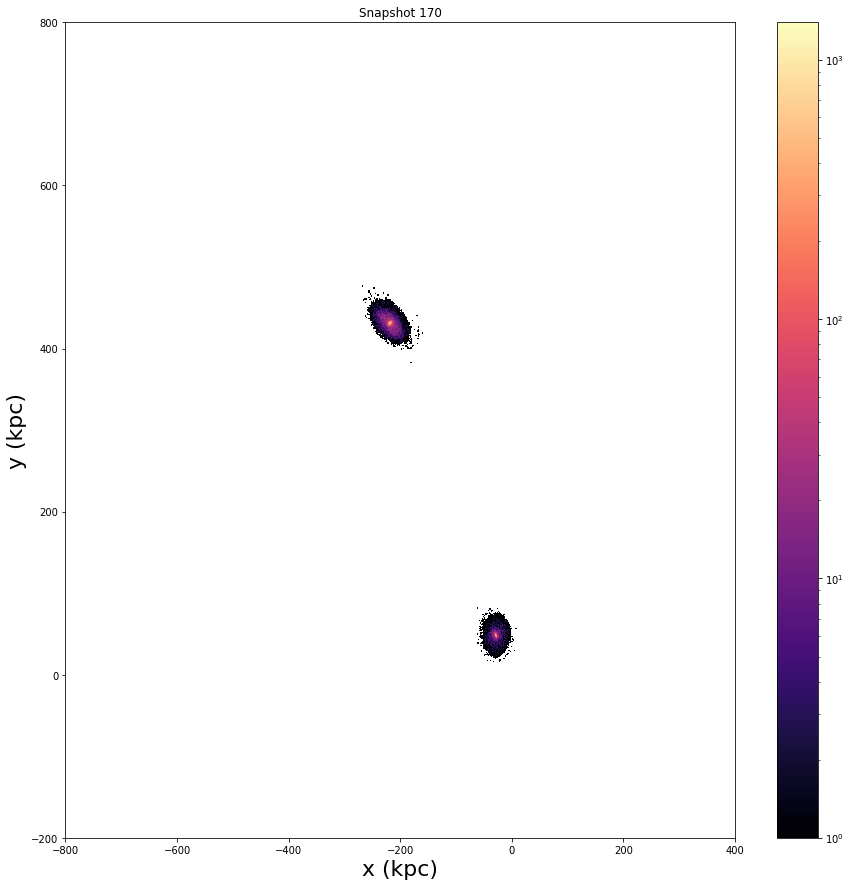

000175


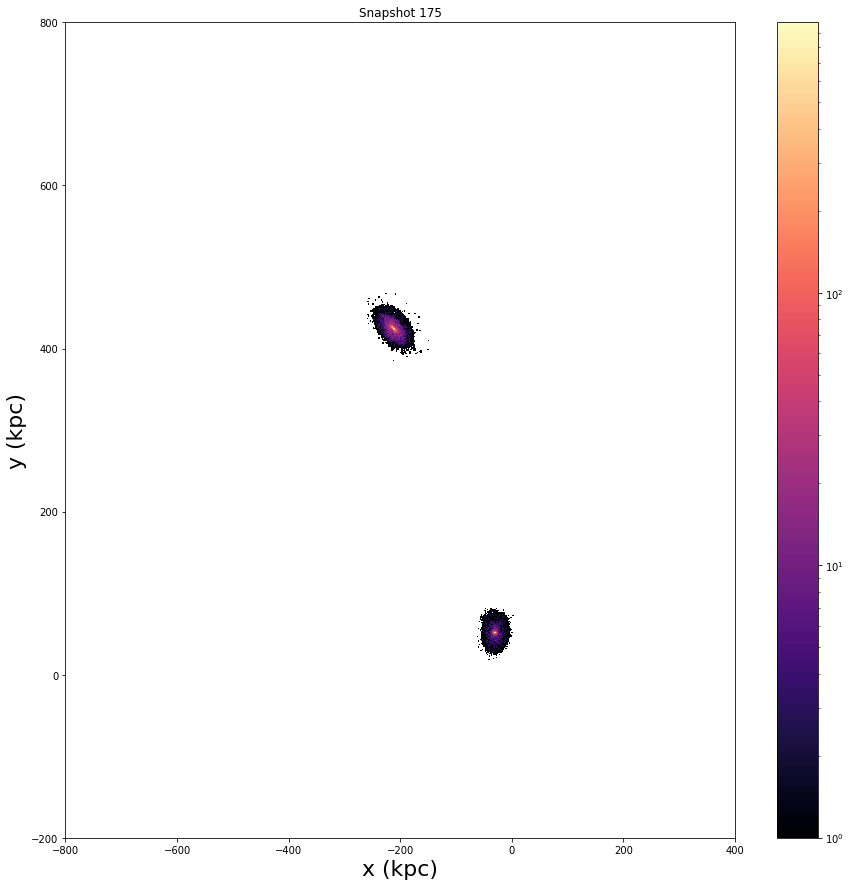

000180


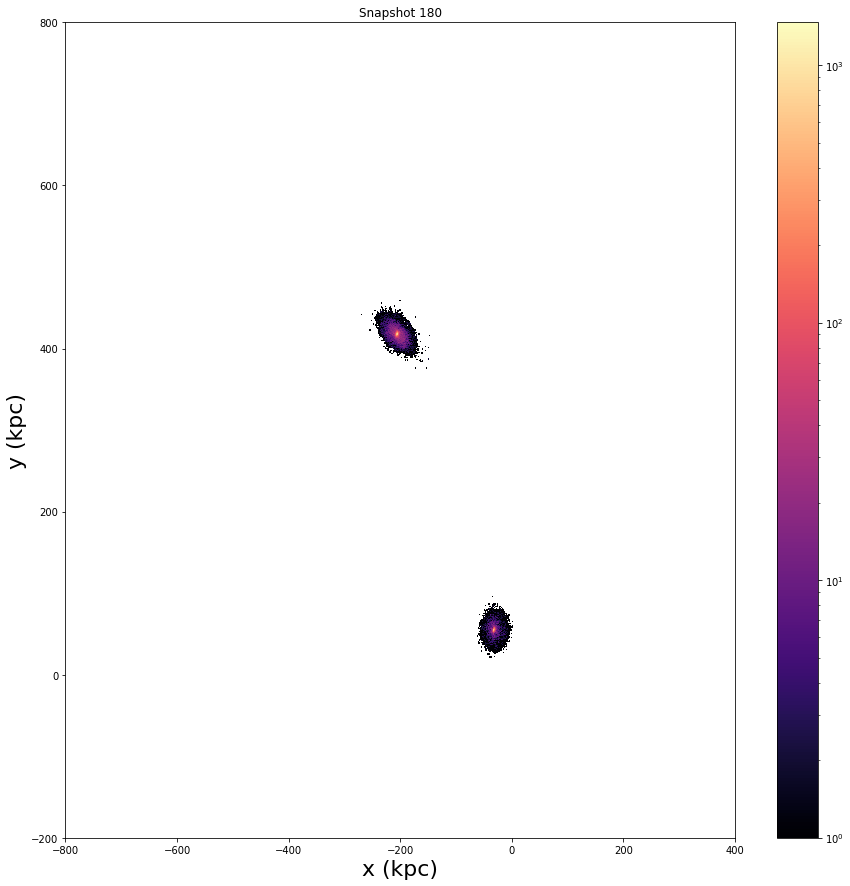

000185


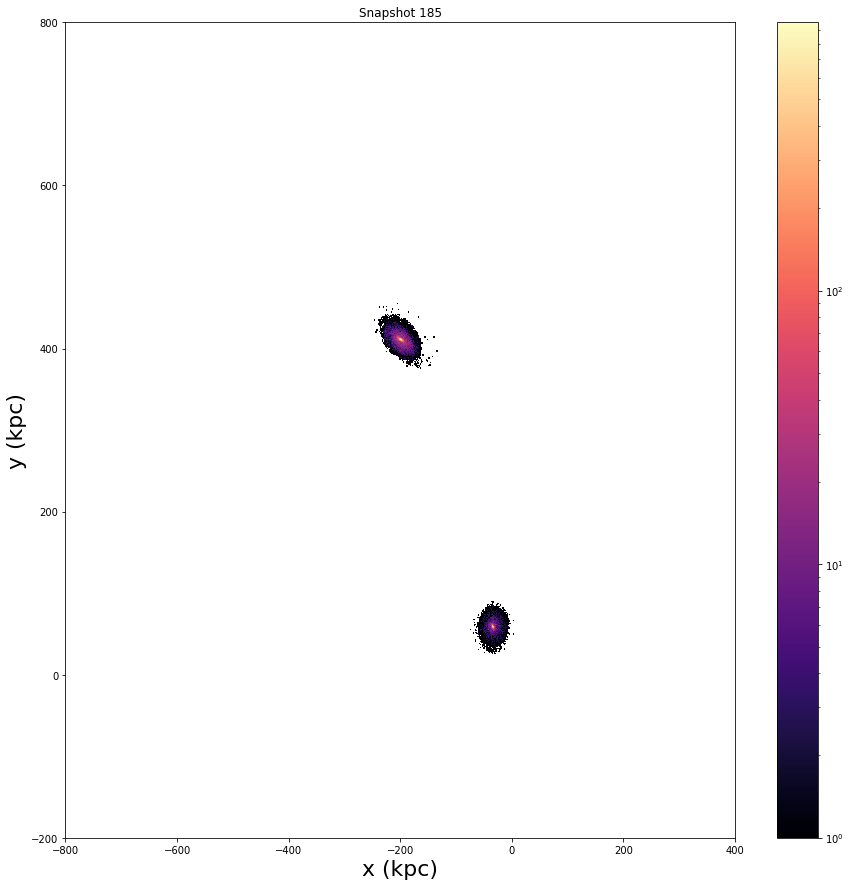

000190


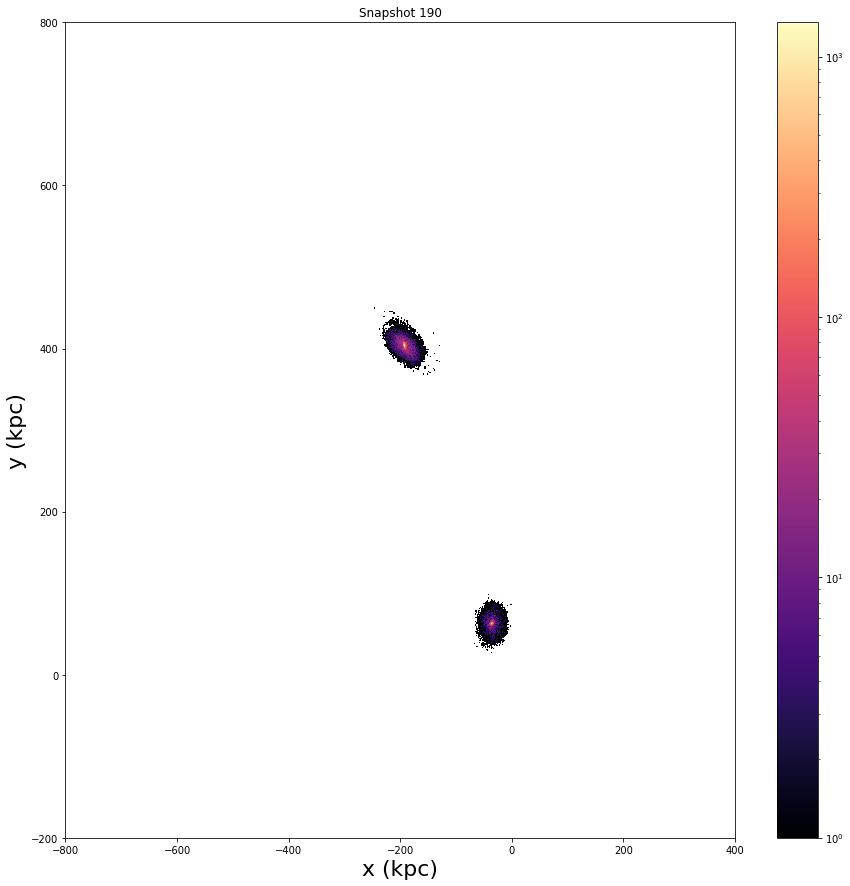

000195


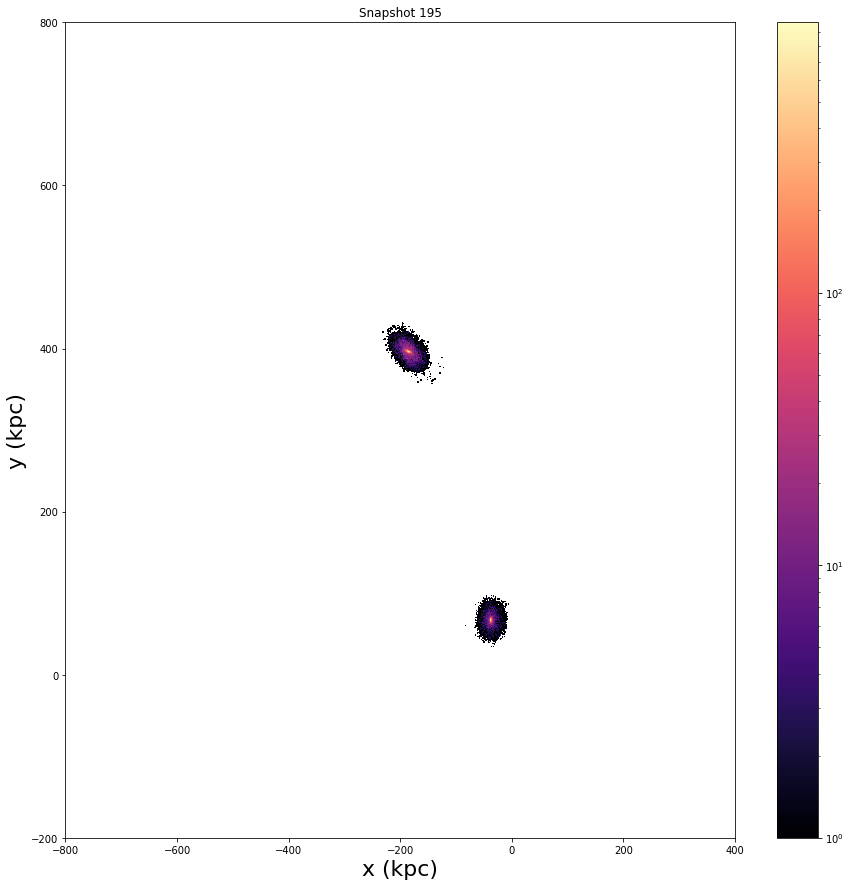

000200


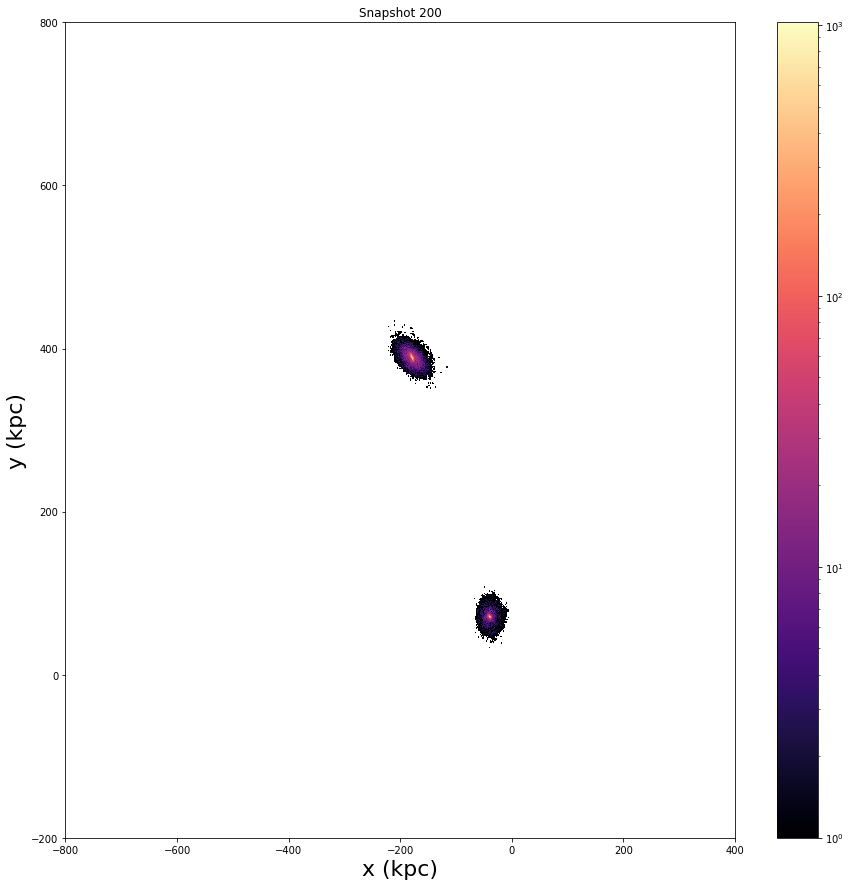

000205


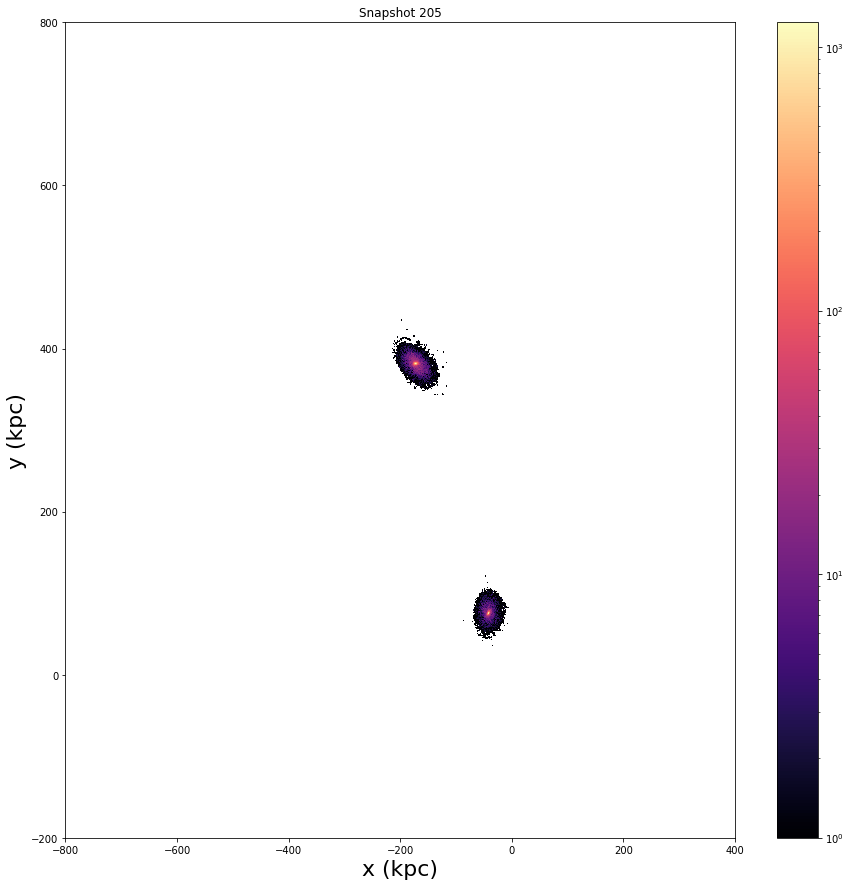

000210


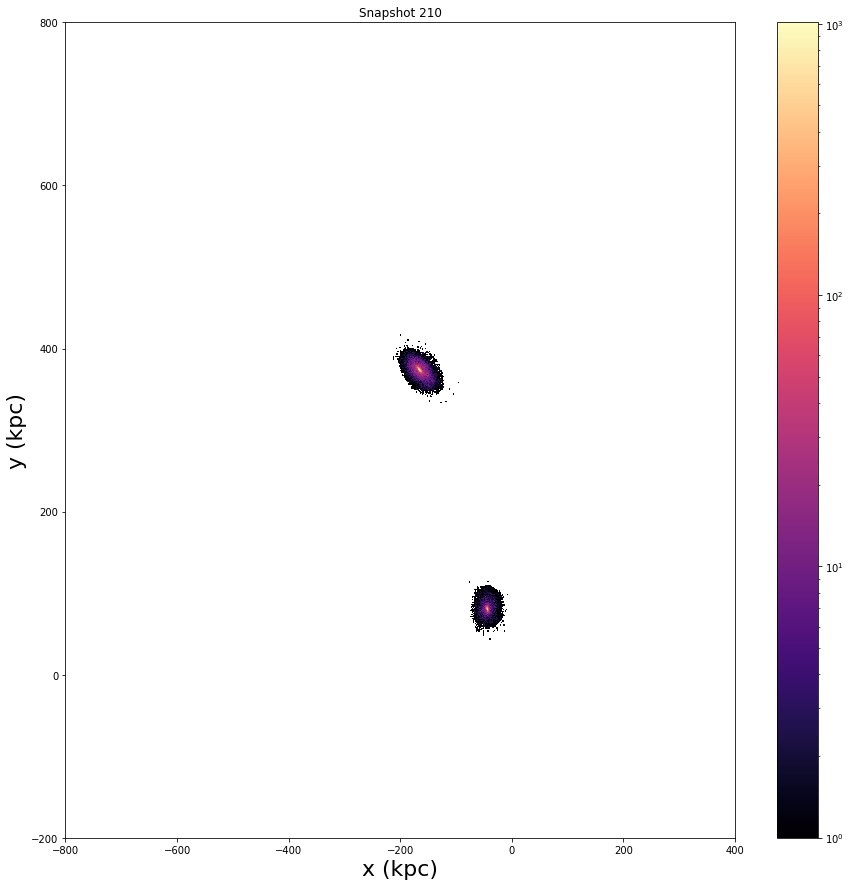

000215


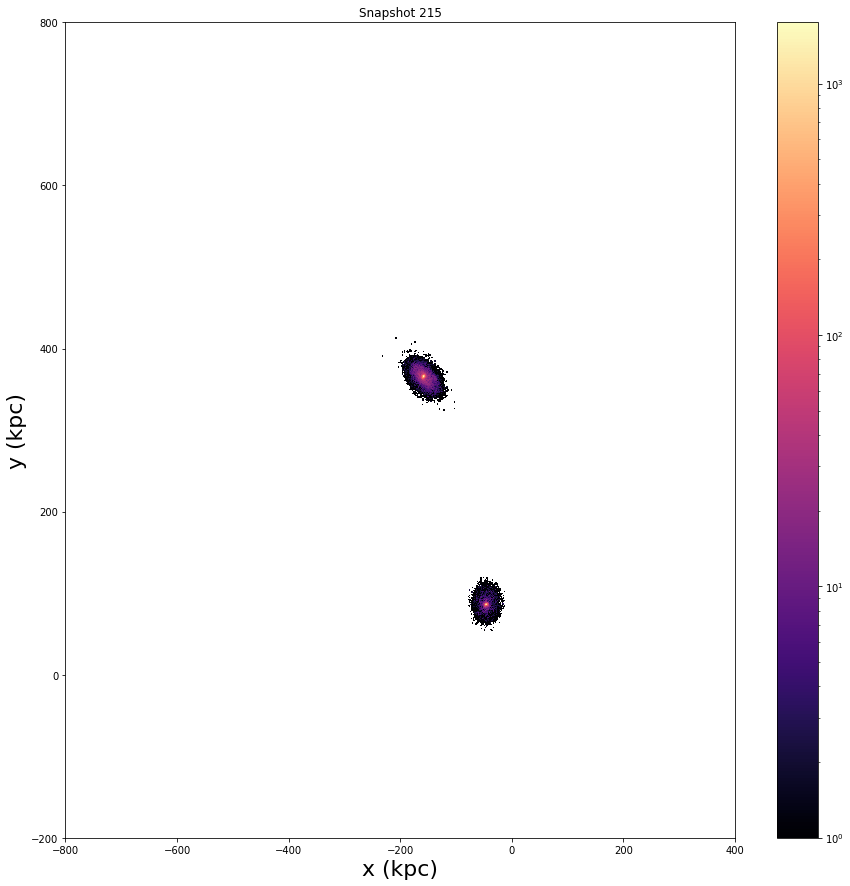

000220


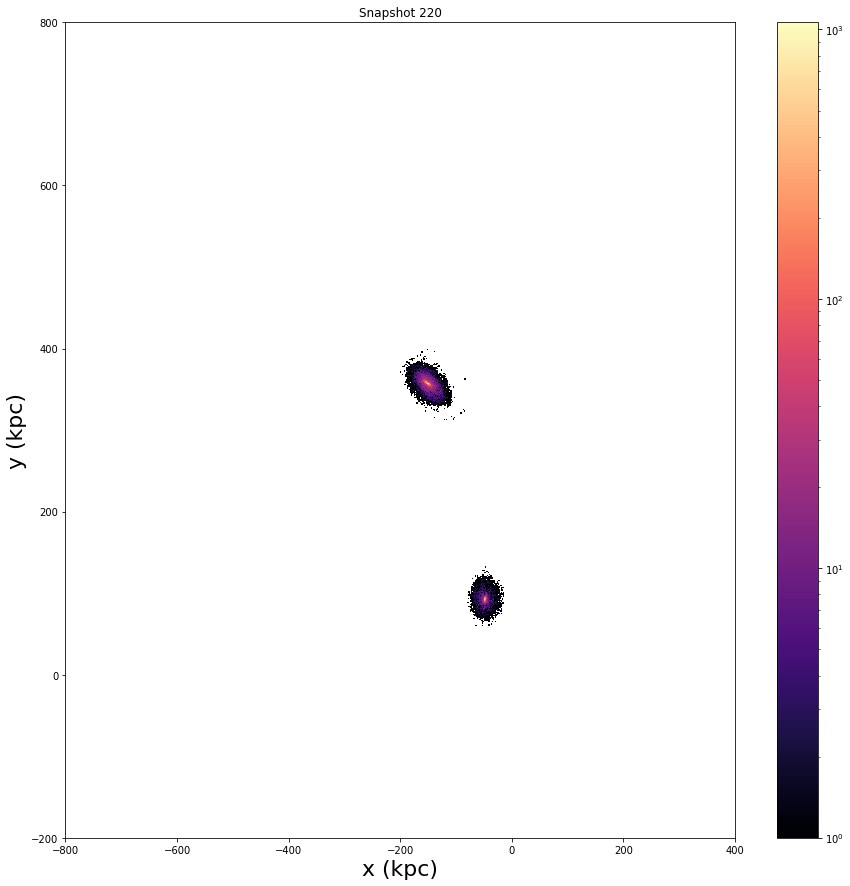

000225


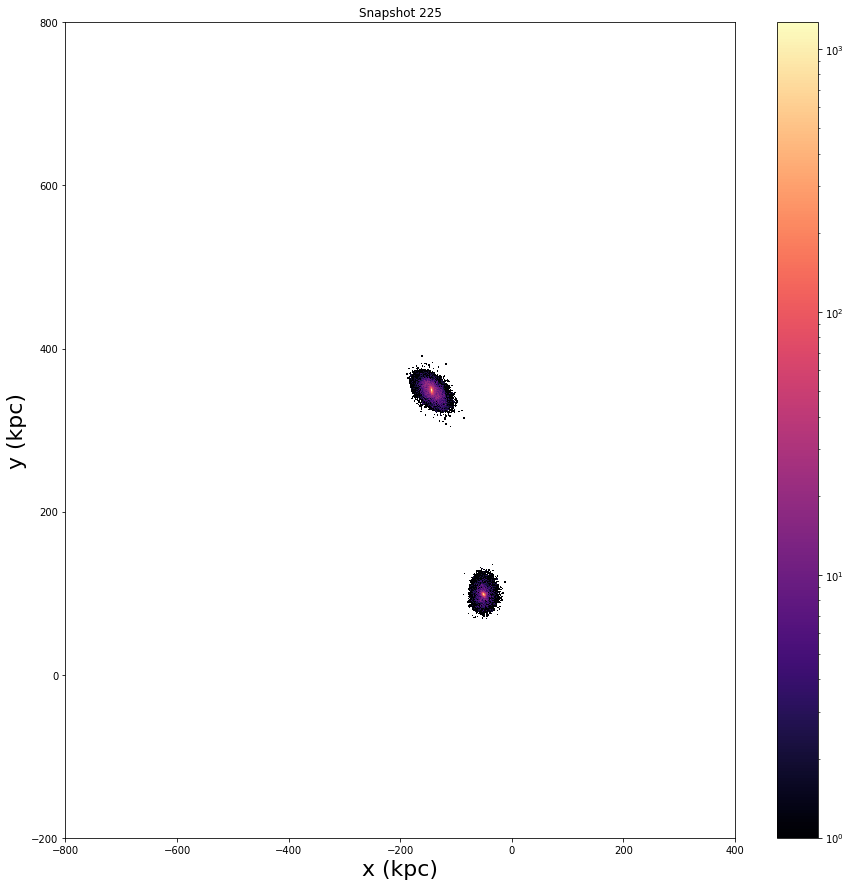

000230


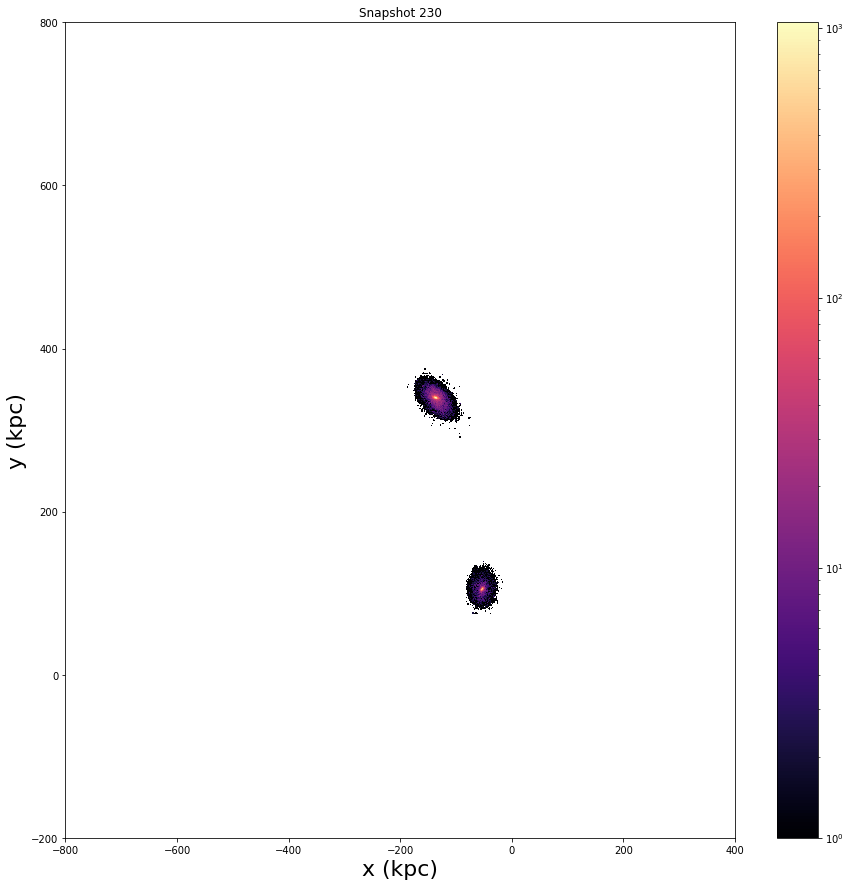

000235


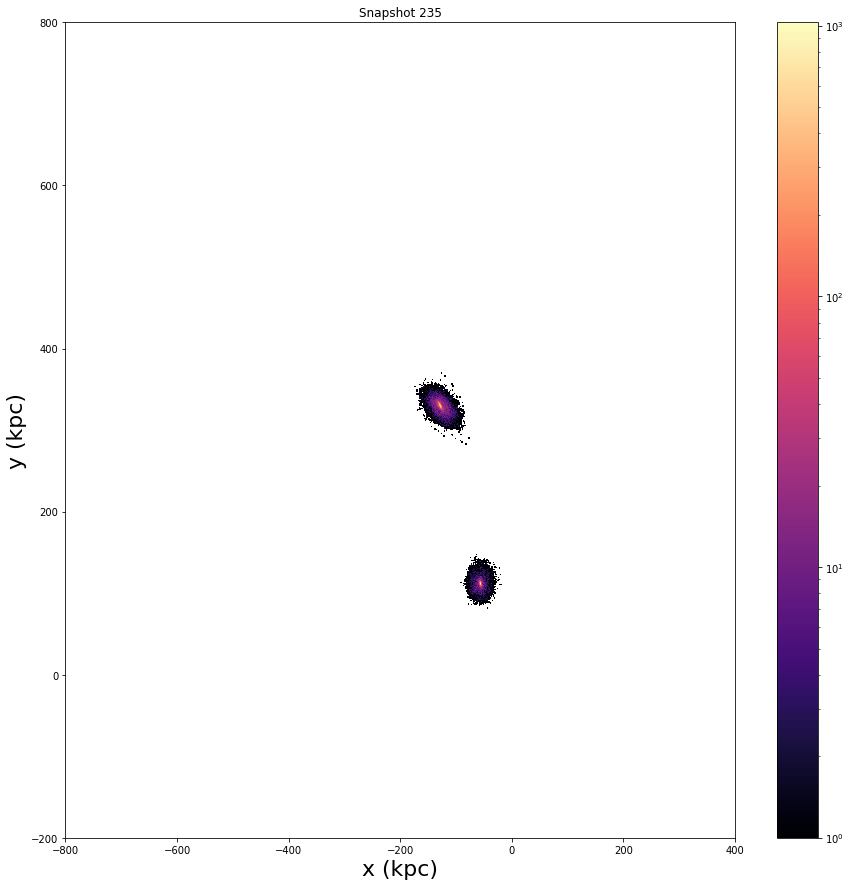

000240


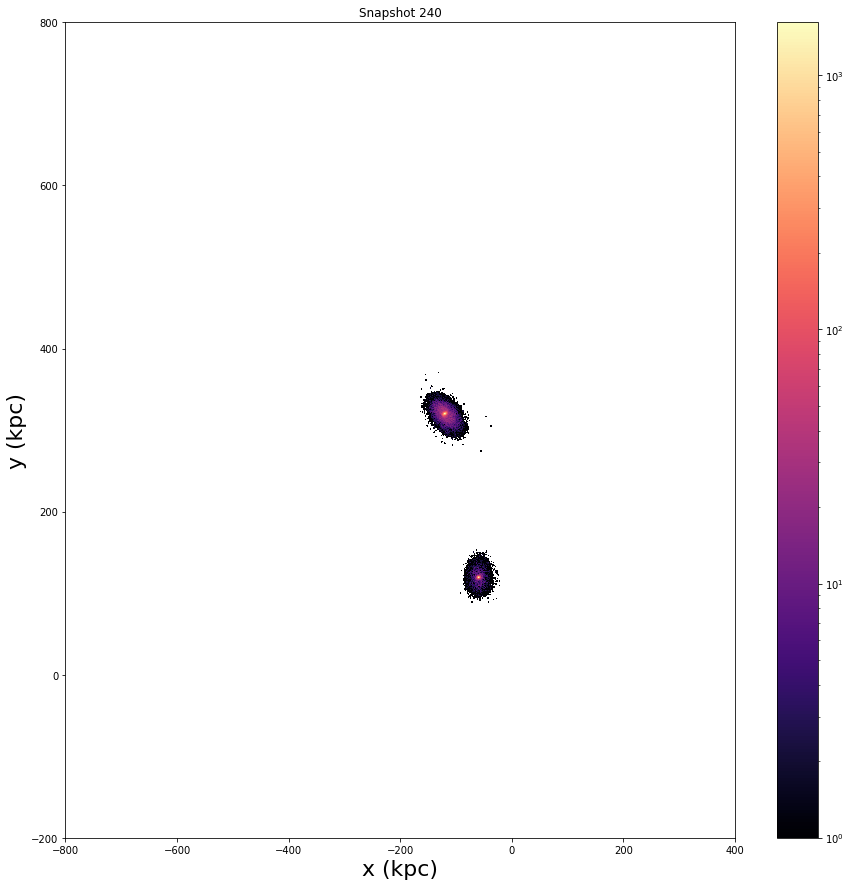

000245


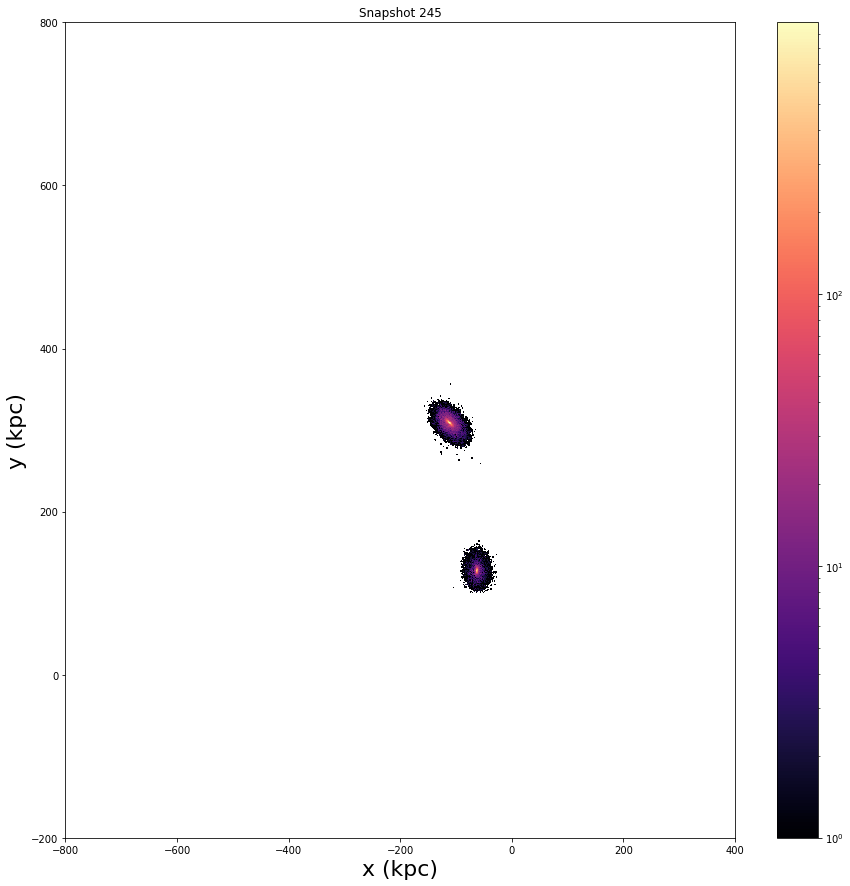

000250


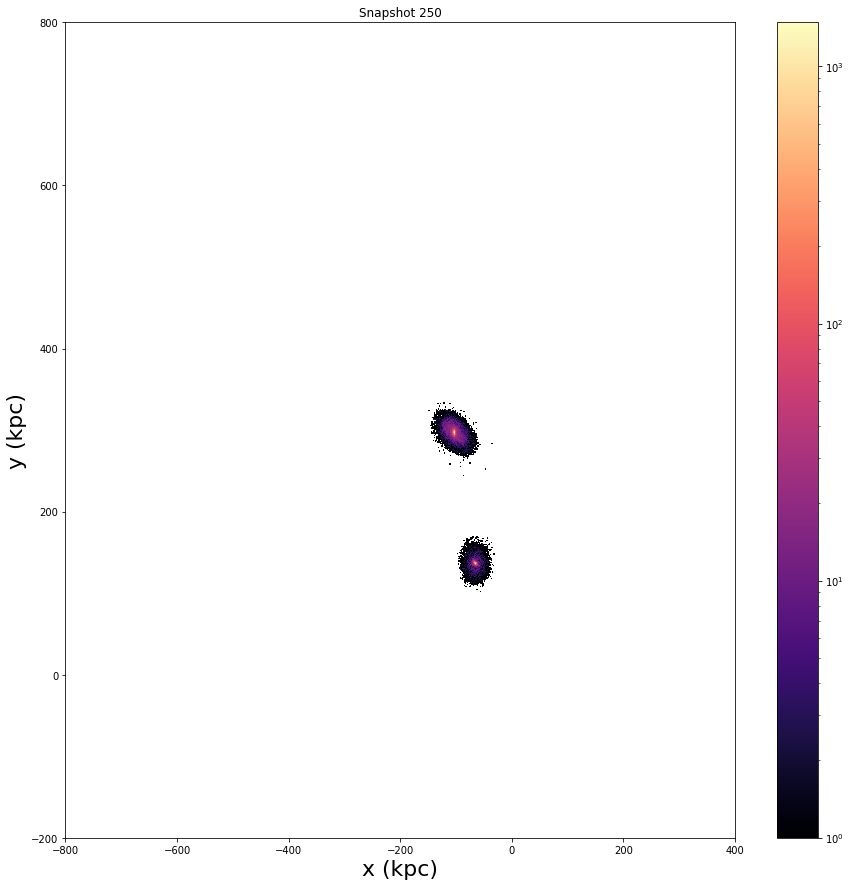

000255


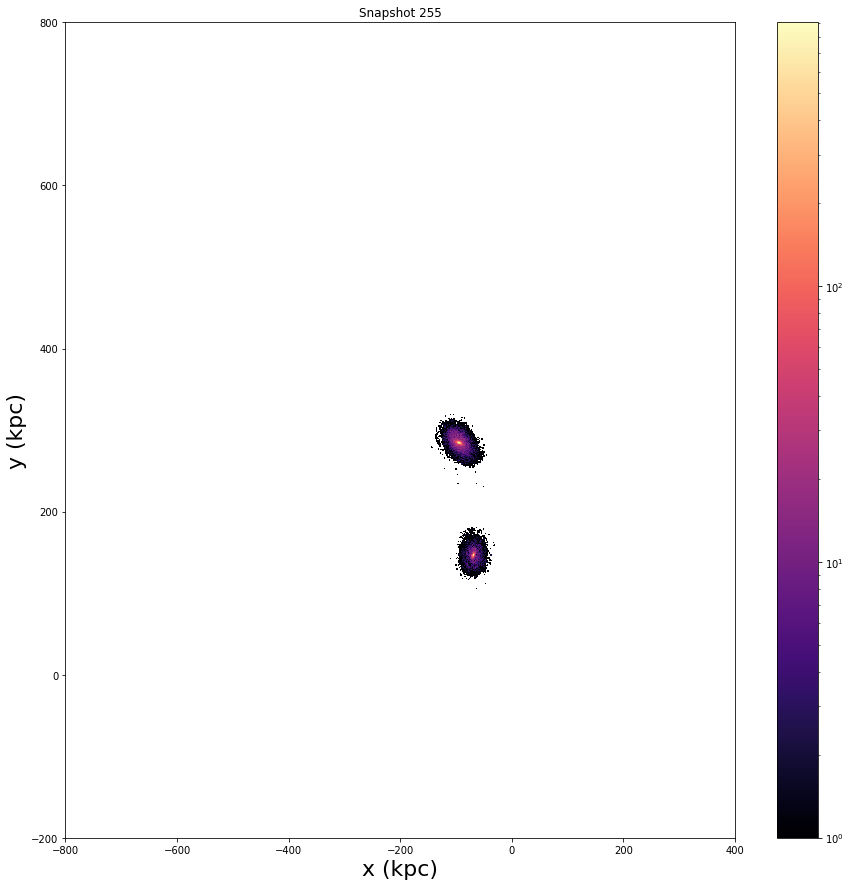

000260


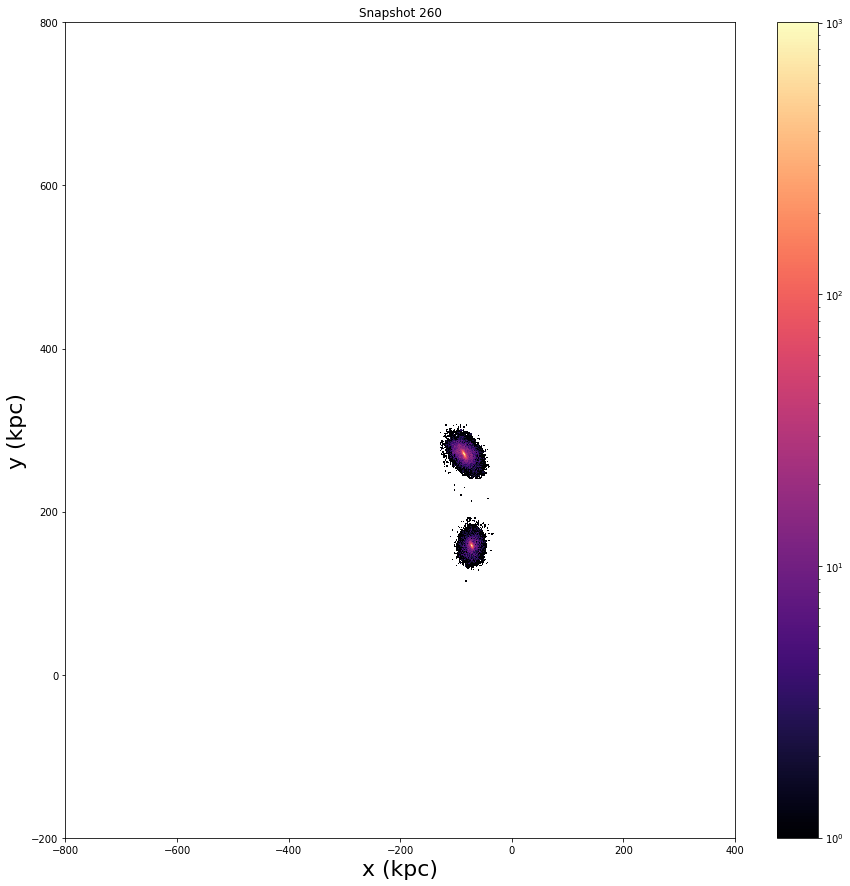

000265


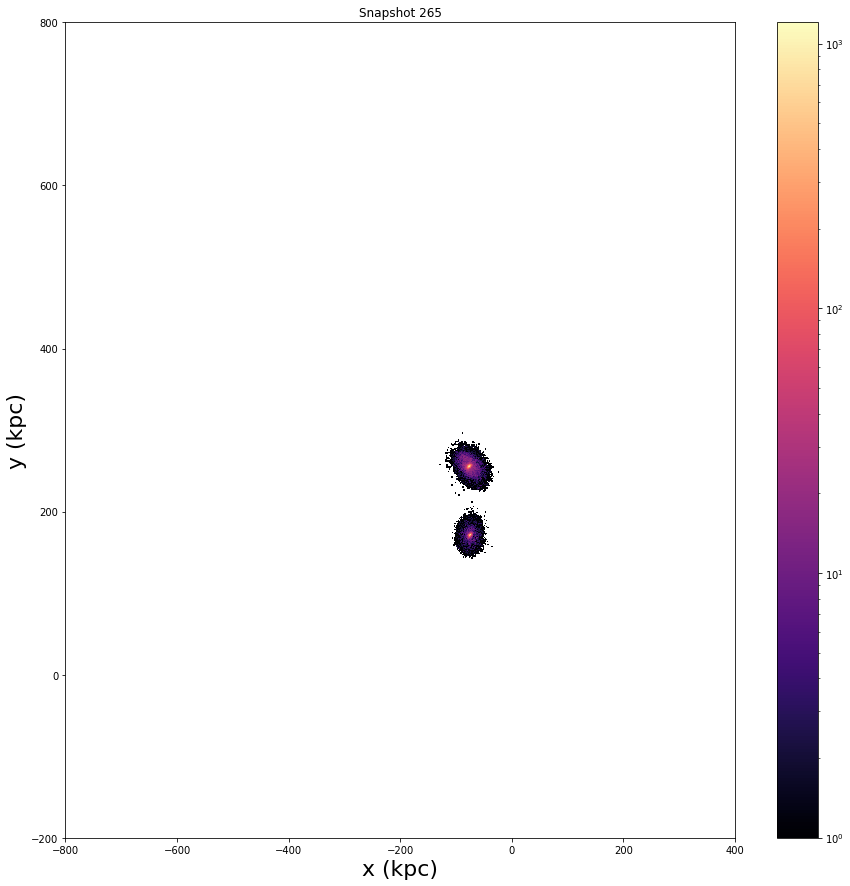

000270


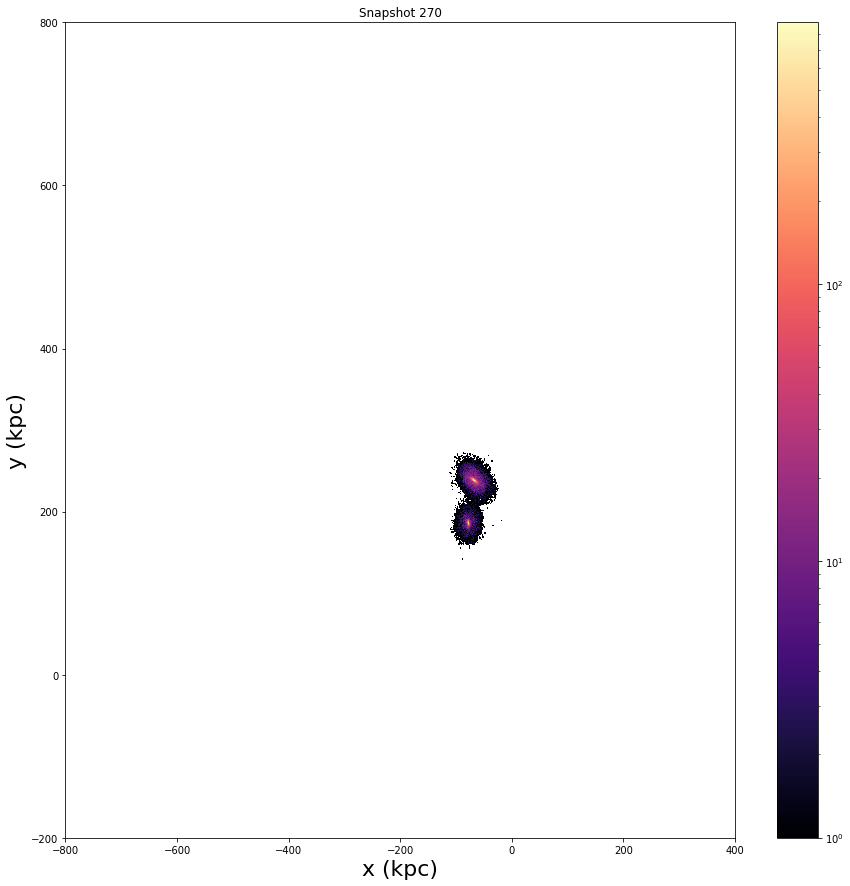

000275


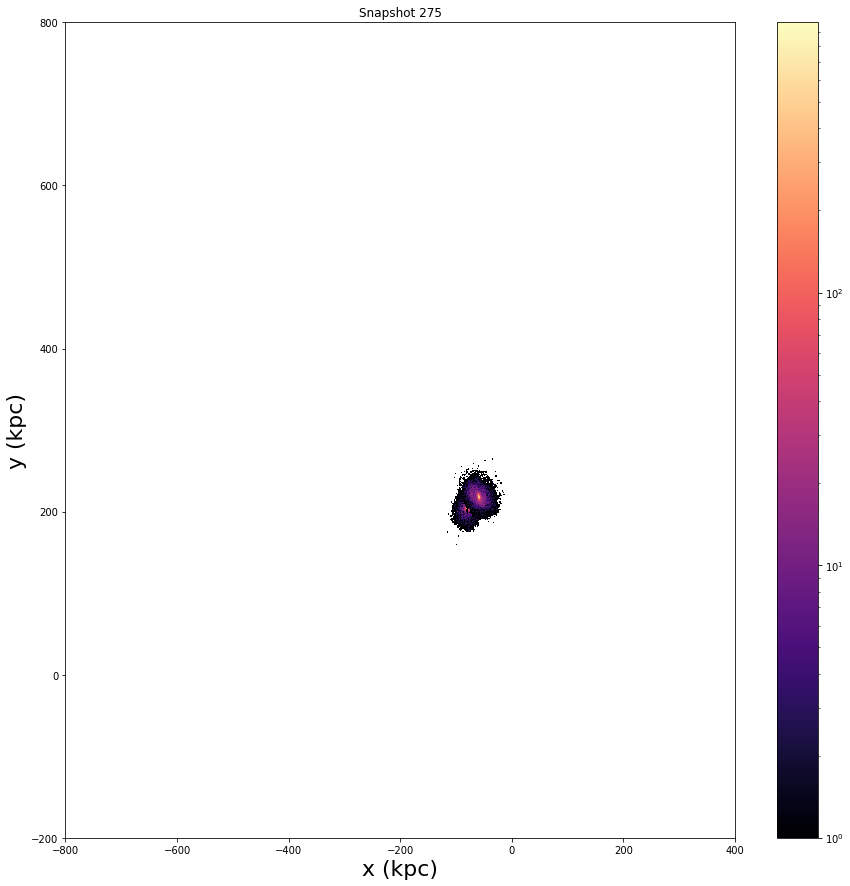

000280


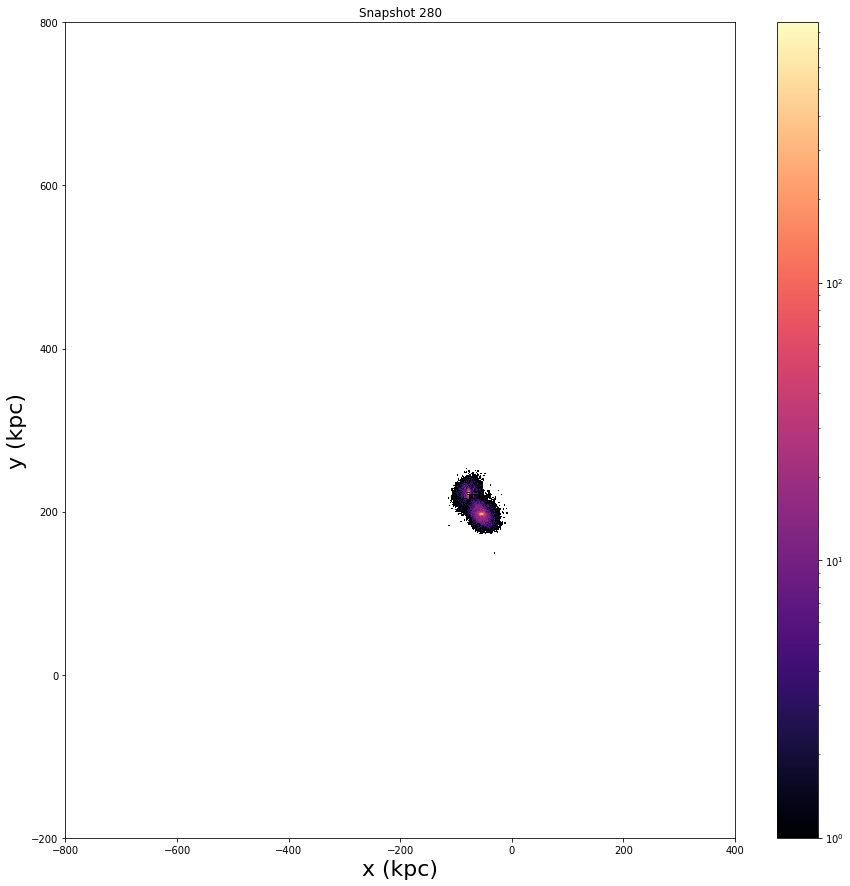

000285


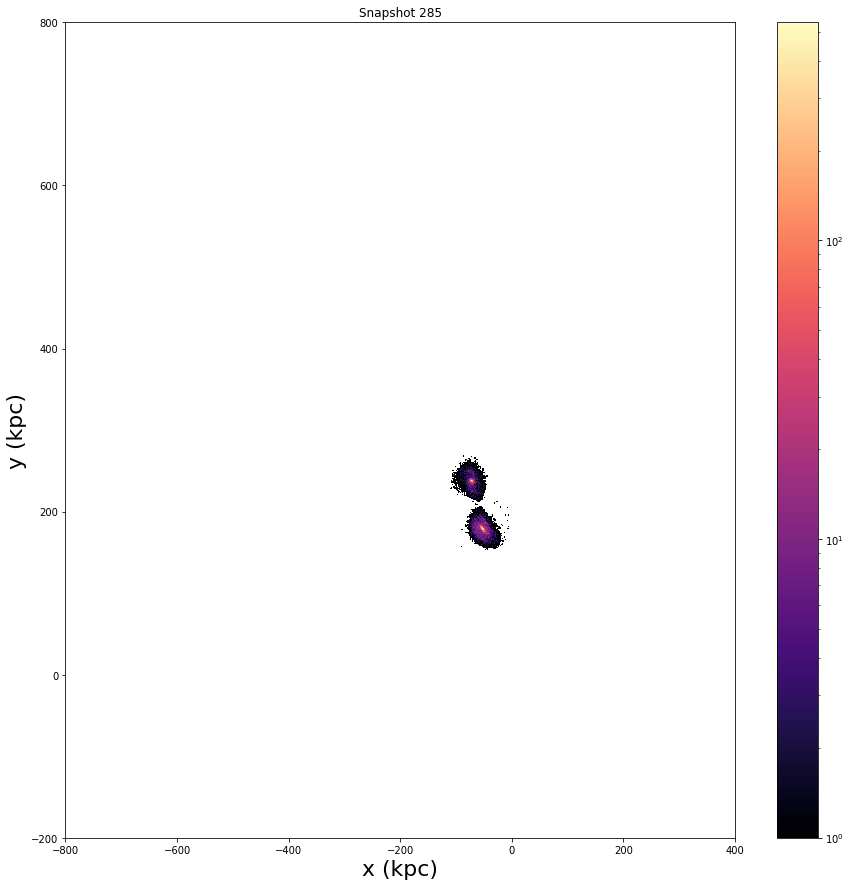

000290


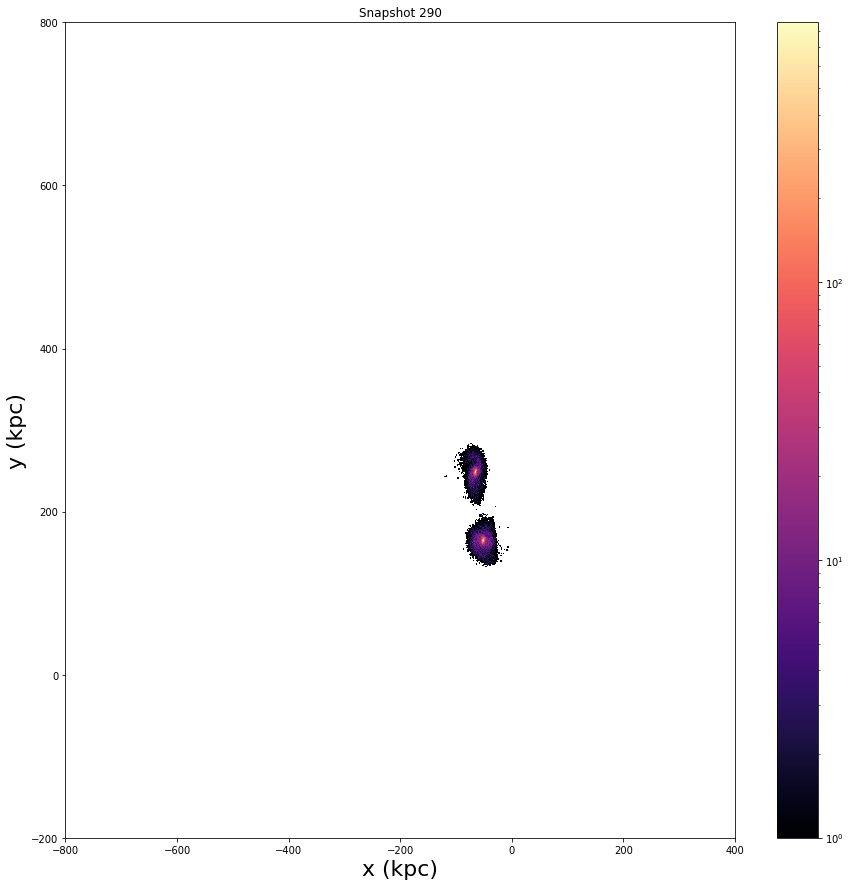

000295


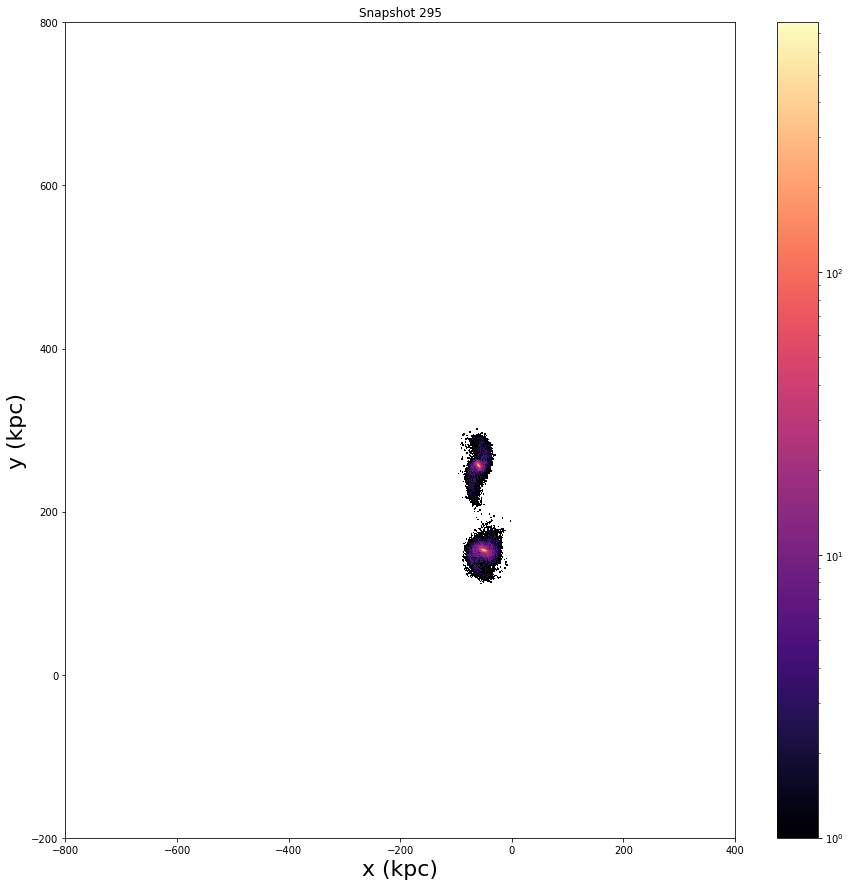

000300


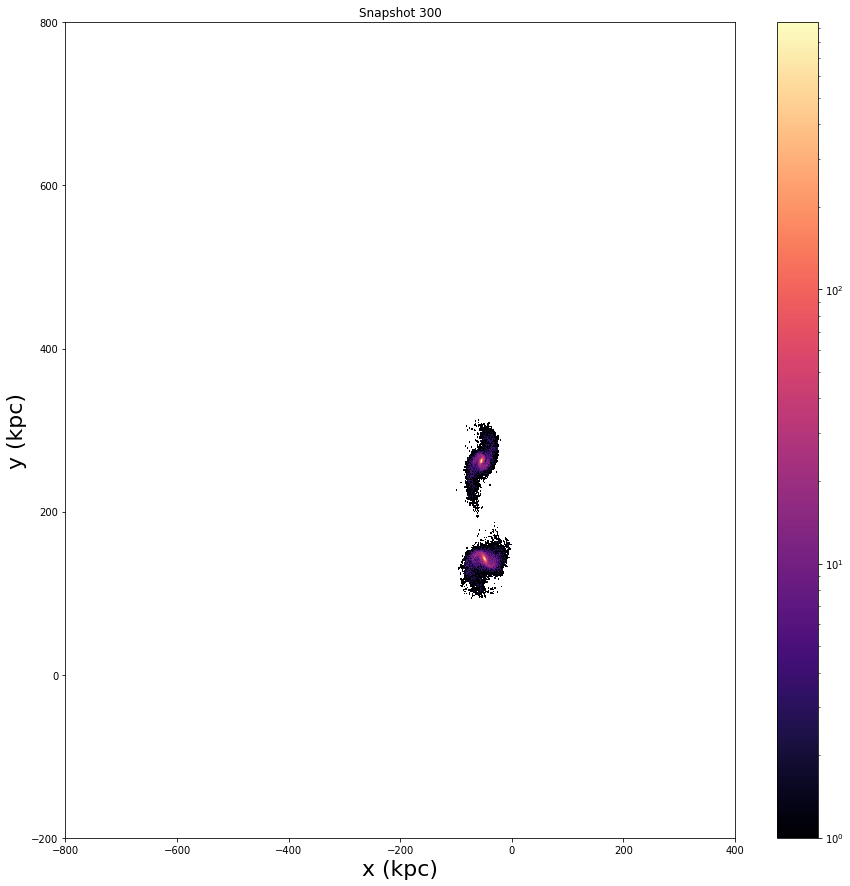

000305


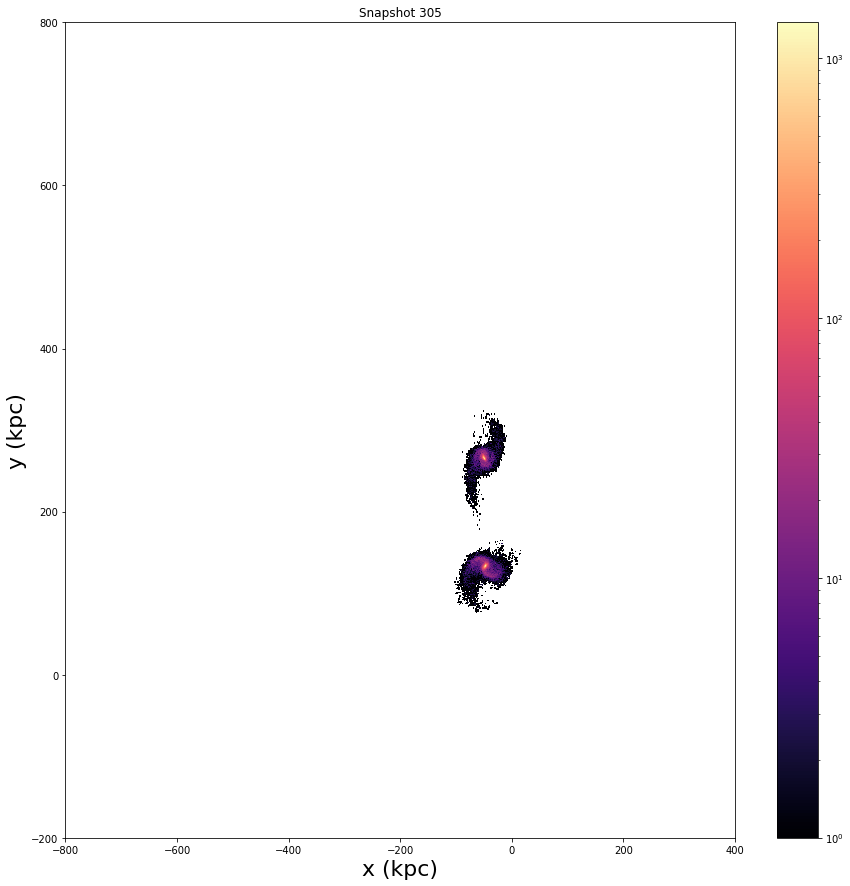

000310


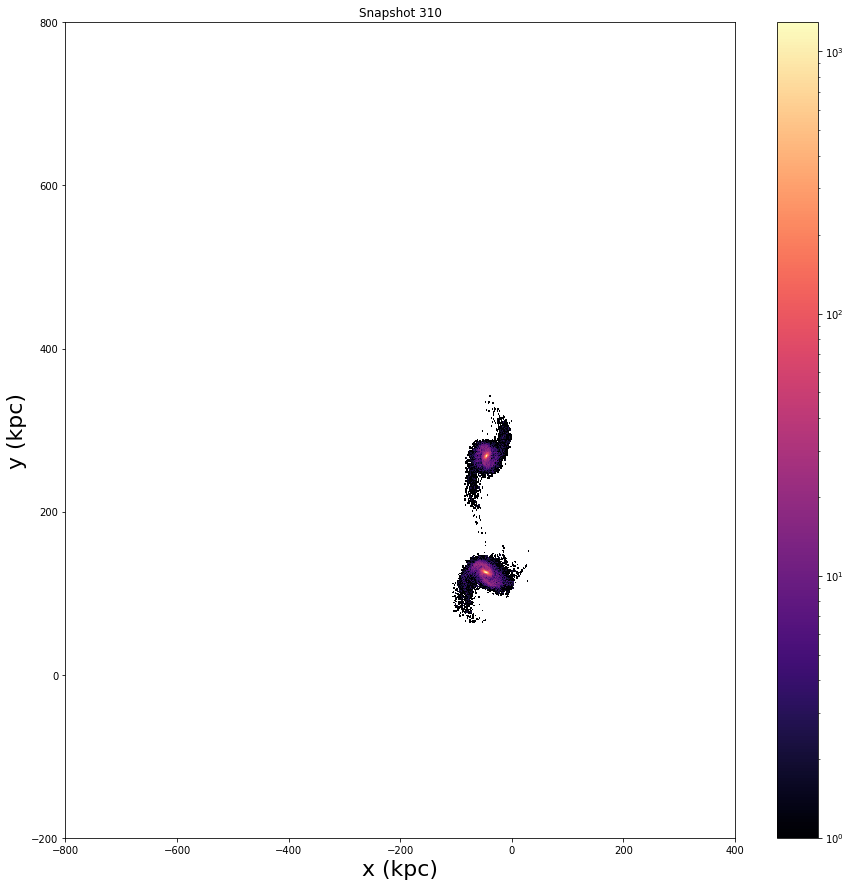

000315


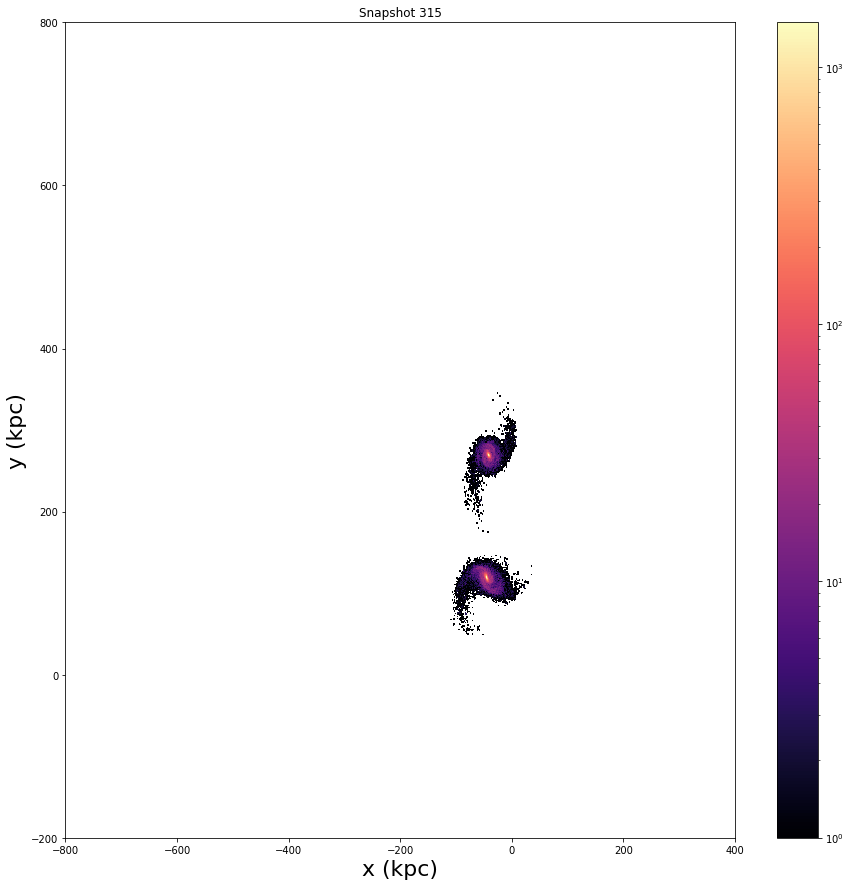

000320


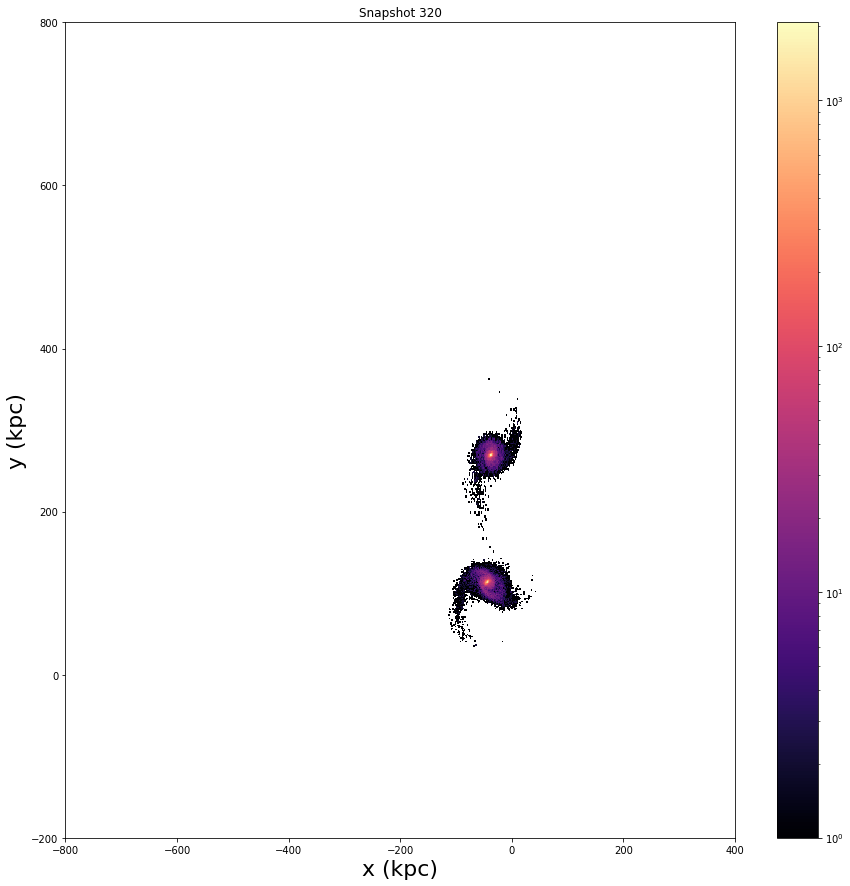

000325


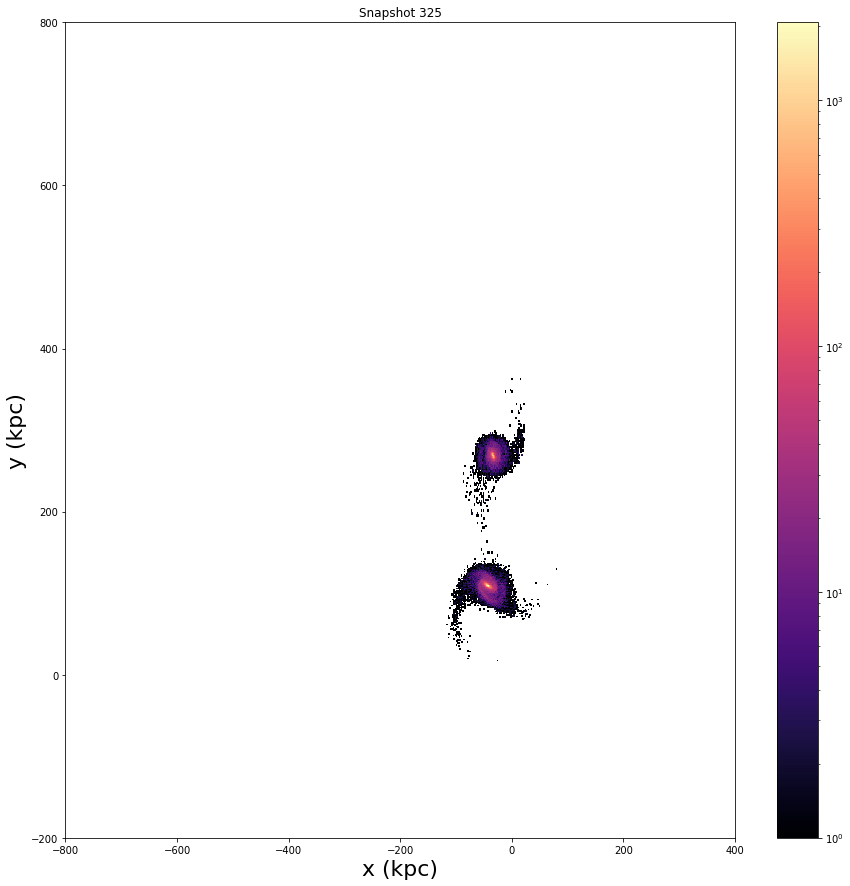

000330


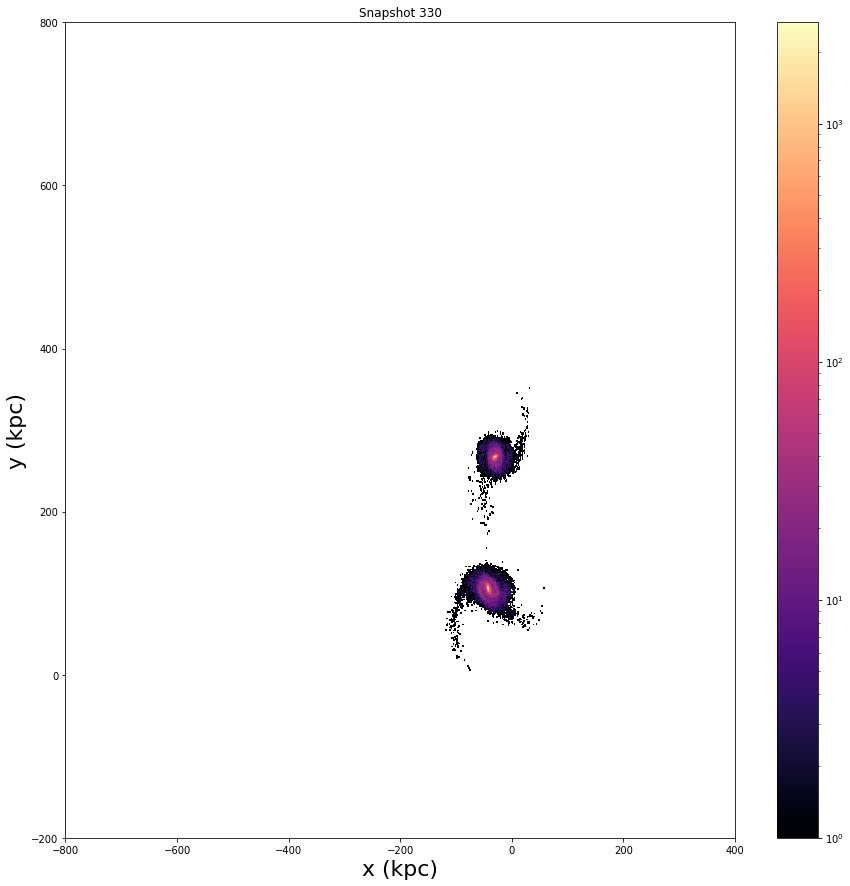

000335


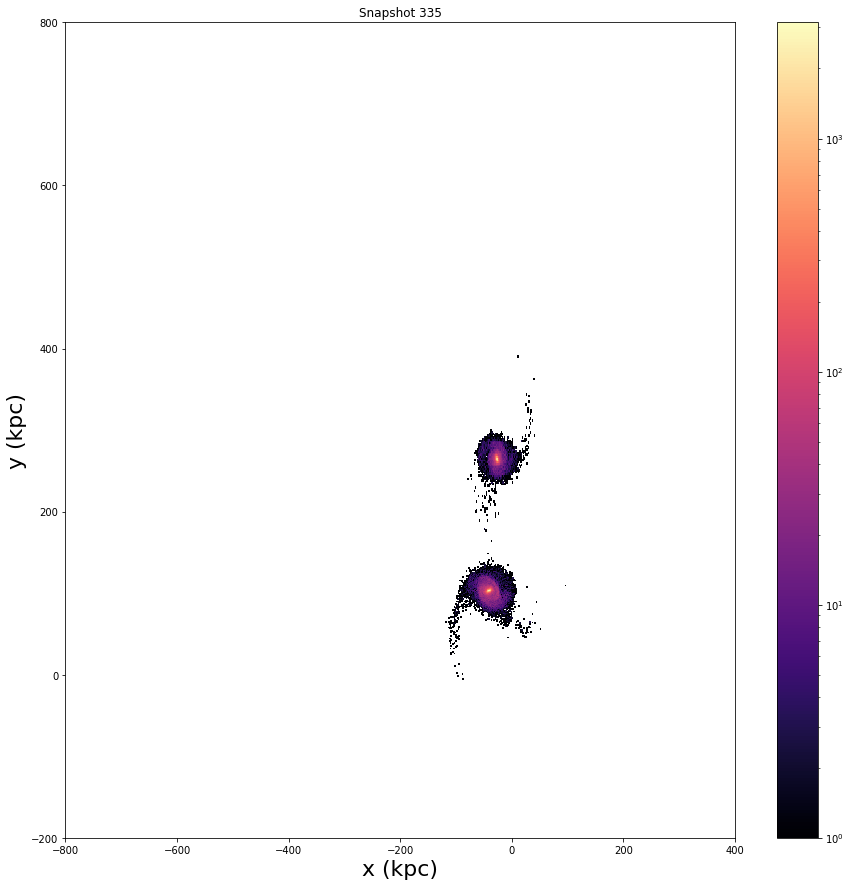

000340


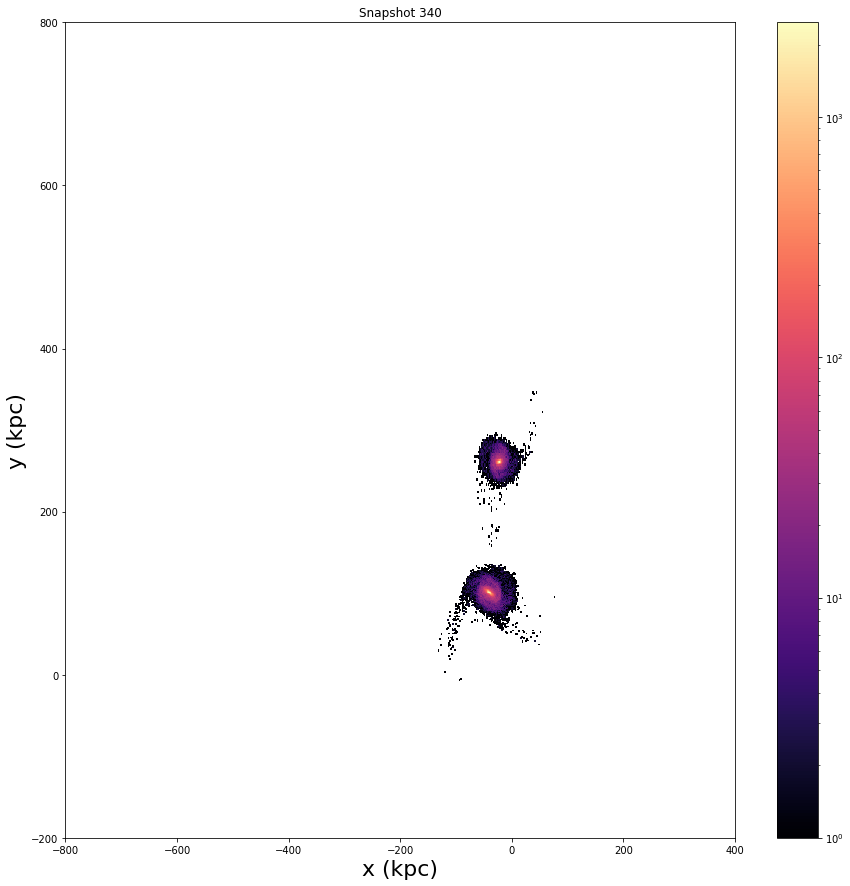

000345


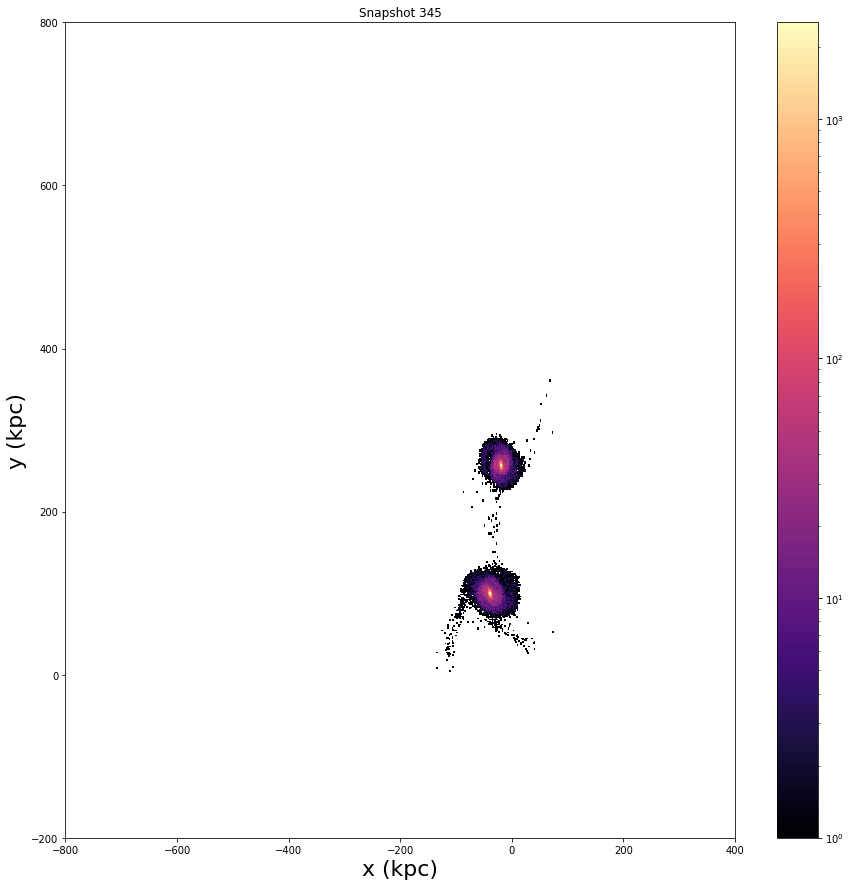

000350


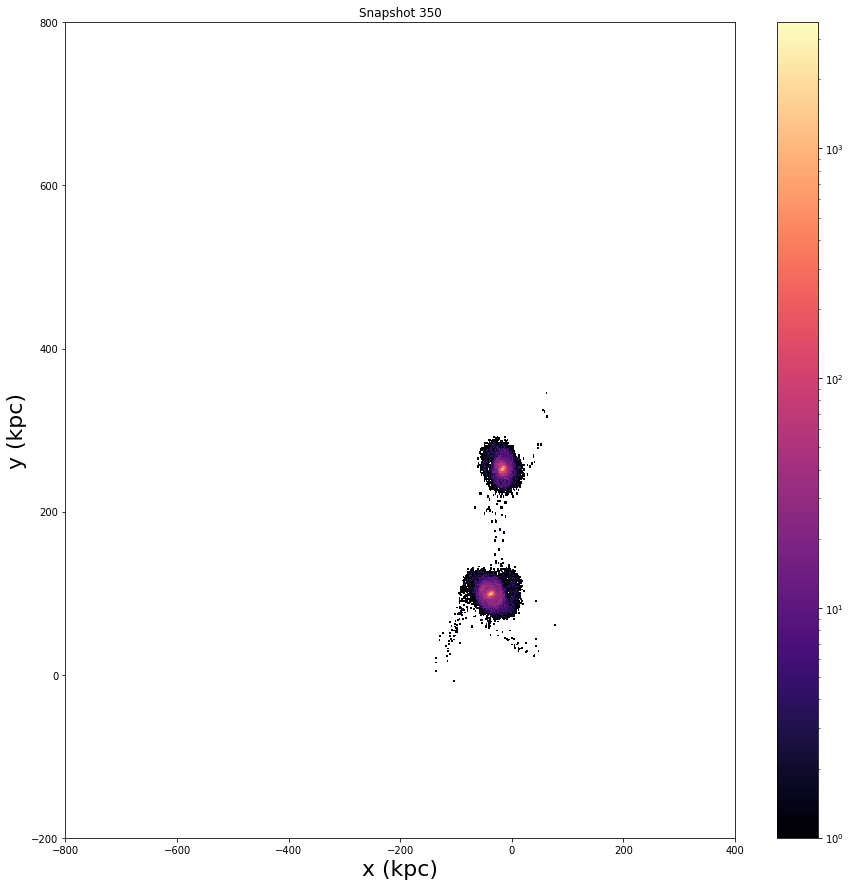

000355


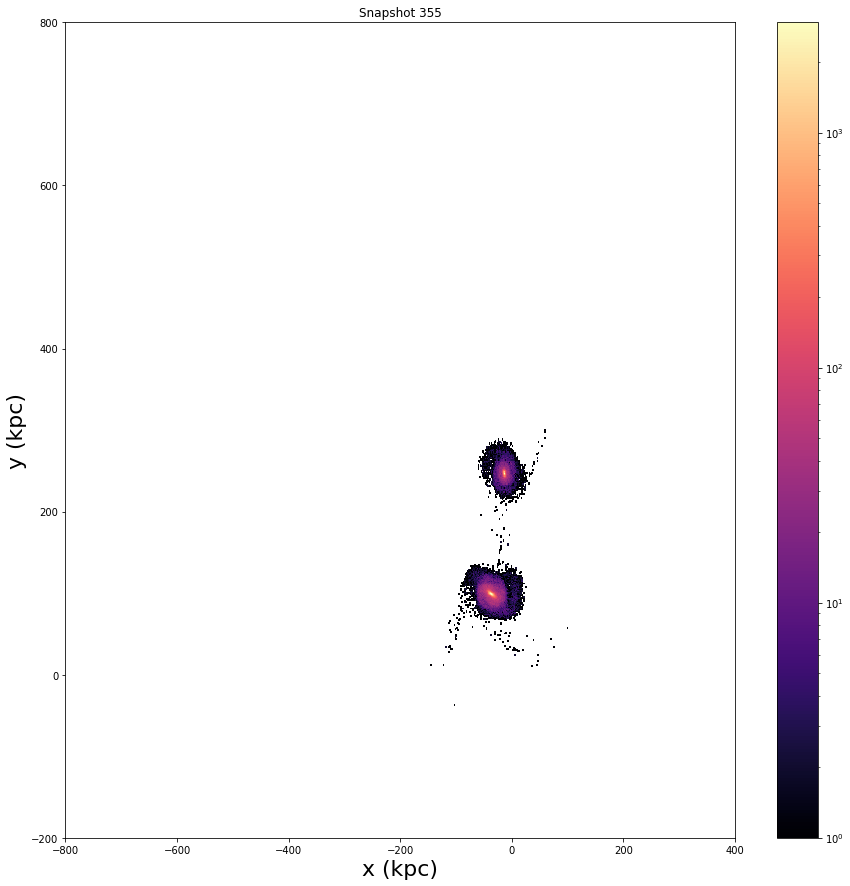

000360


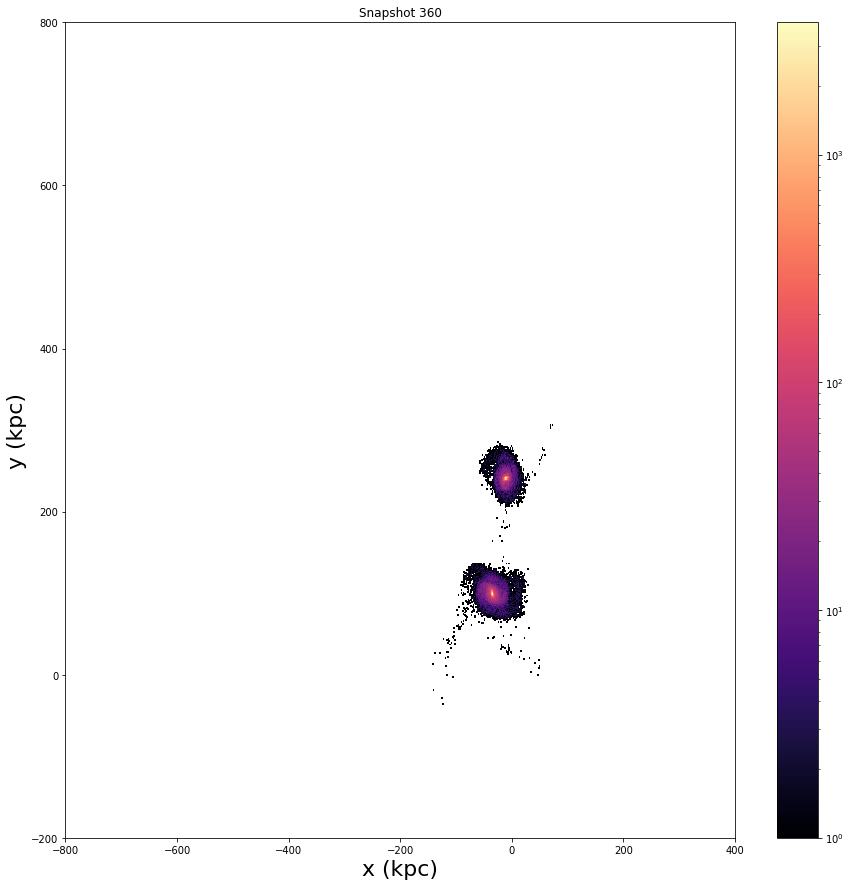

000365


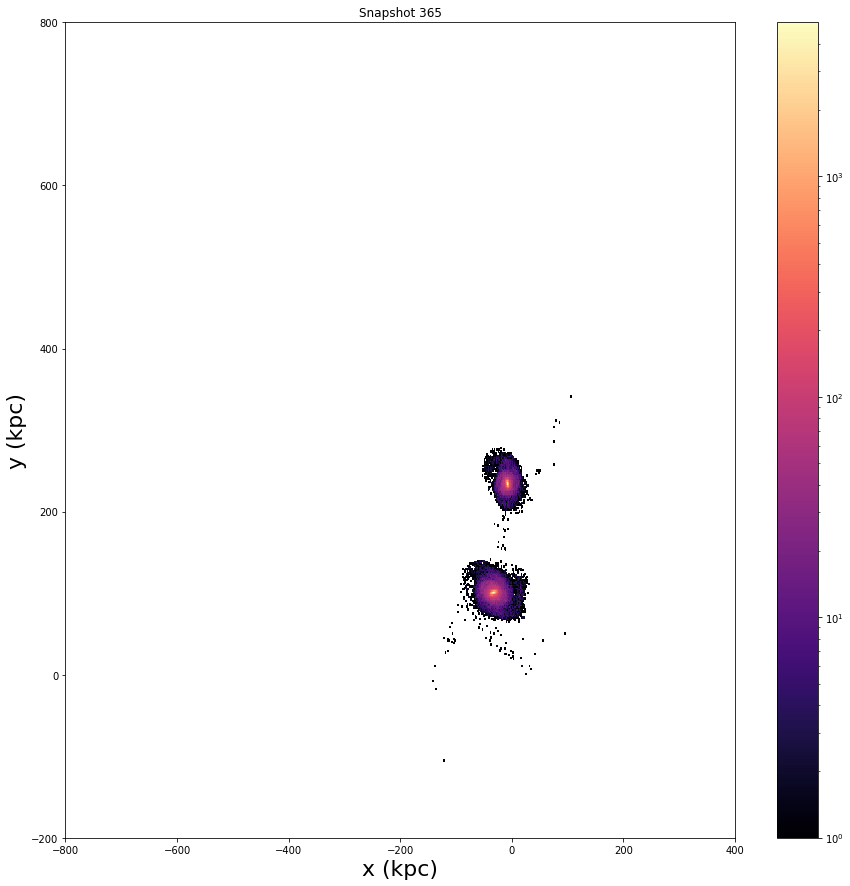

000370


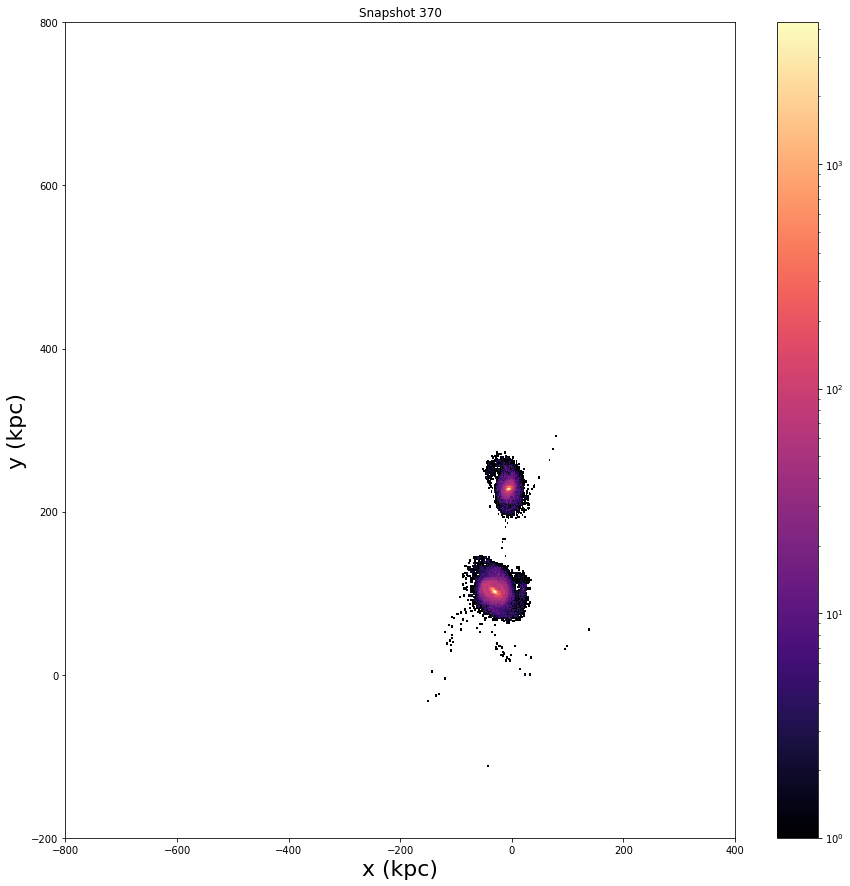

000375


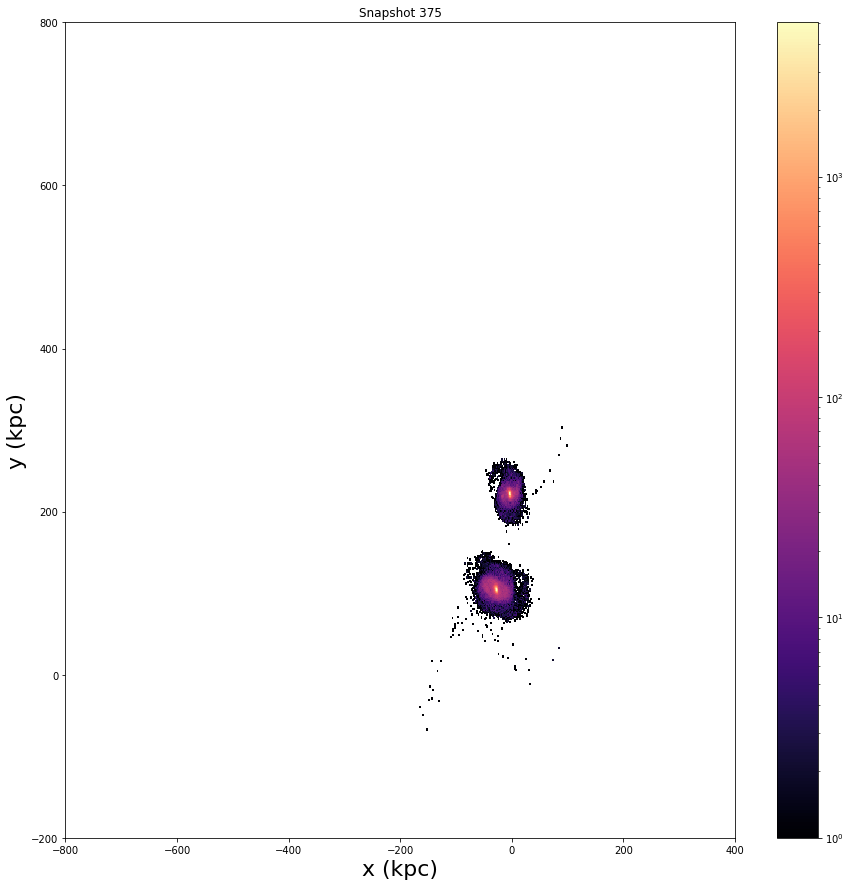

000380


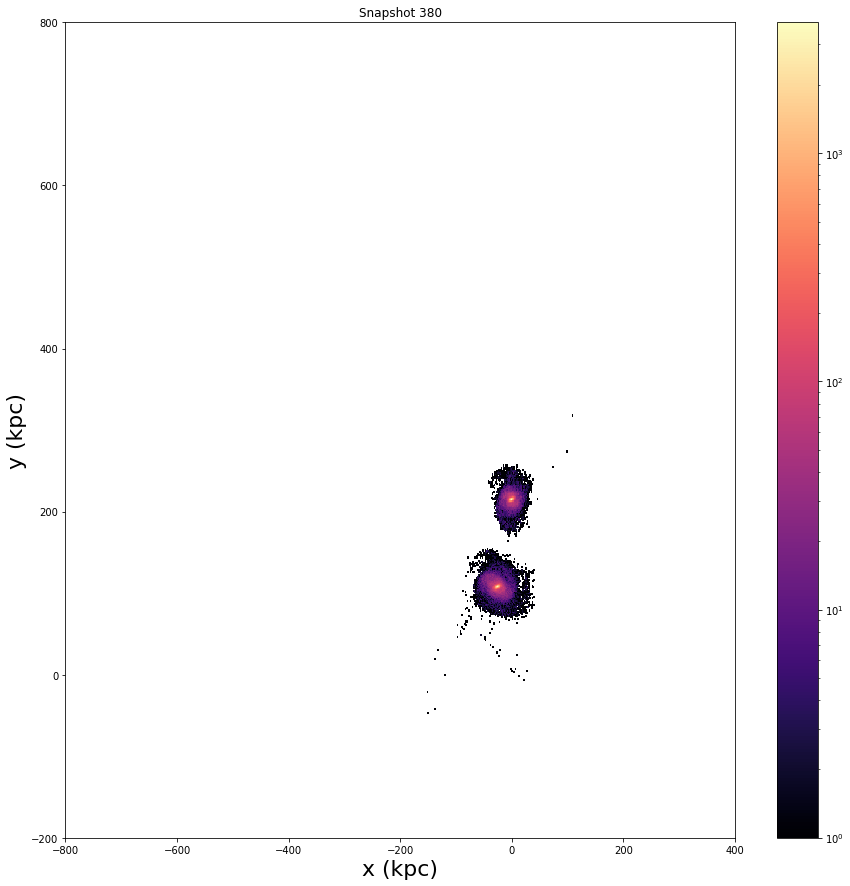

000385


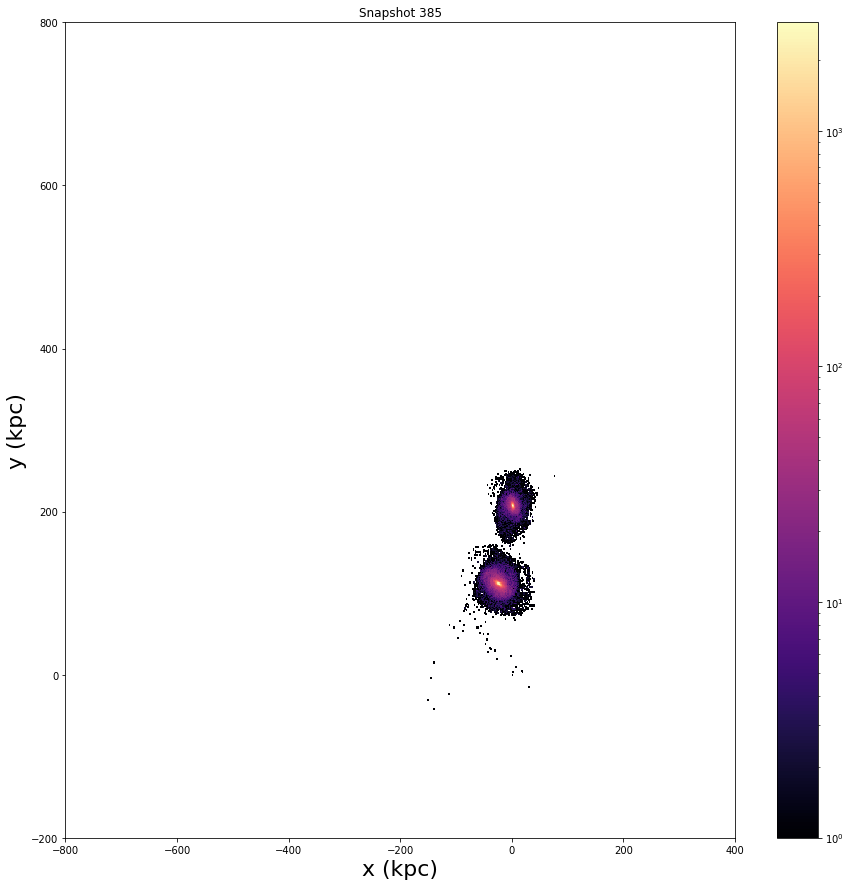

000390


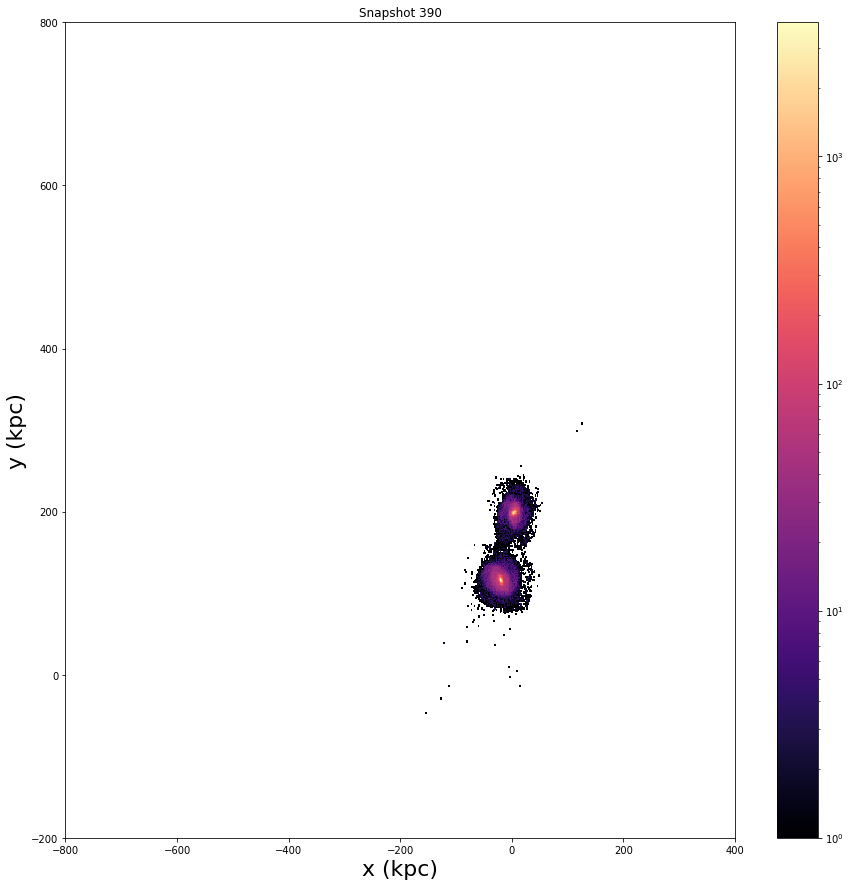

000395


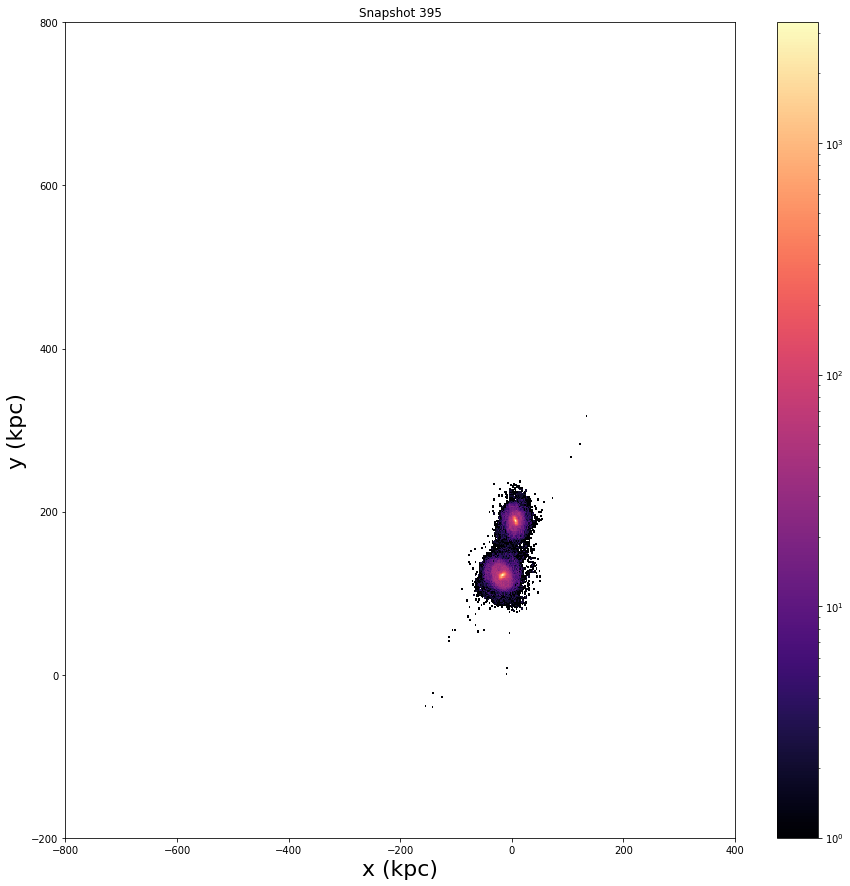

000400


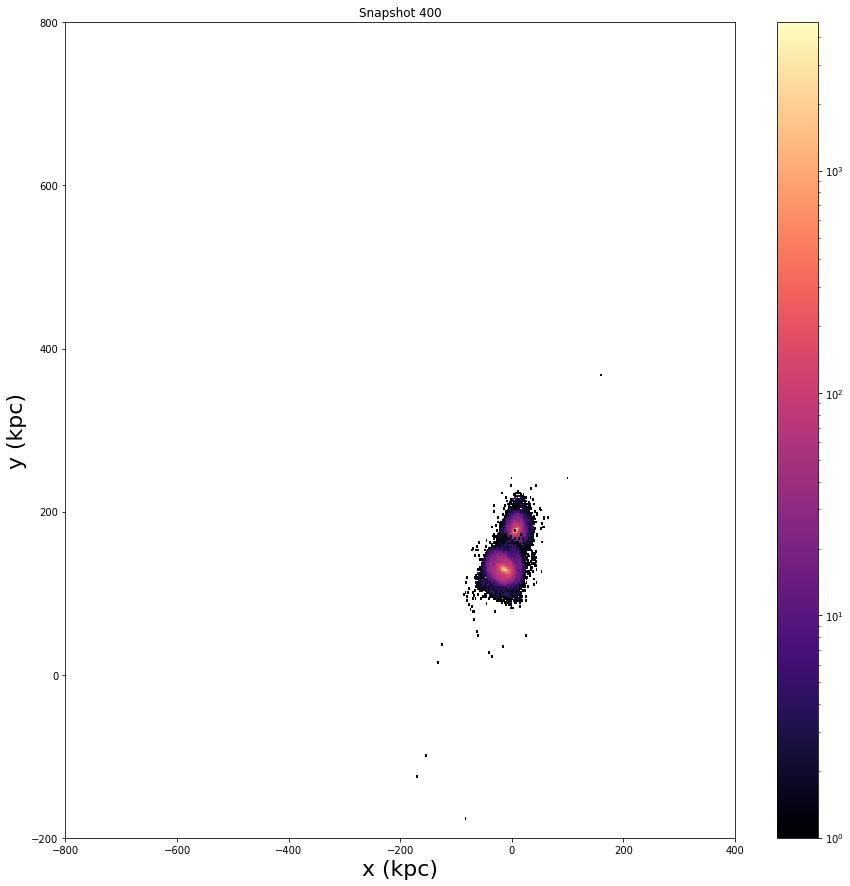

000405


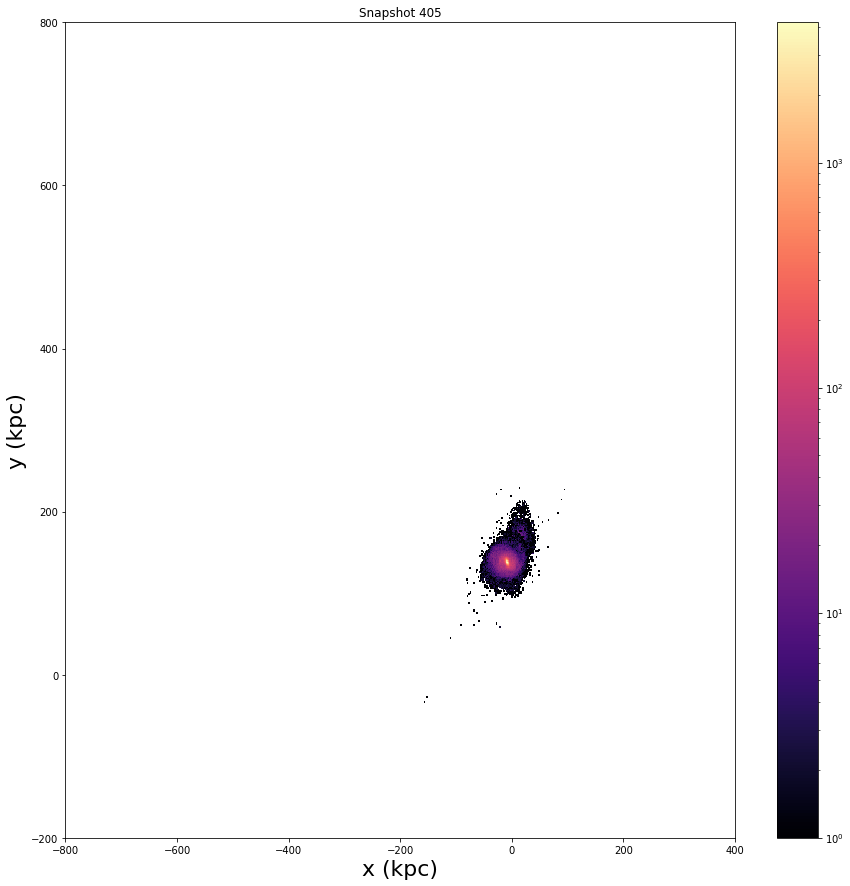

000410


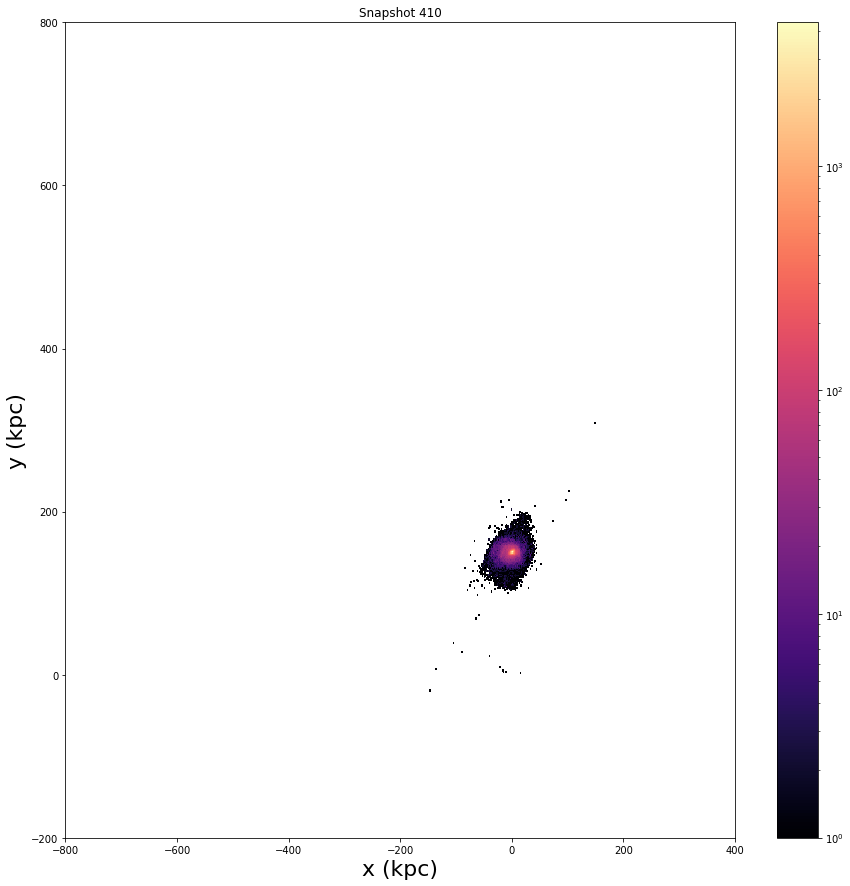

000415


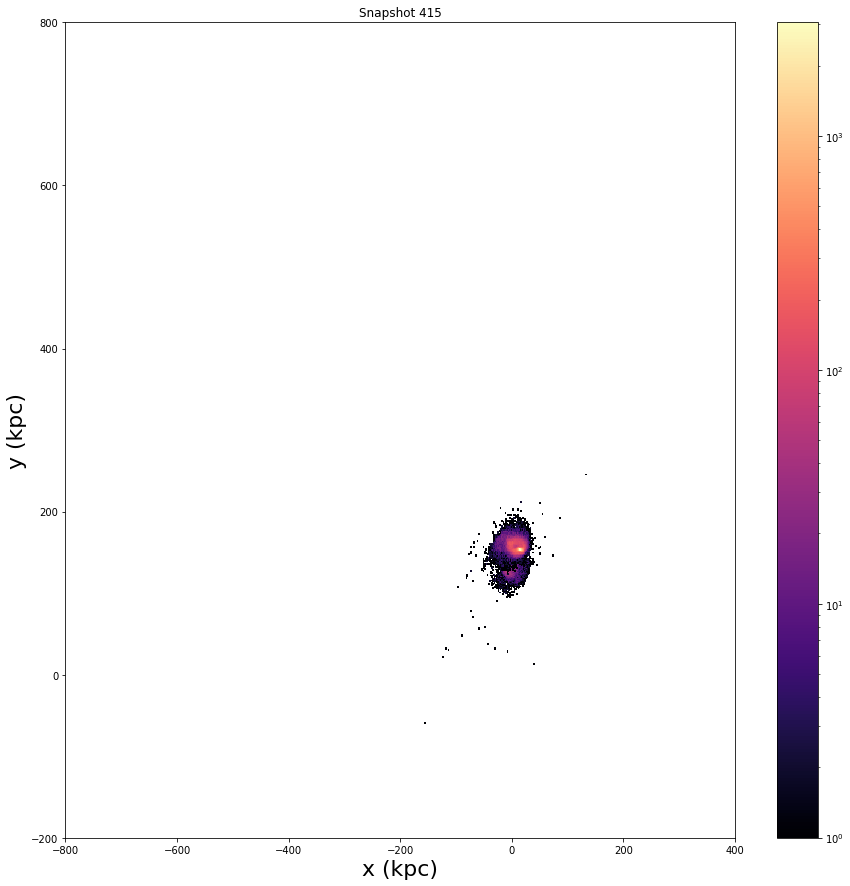

000420


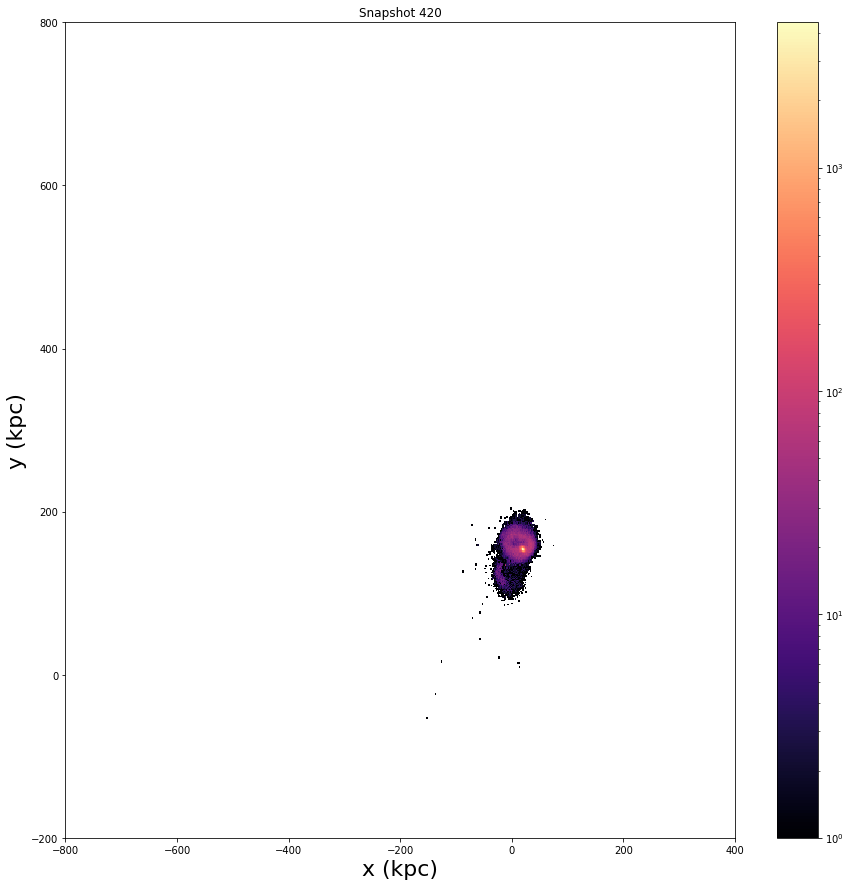

000425


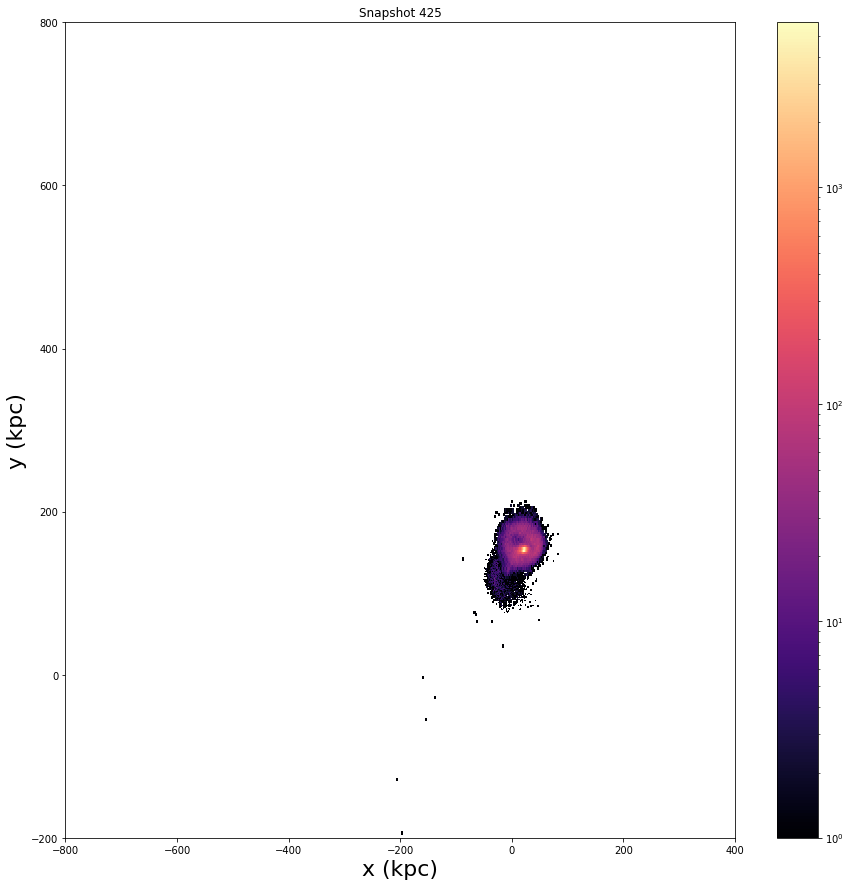

000430


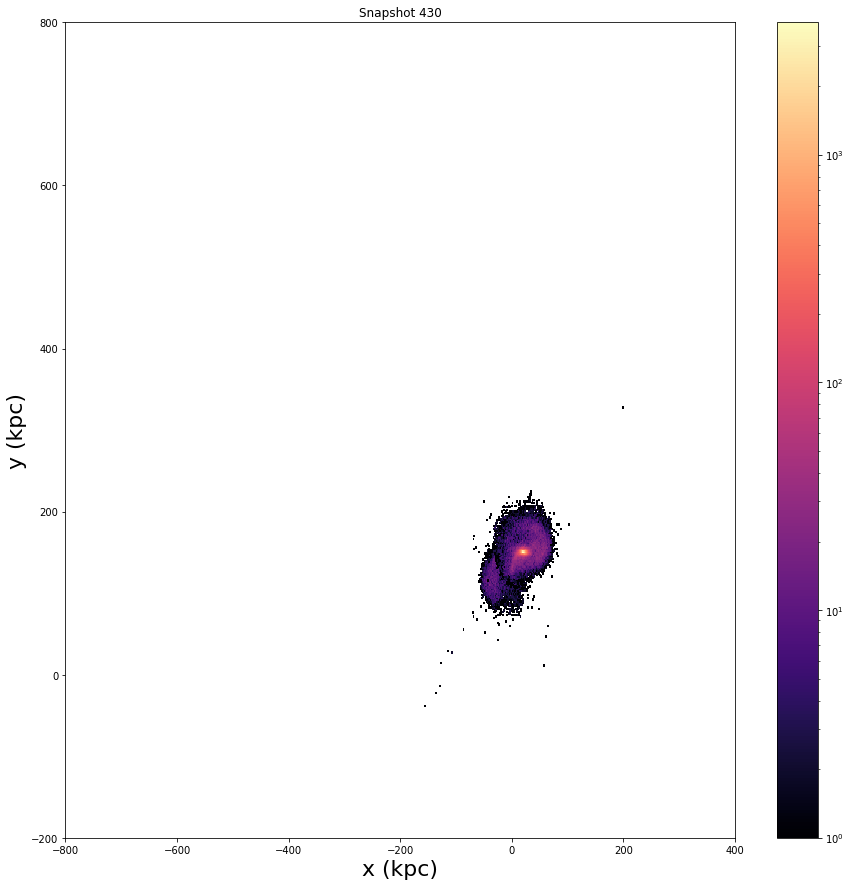

000435


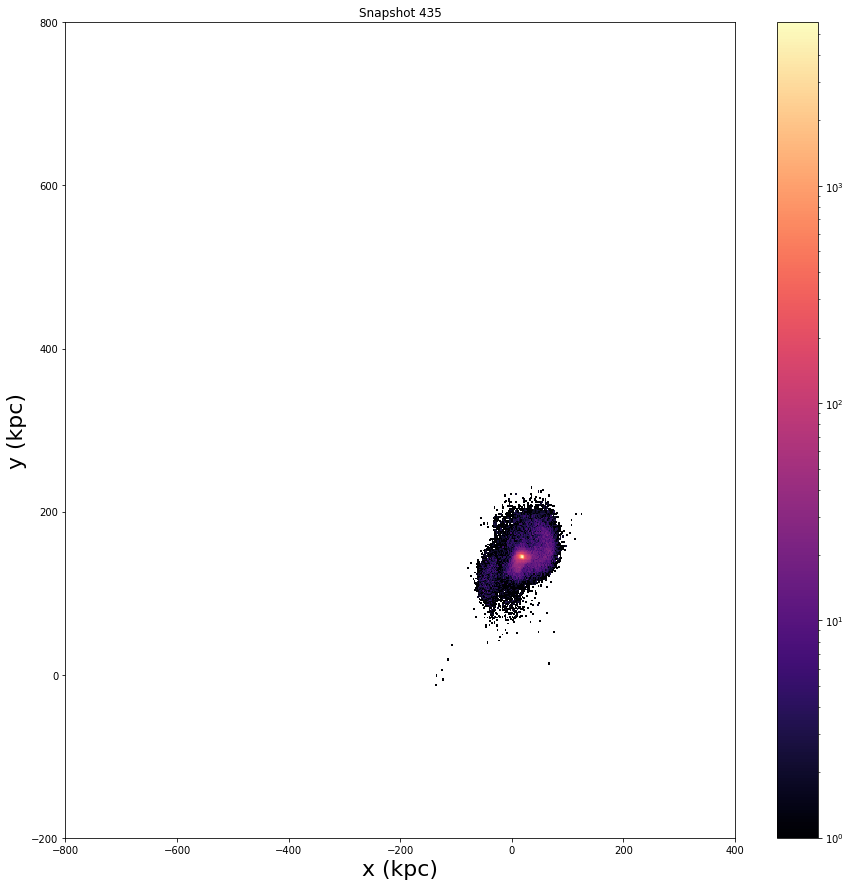

000440


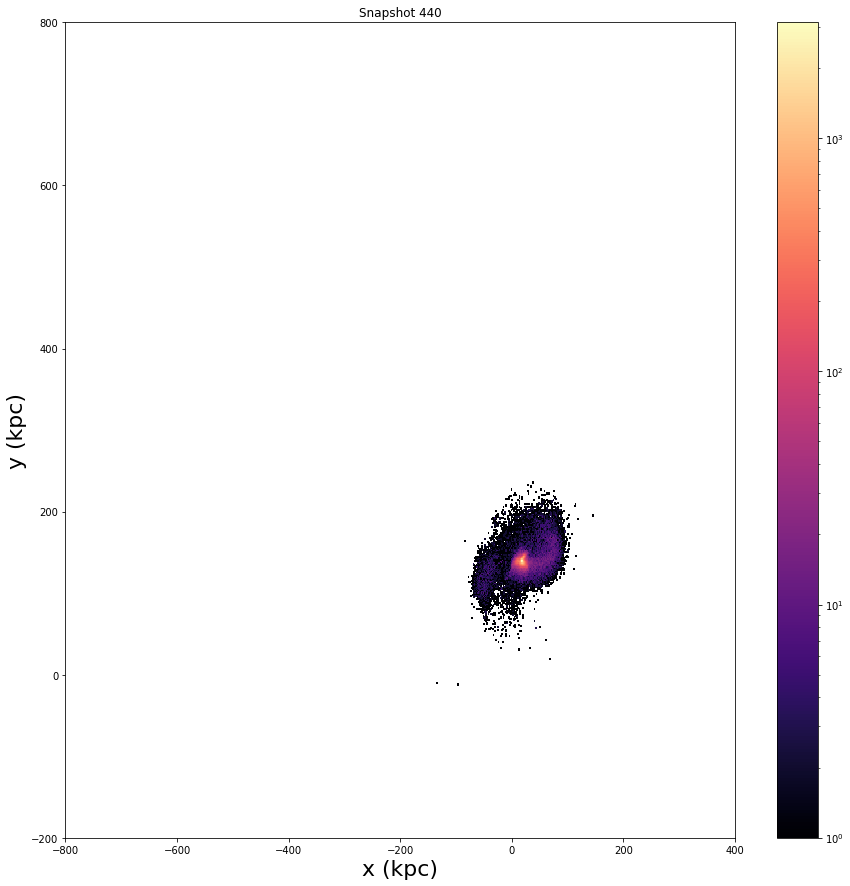

000445


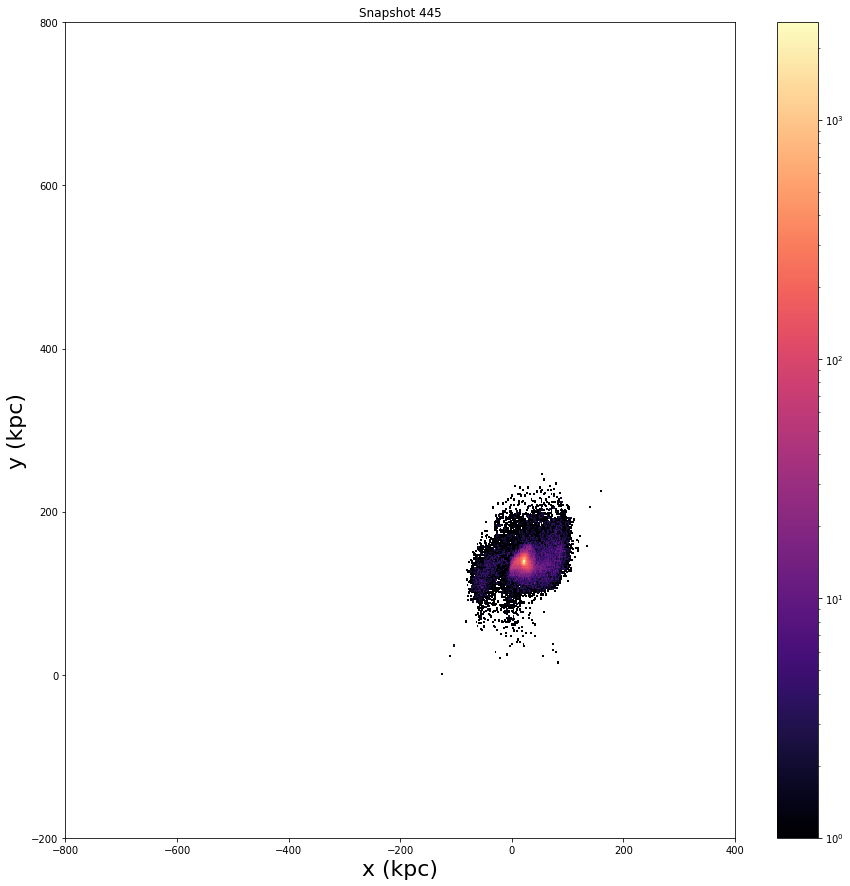

000450


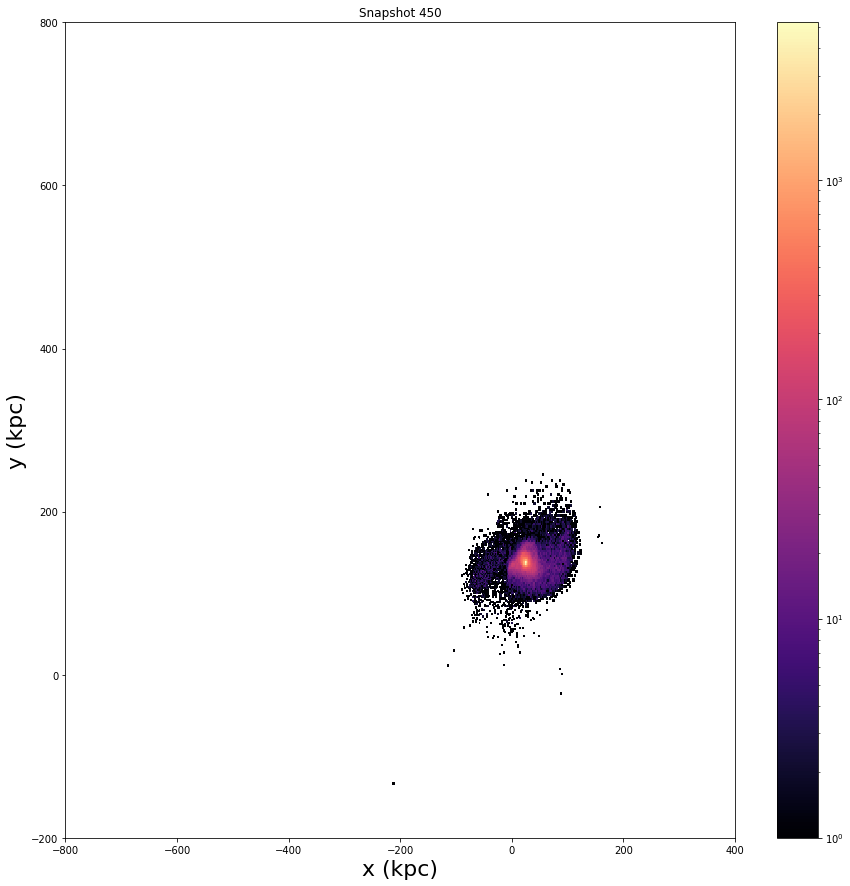

000455


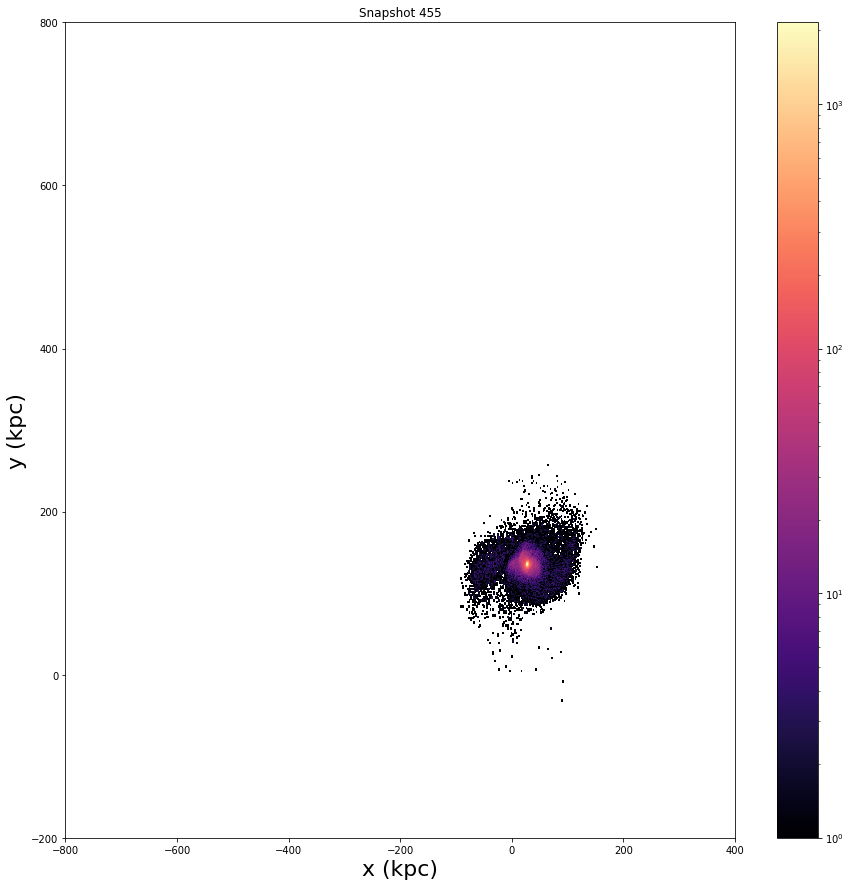

000460


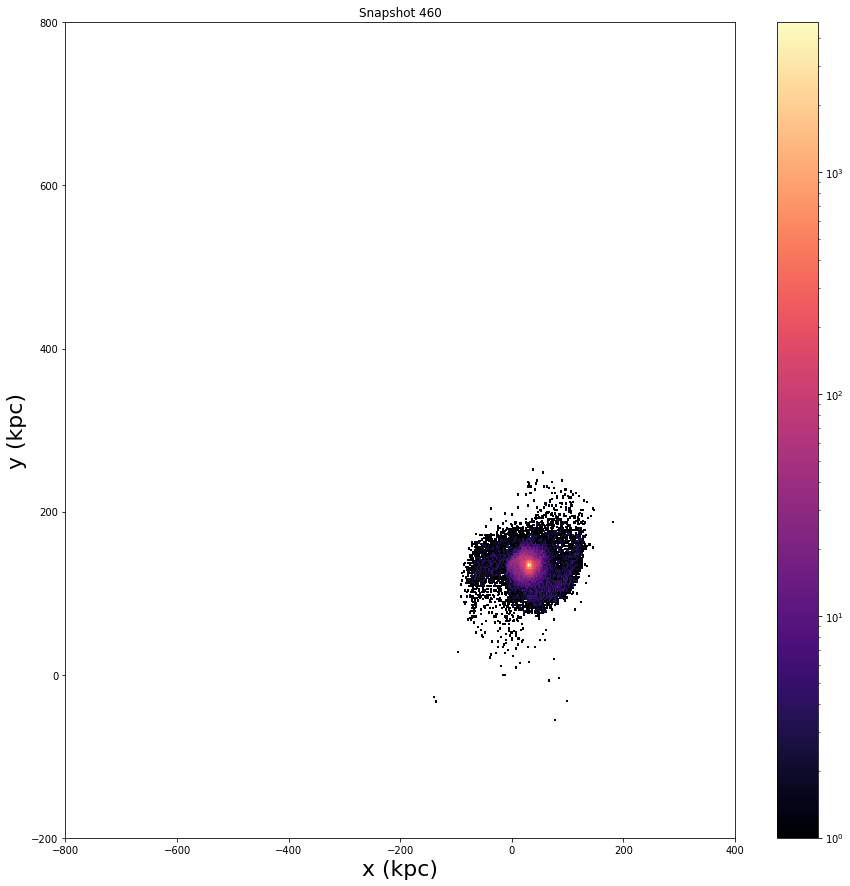

000465


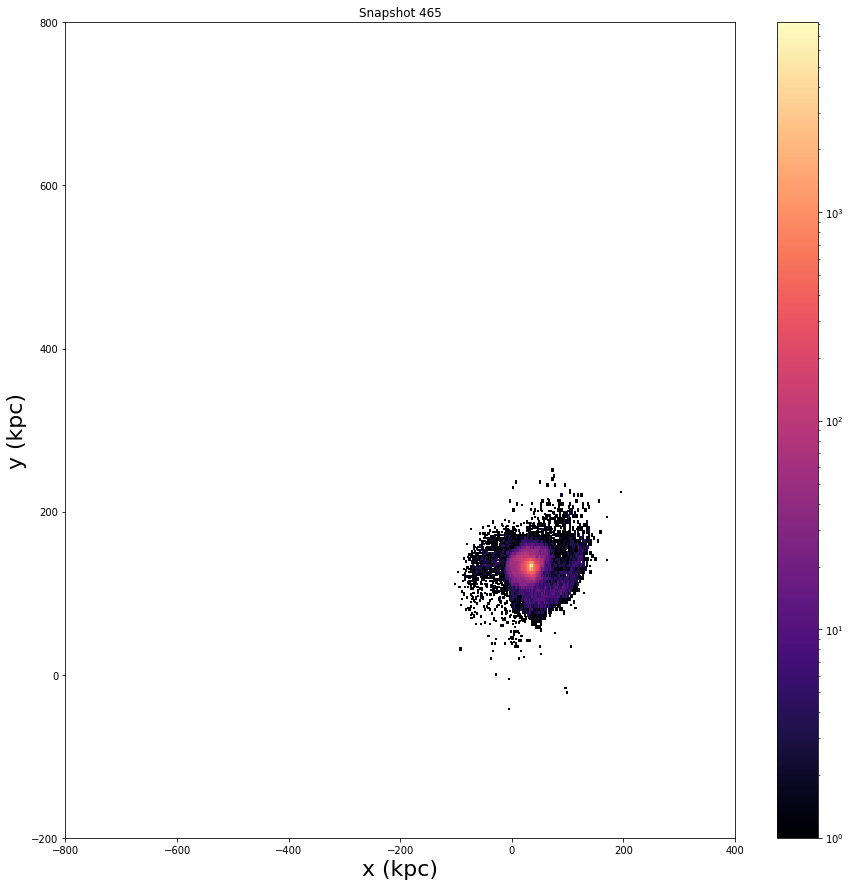

000470


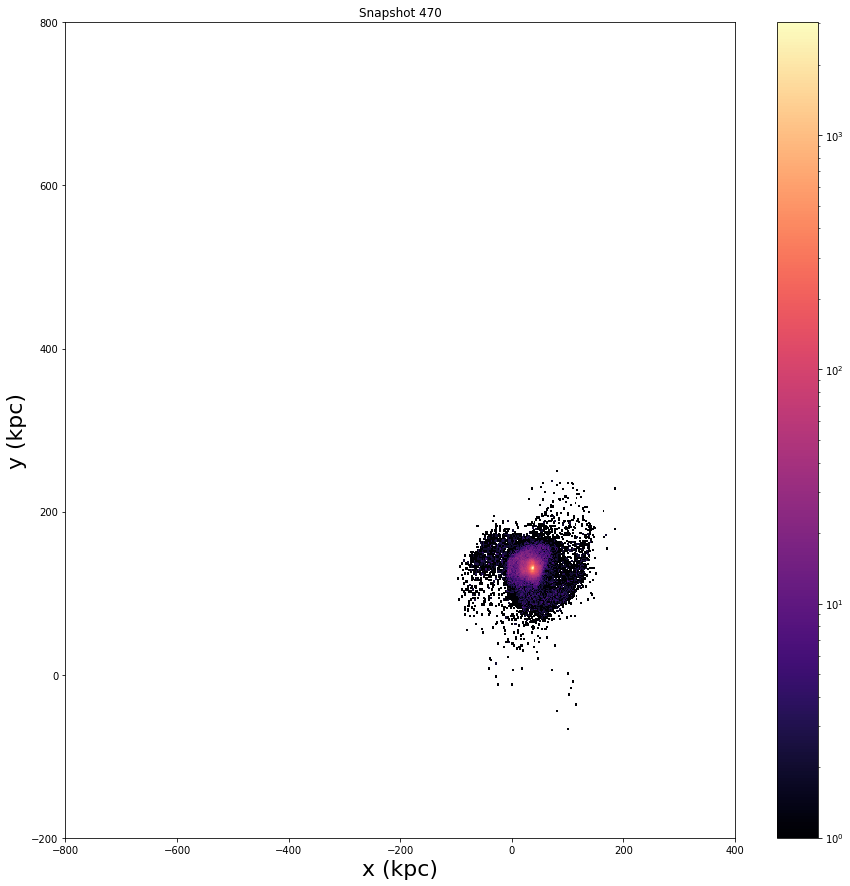

000475


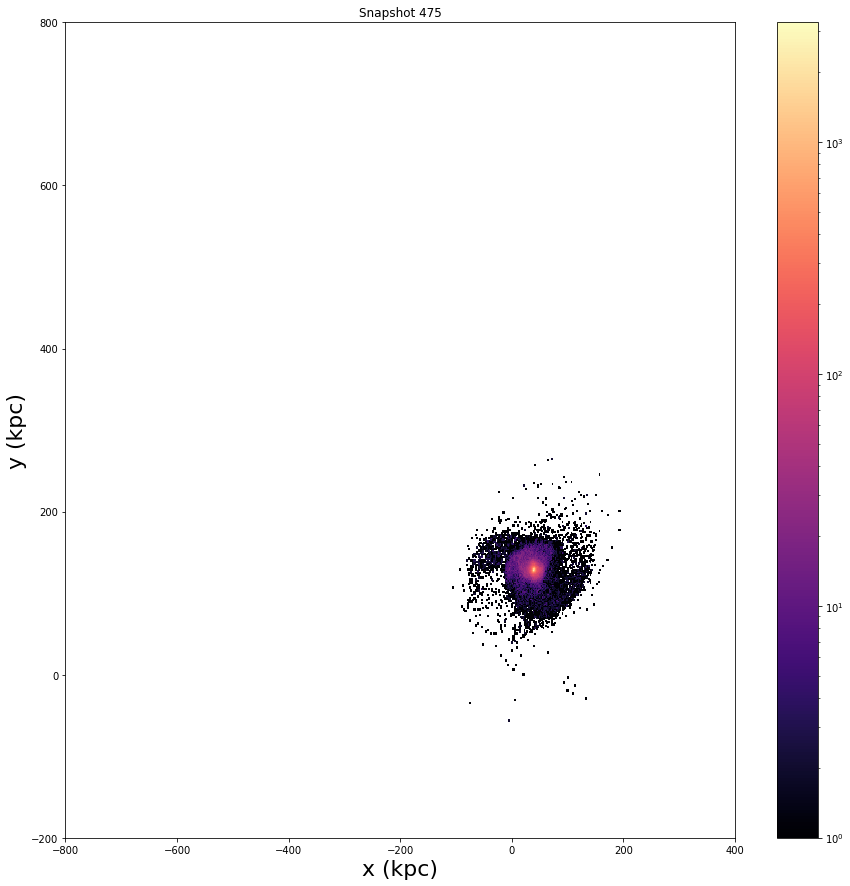

000480


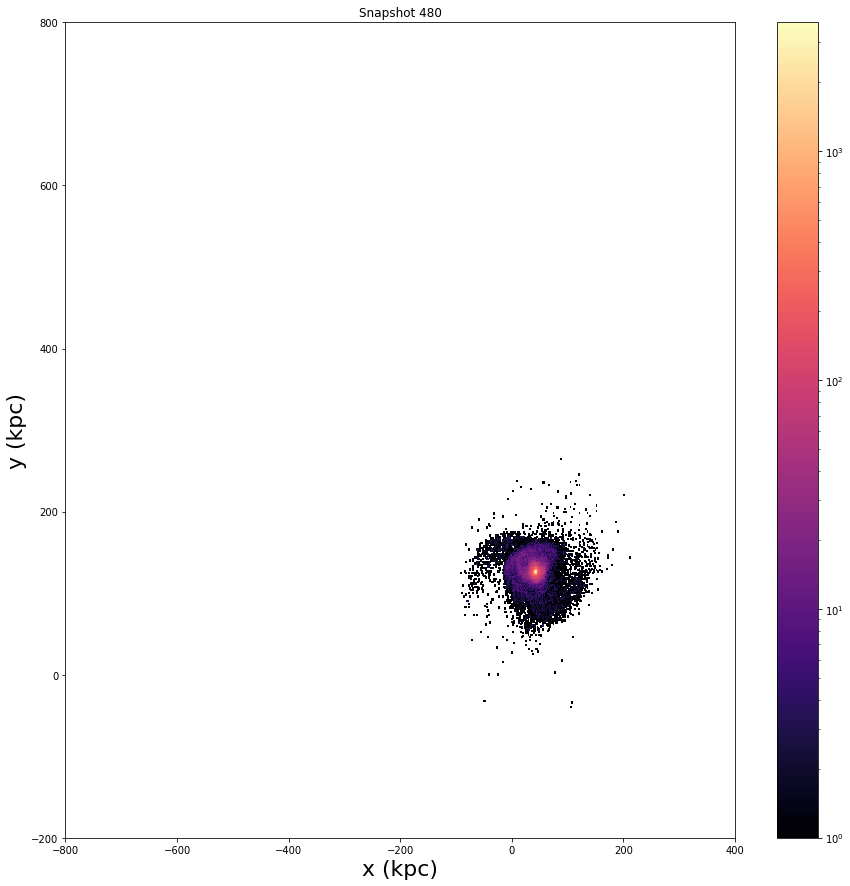

000485


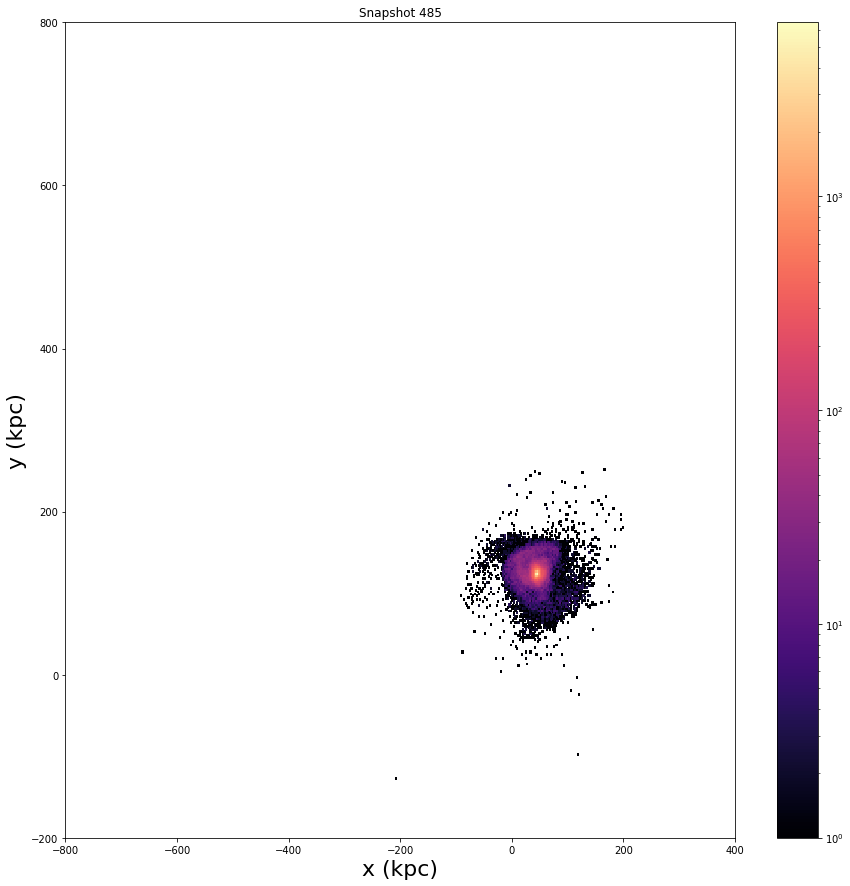

000490


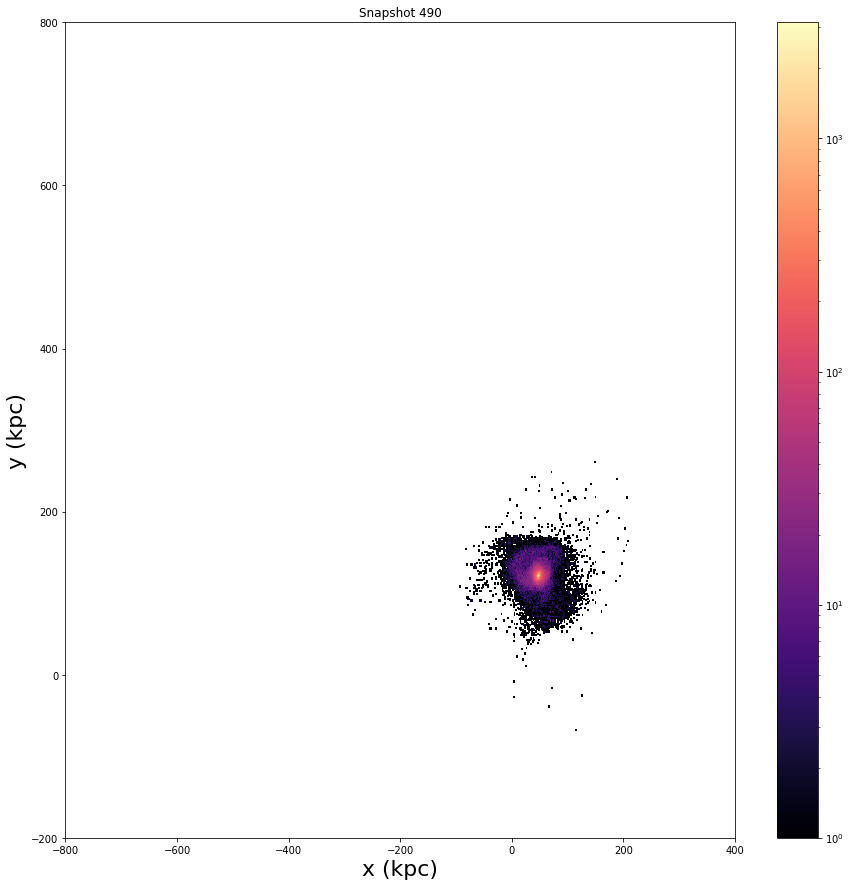

000495


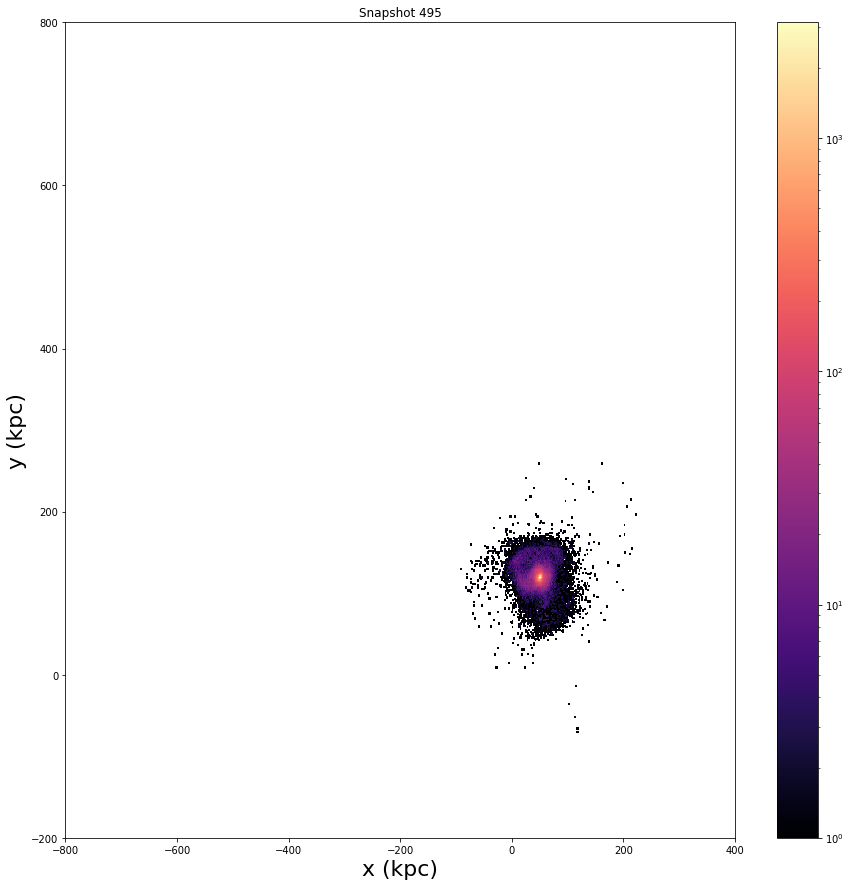

000500


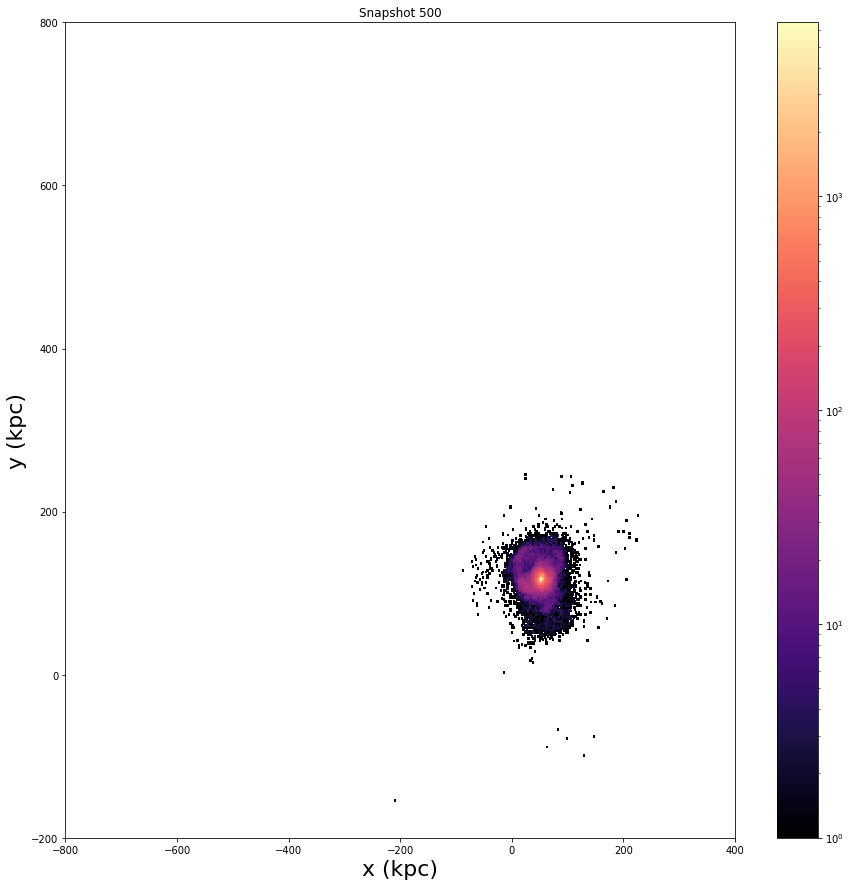

000505


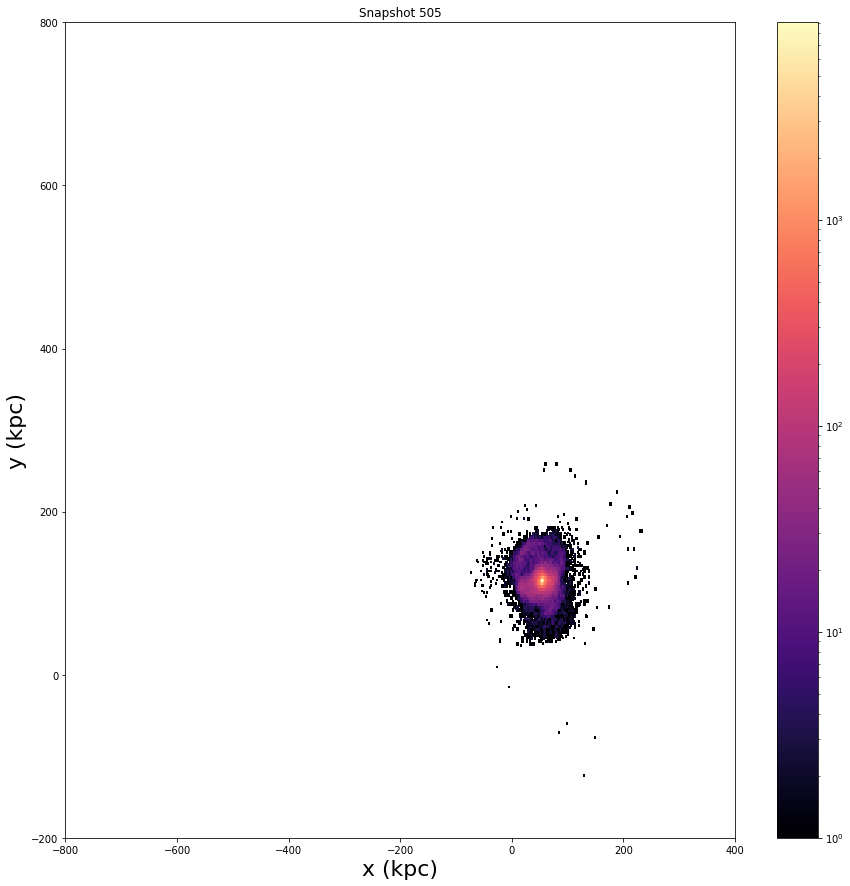

000510


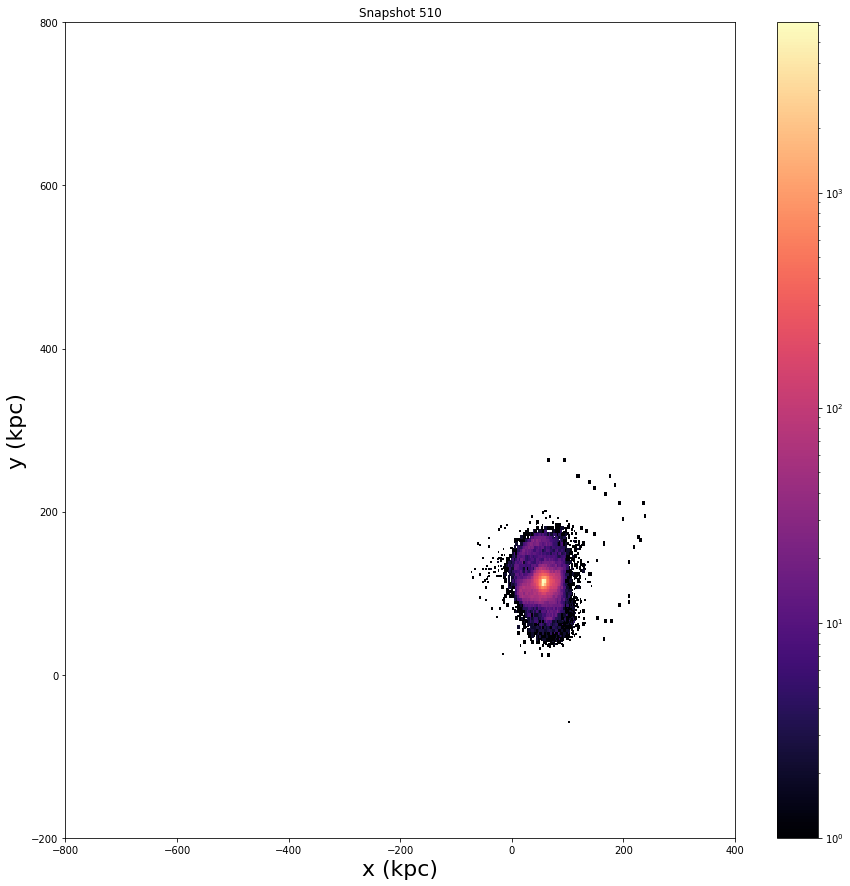

000515


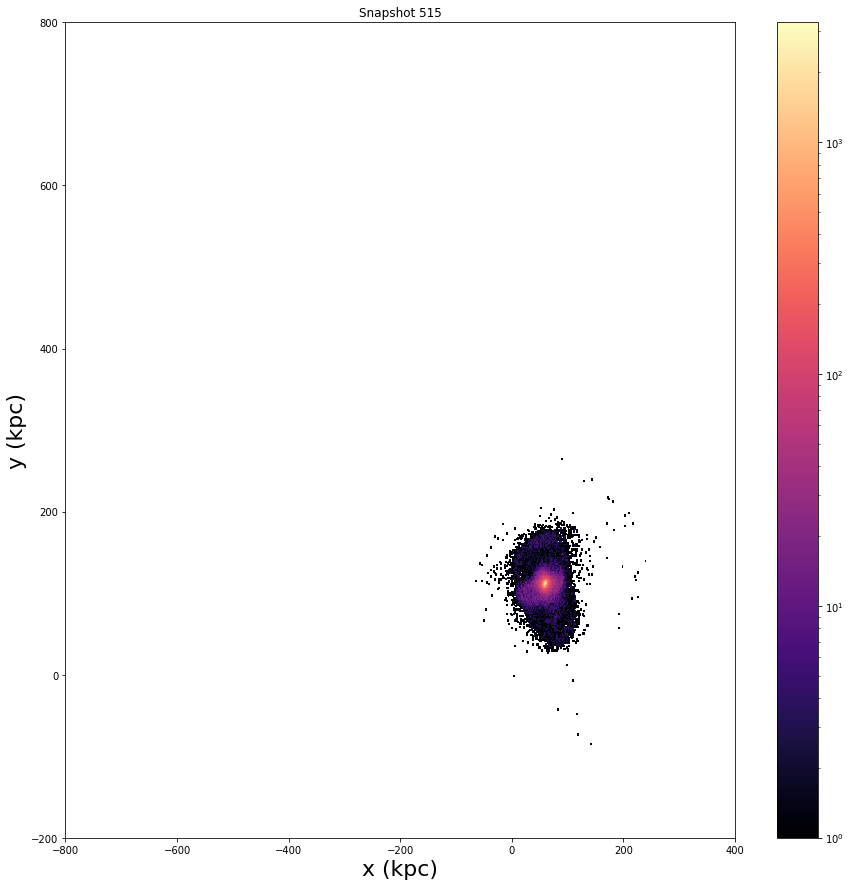

000520


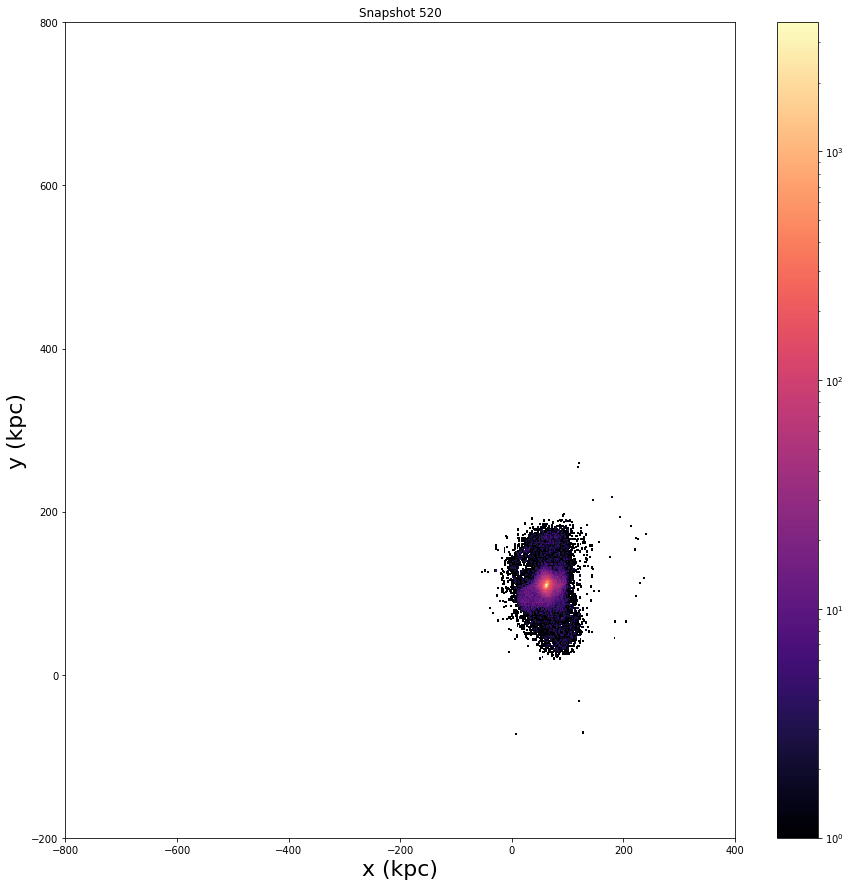

000525


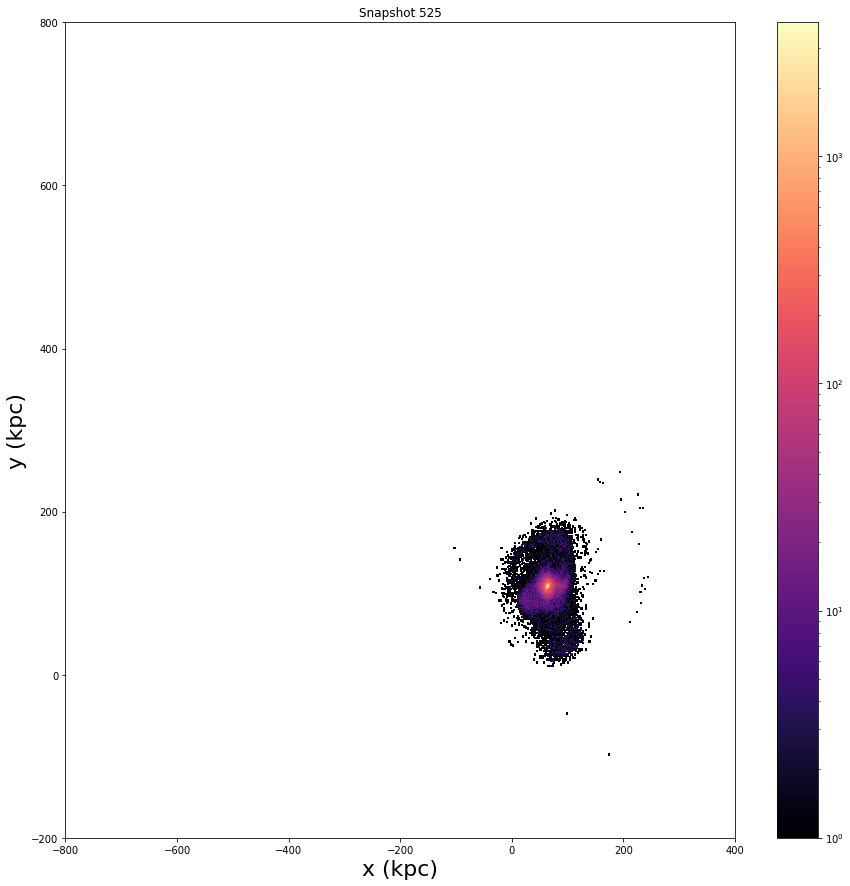

000530


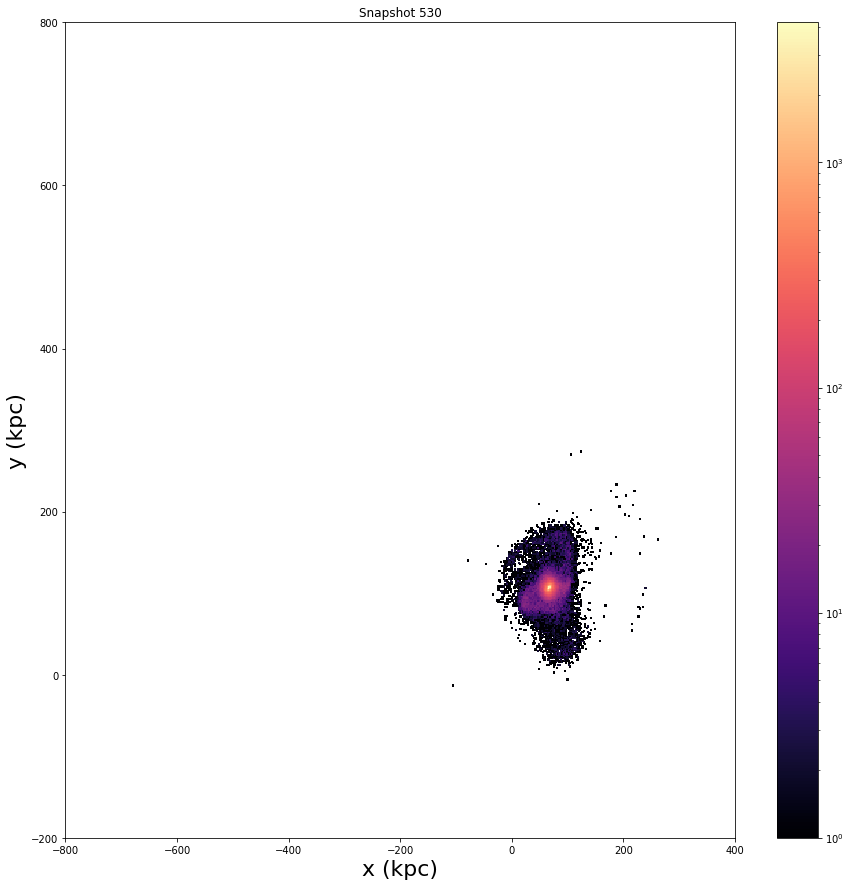

000535


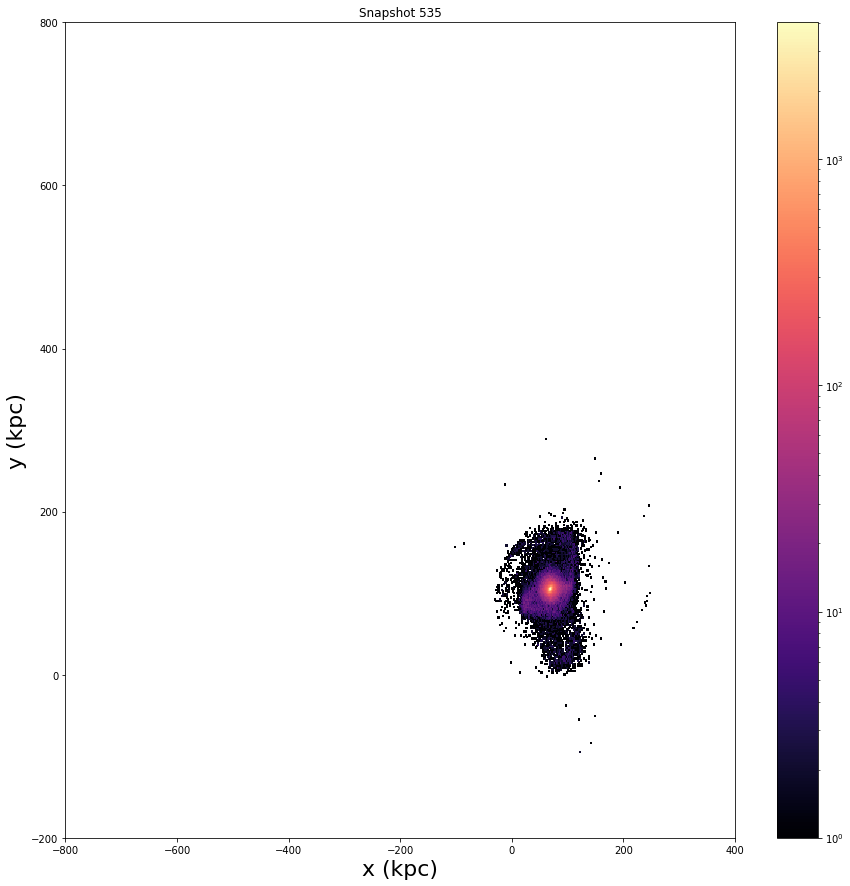

000540


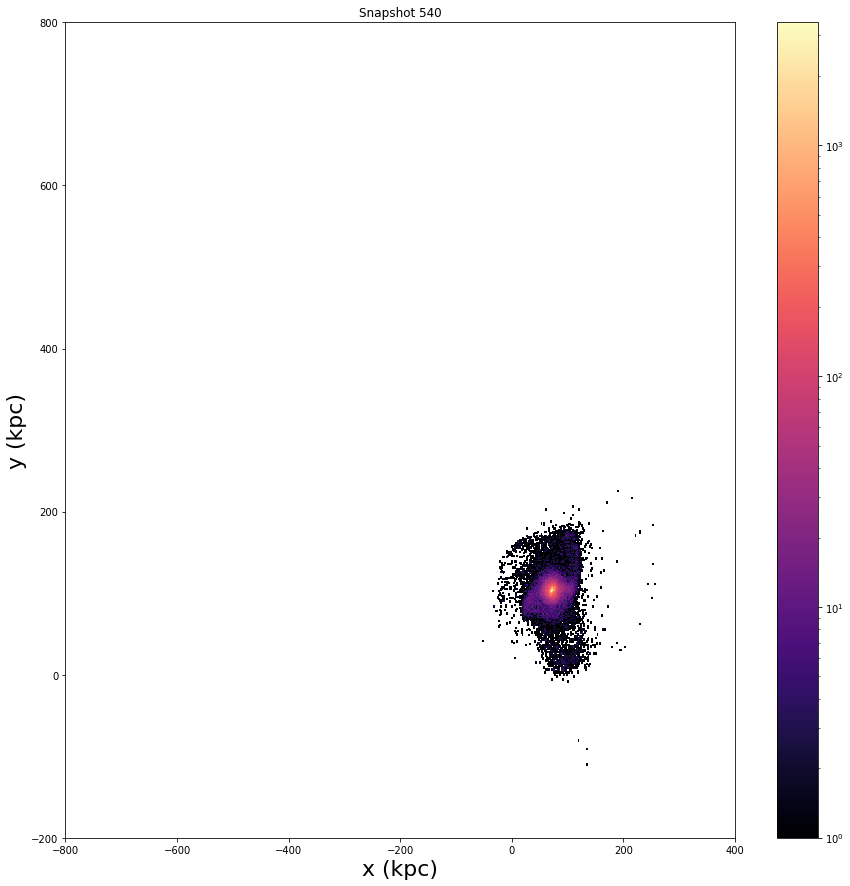

000545


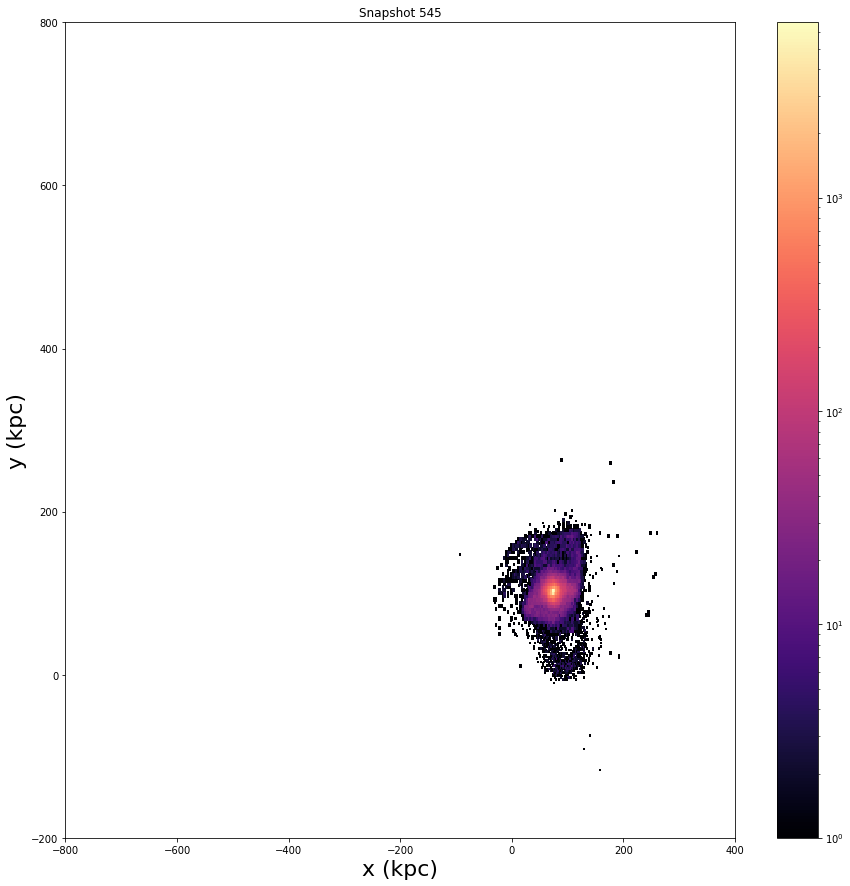

000550


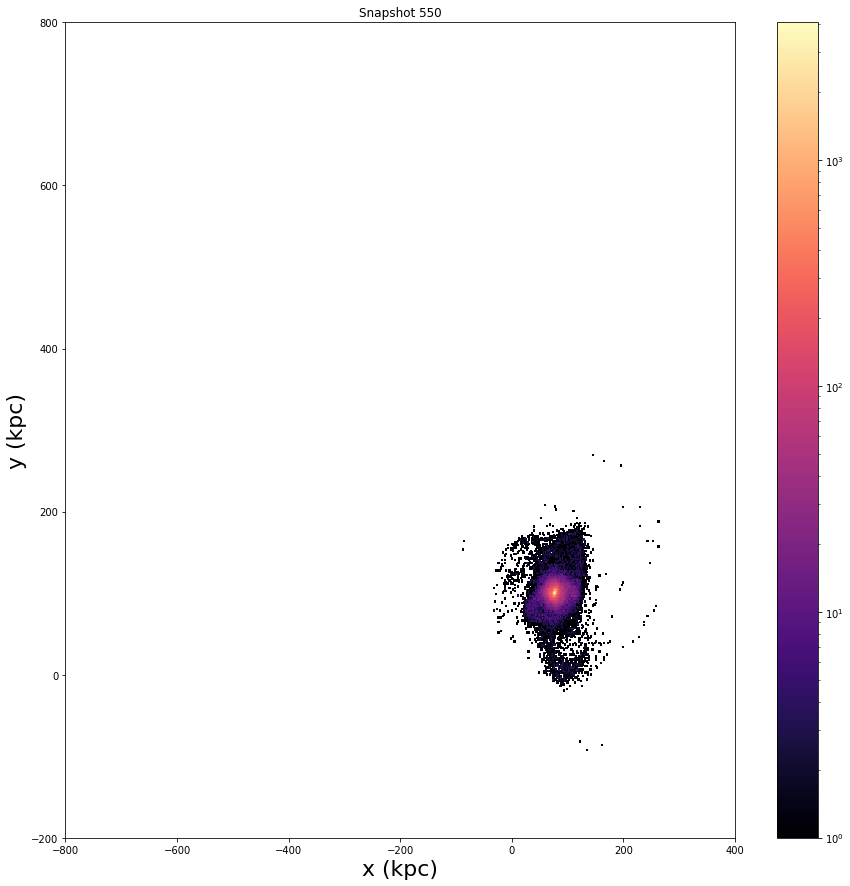

000555


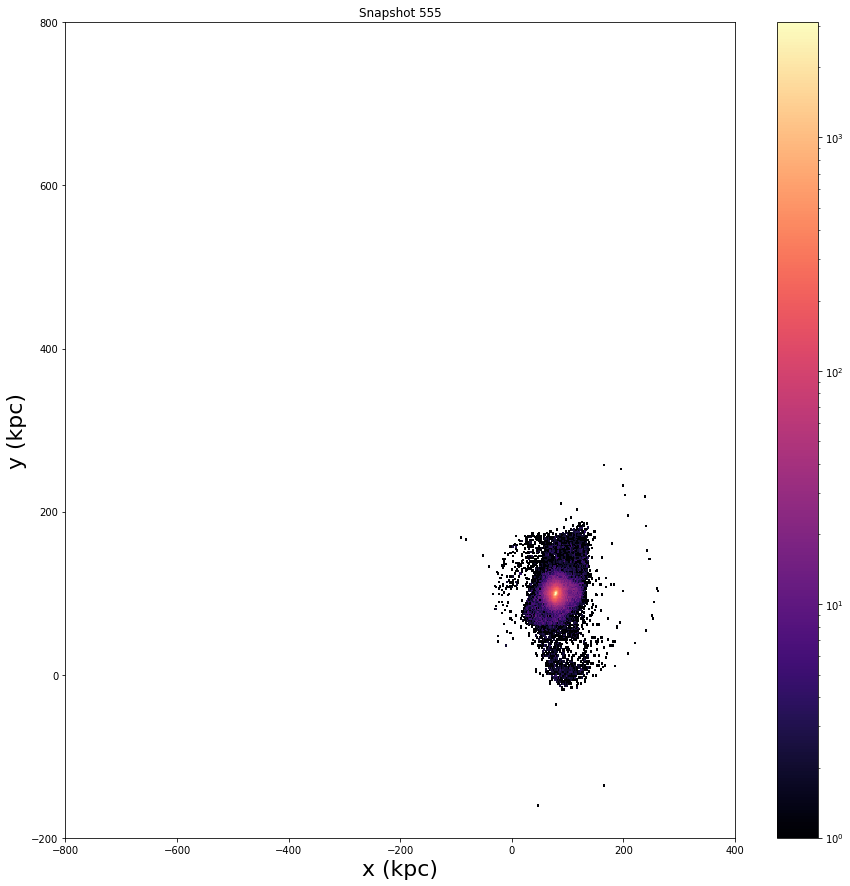

000560


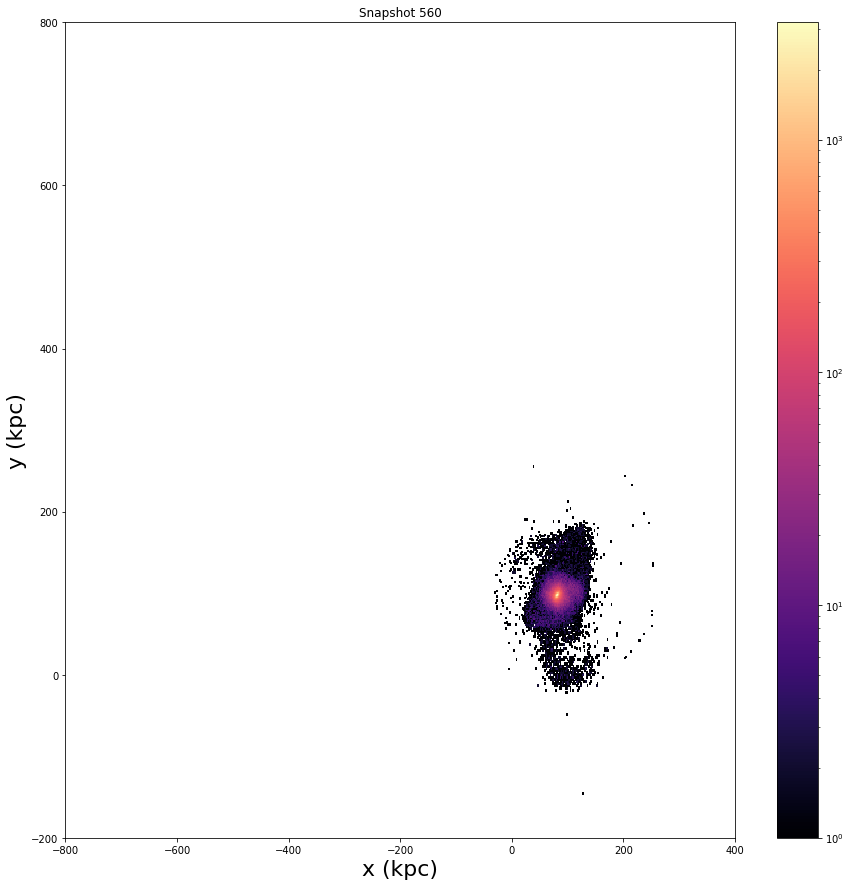

000565


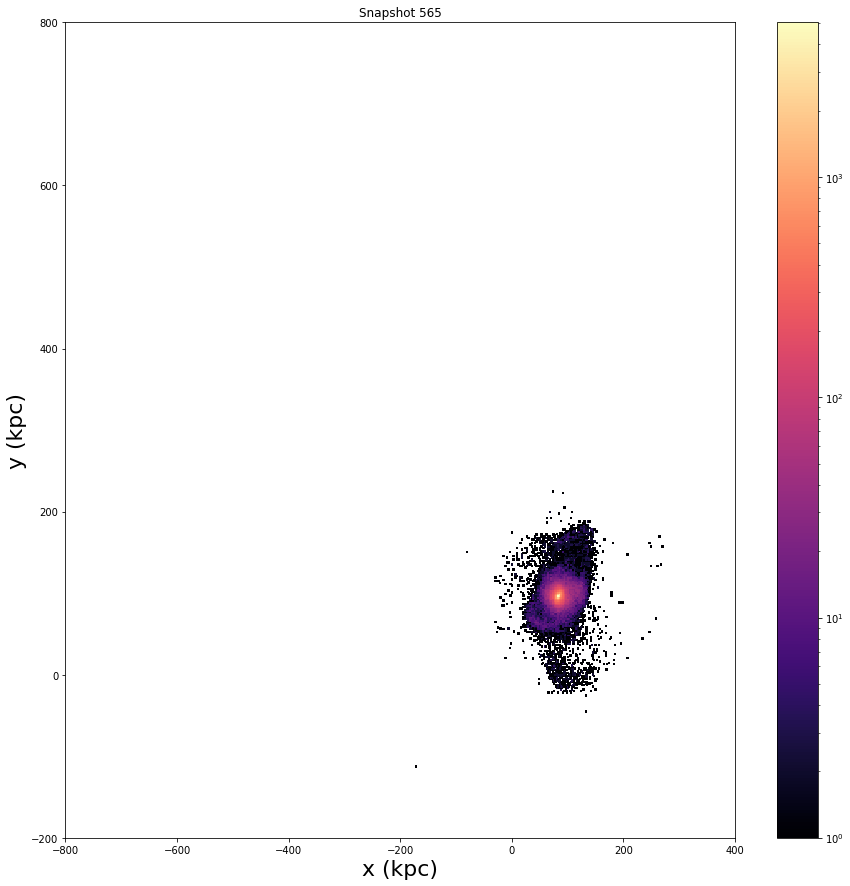

000570


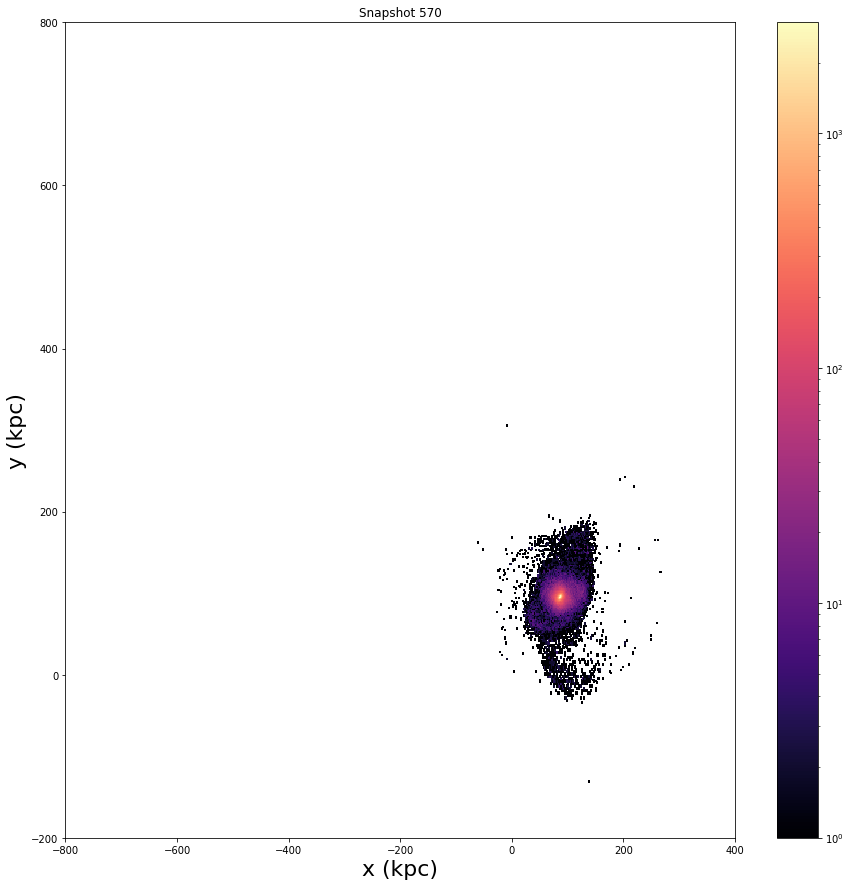

000575


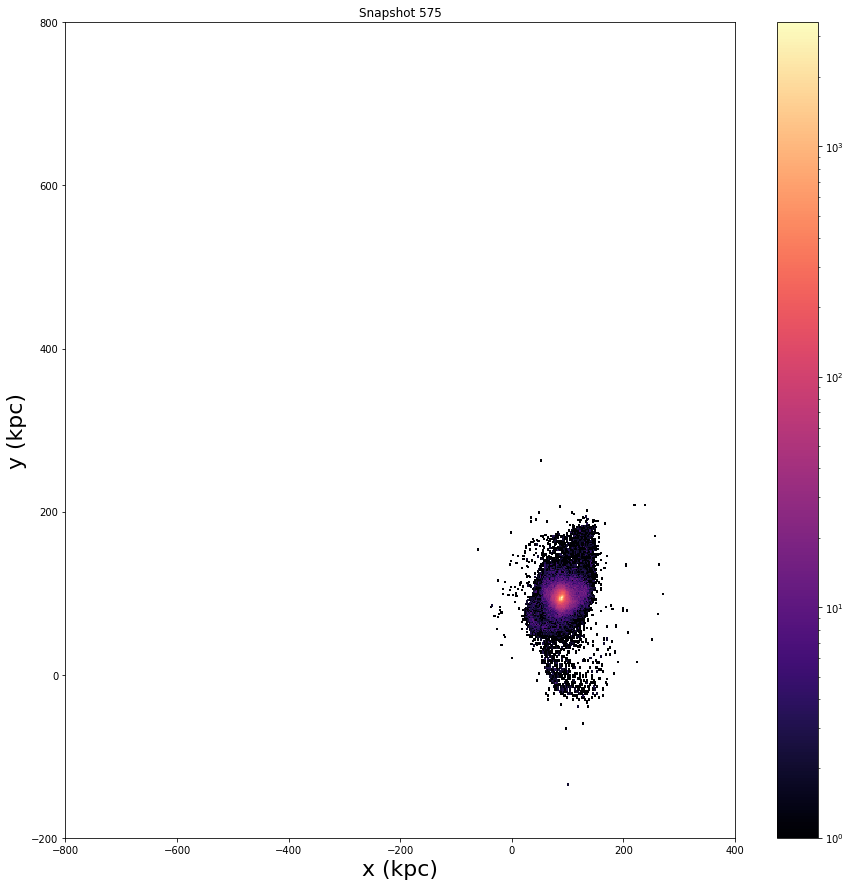

000580


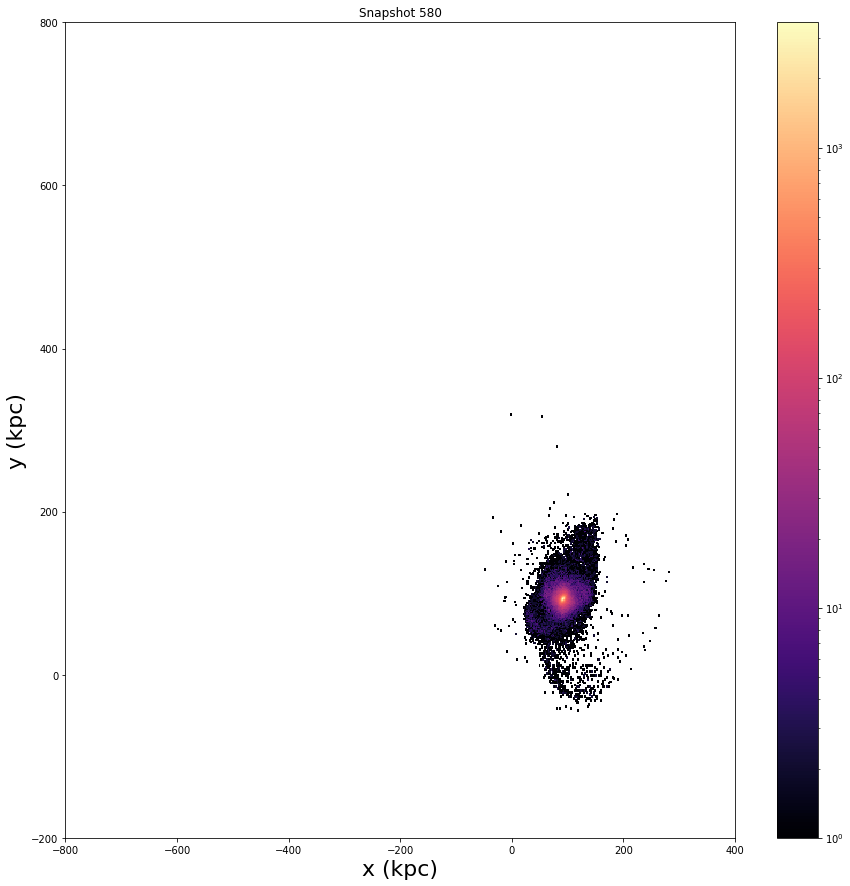

000585


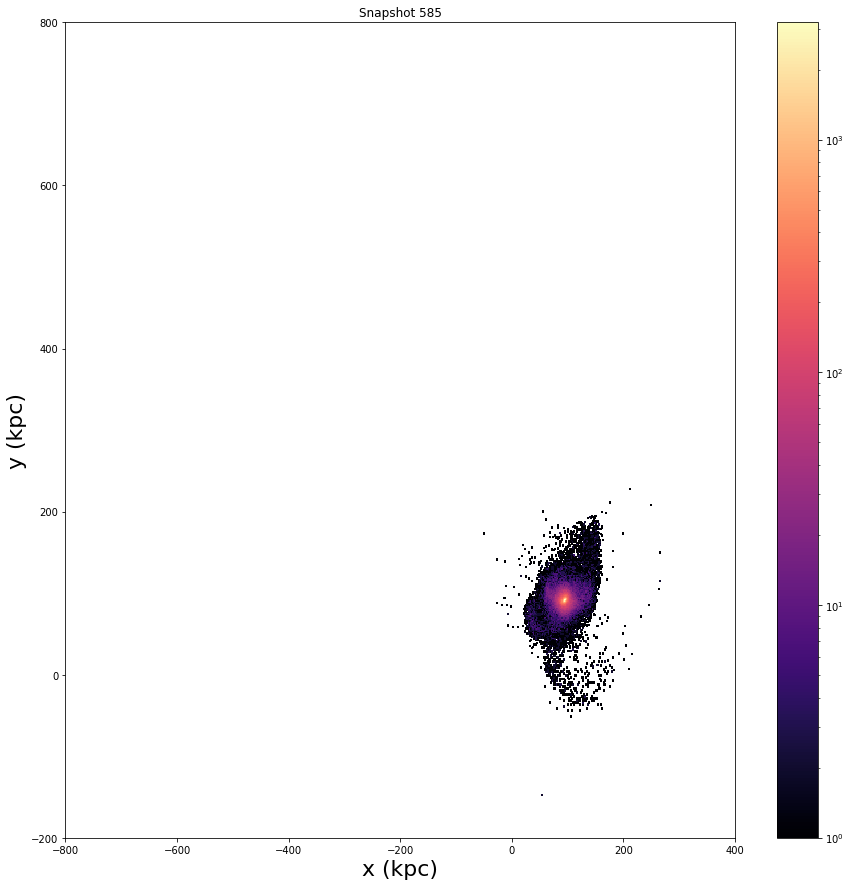

000590


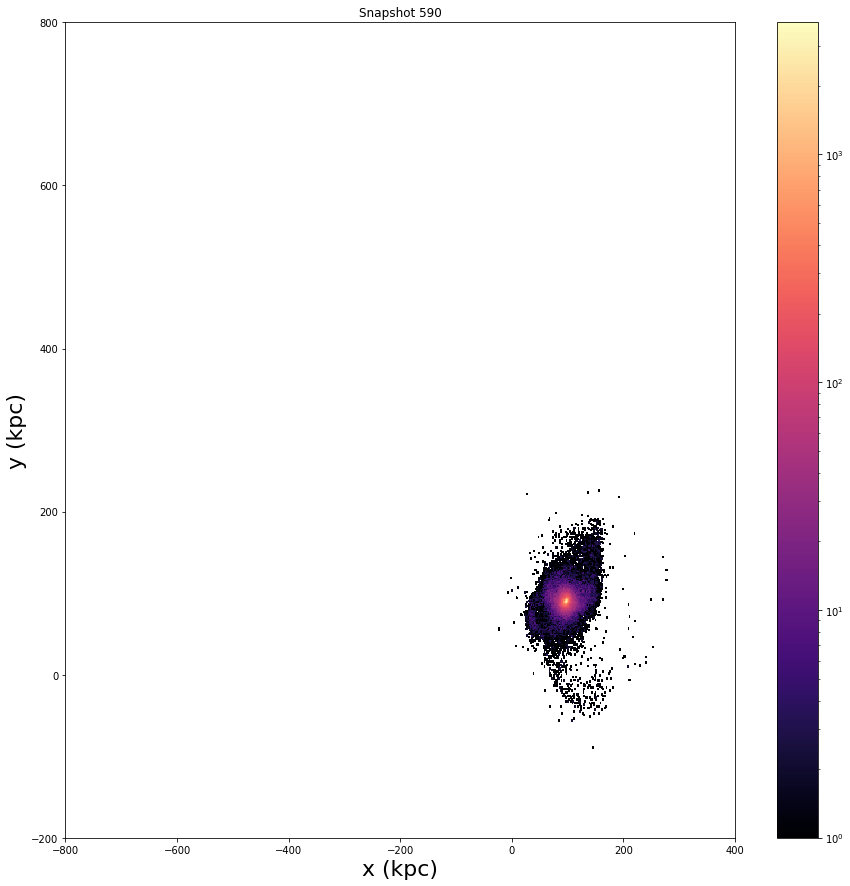

000595


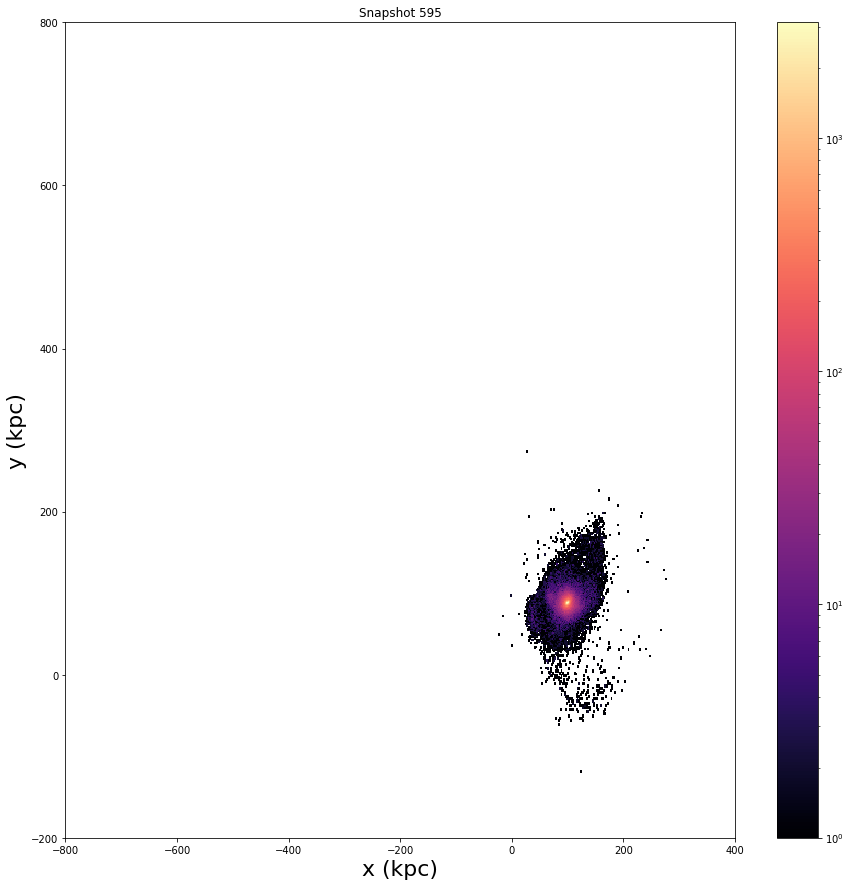

000600


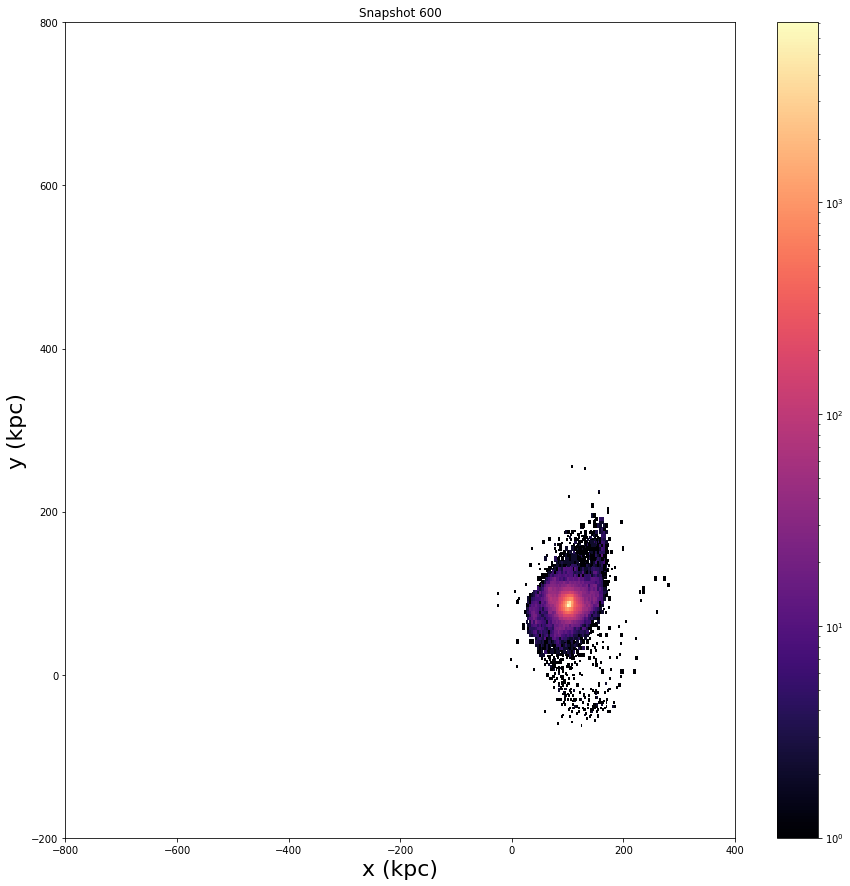

000605


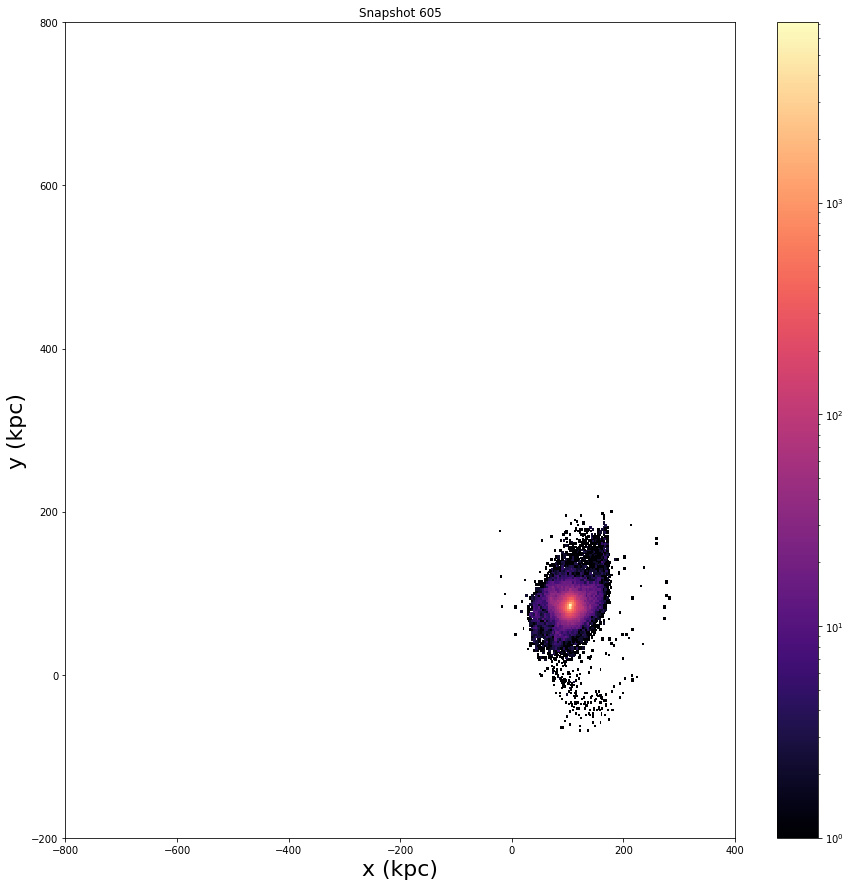

000610


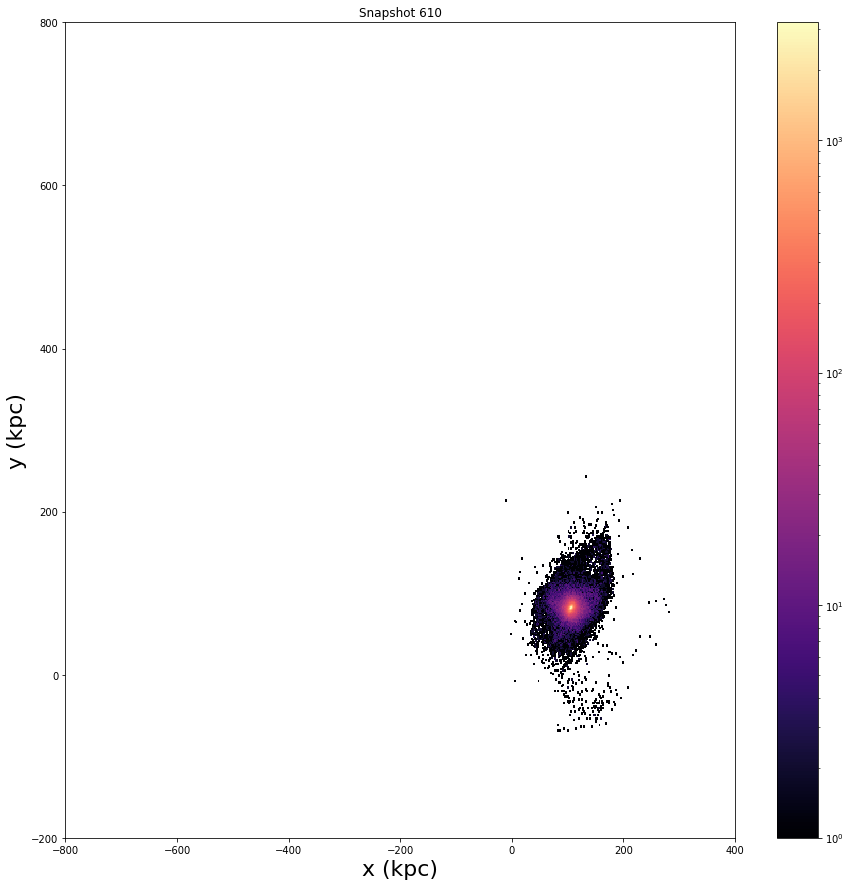

000615


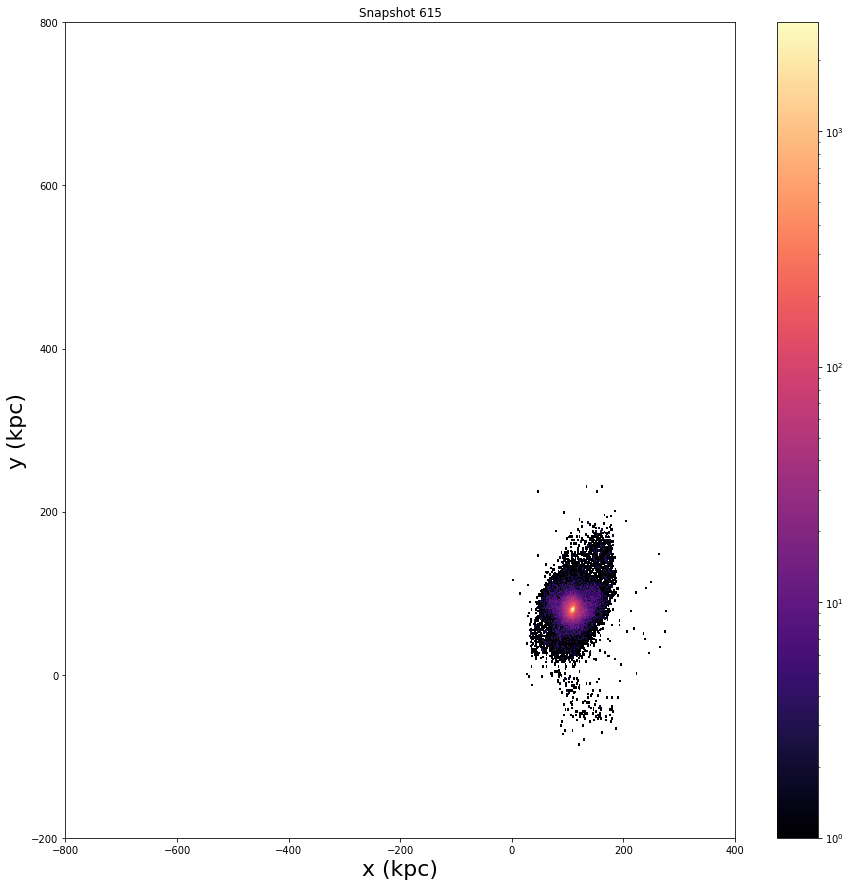

000620


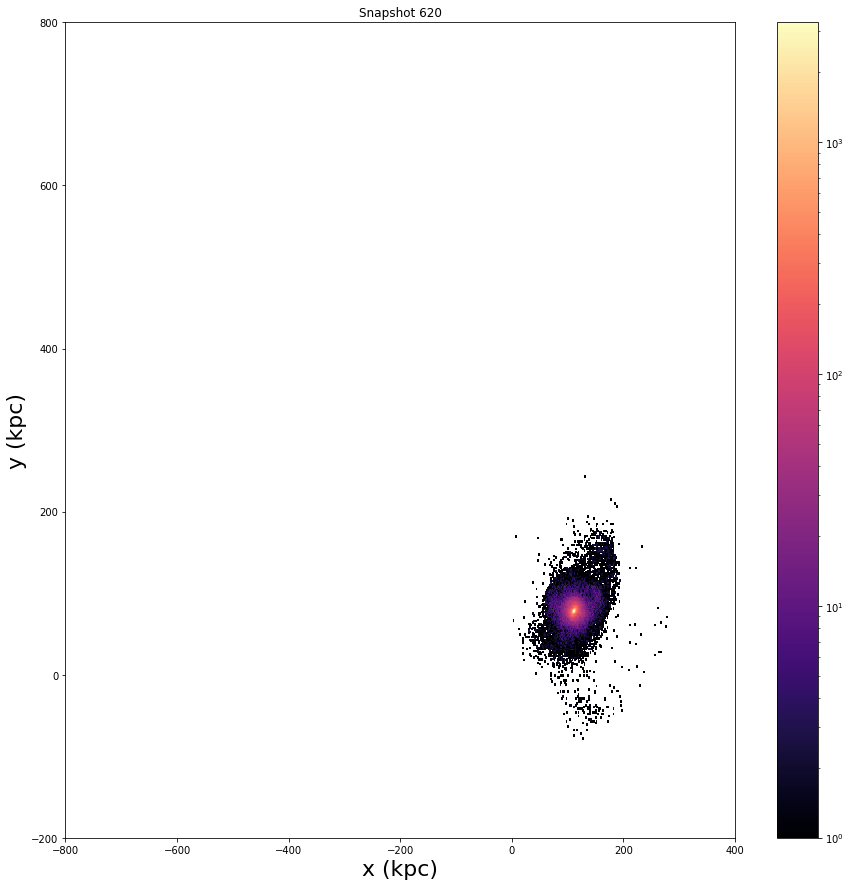

000625


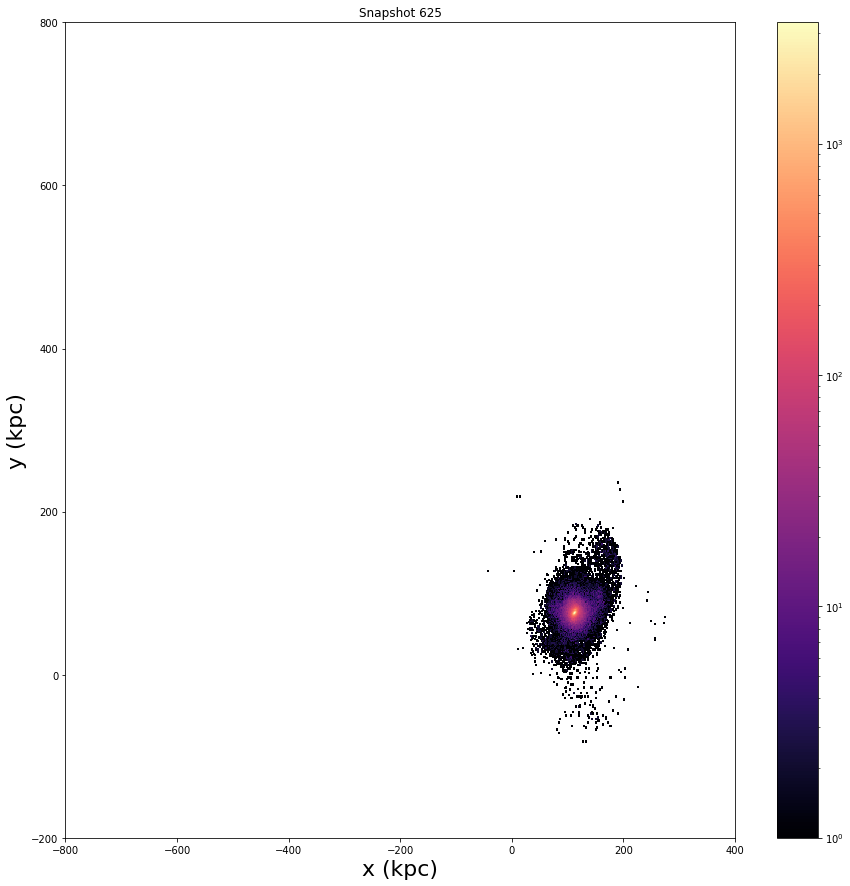

000630


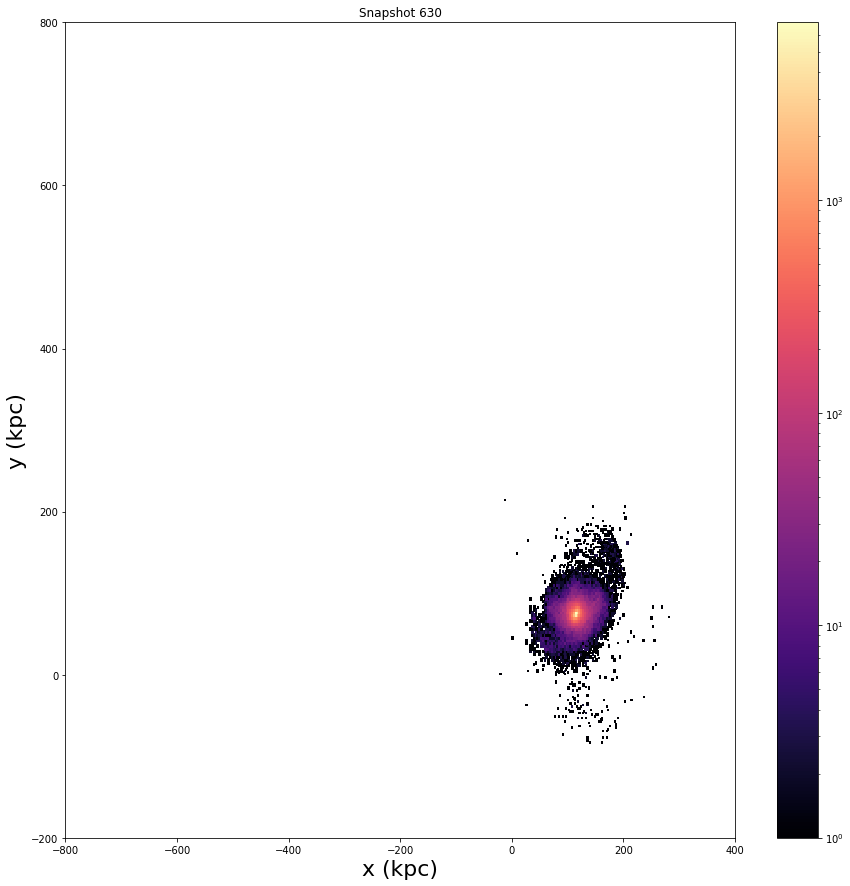

000635


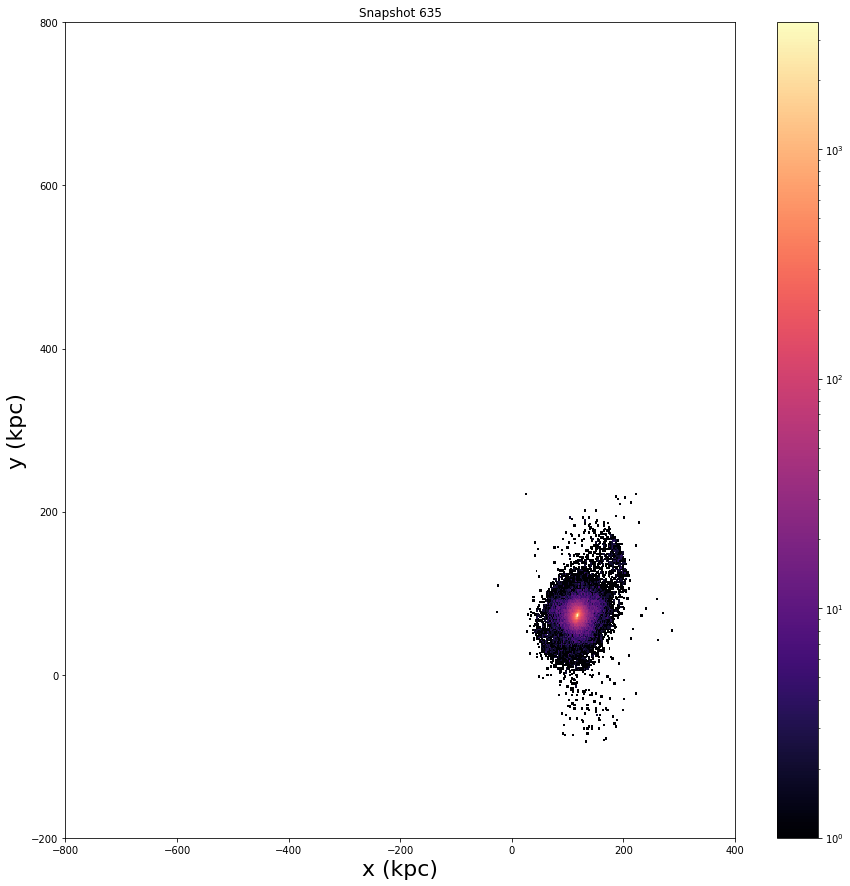

000640


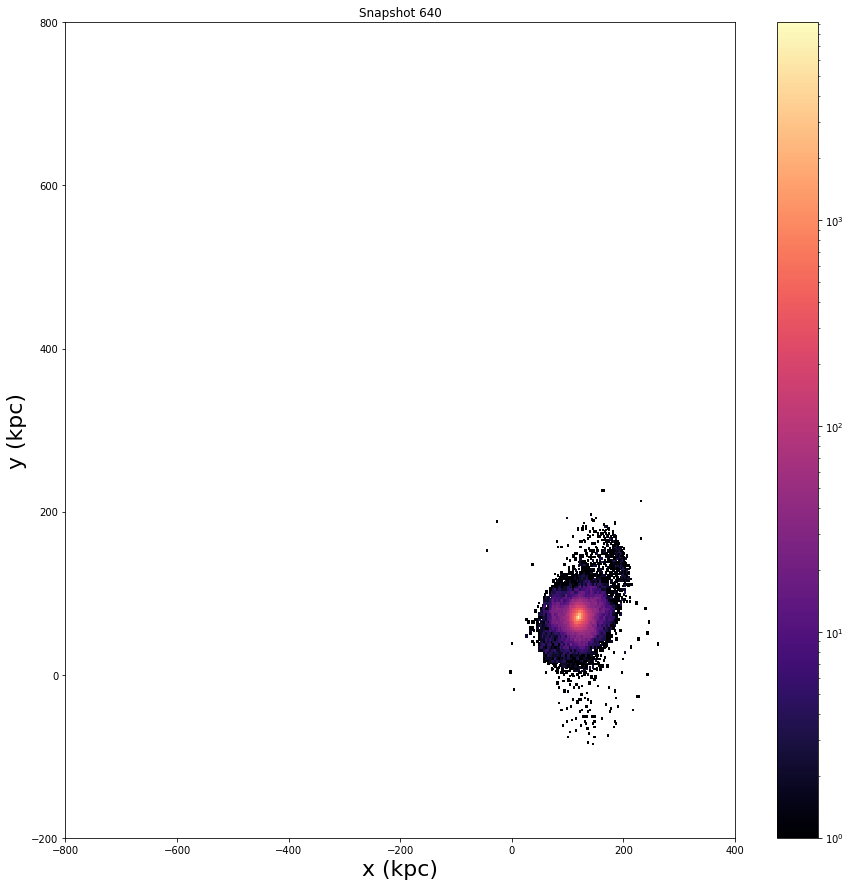

000645


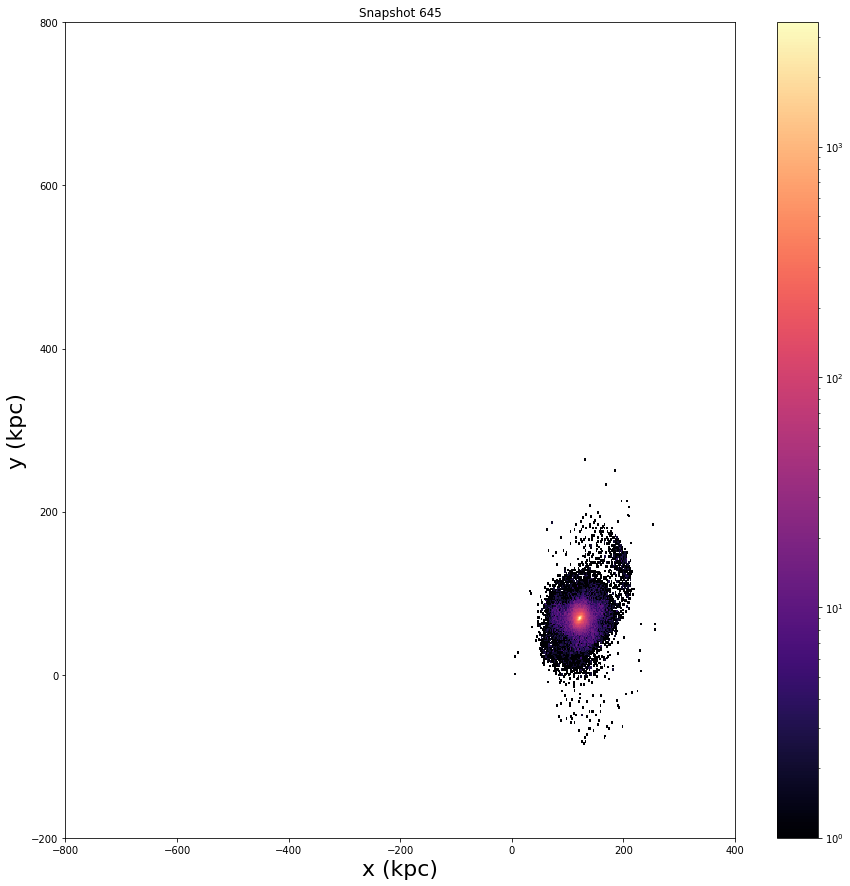

000650


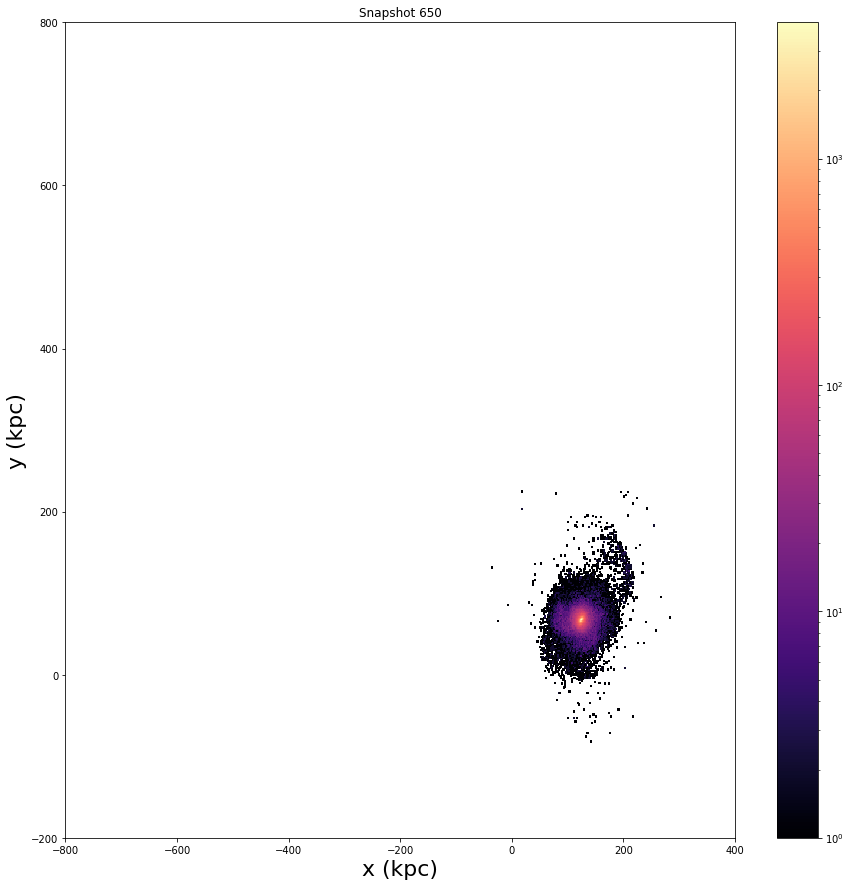

000655


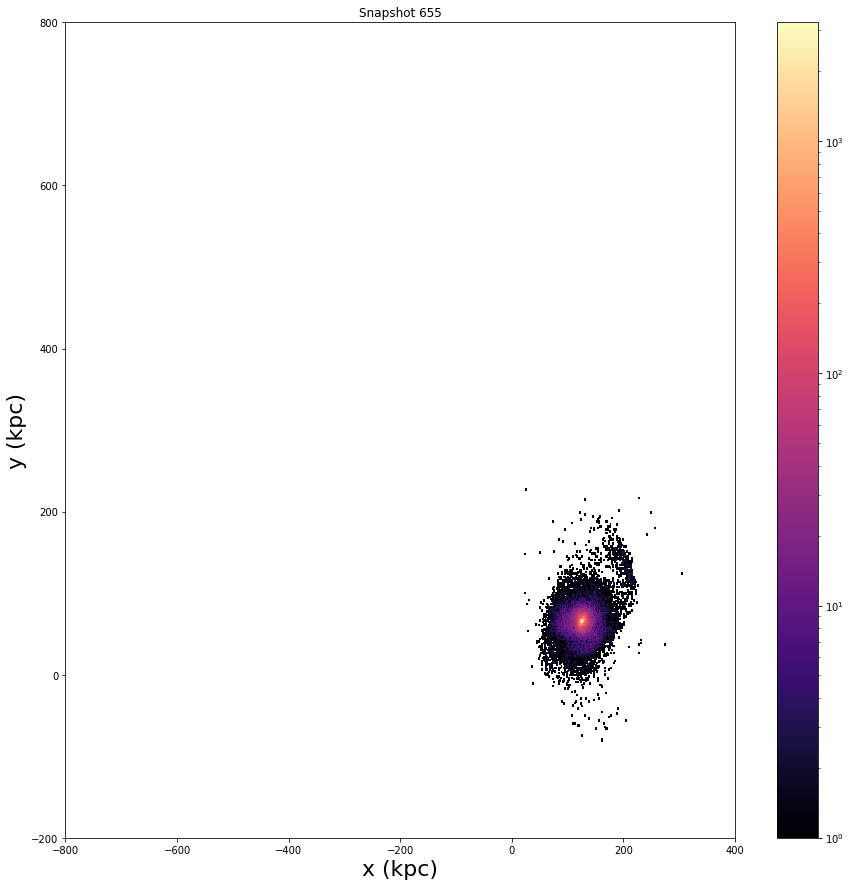

000660


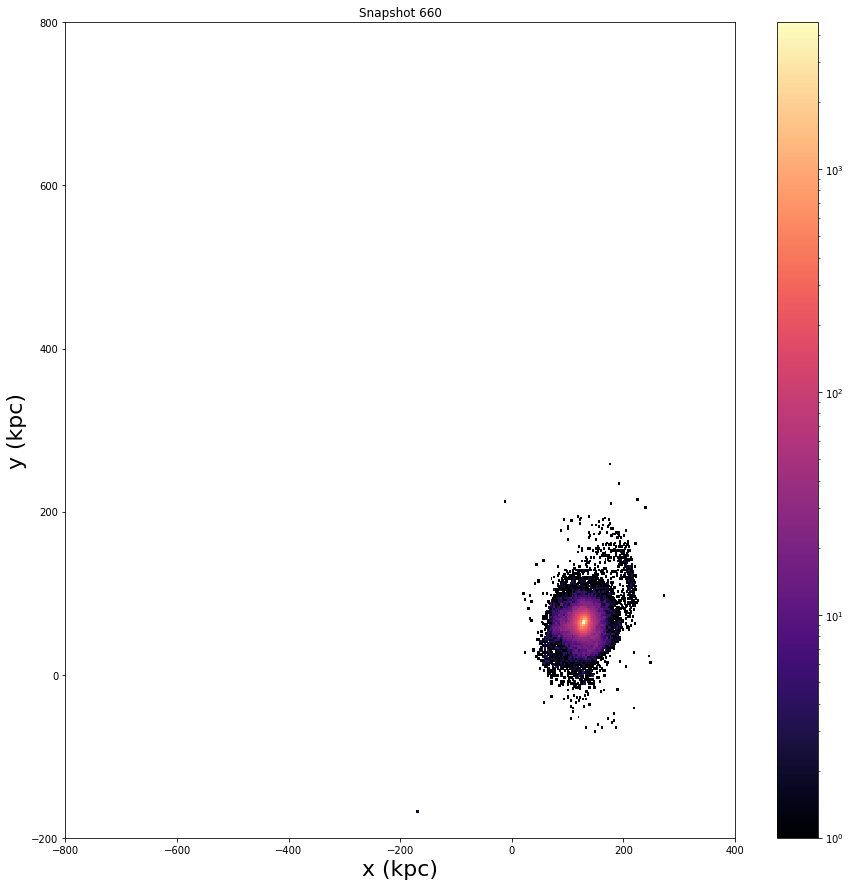

000665


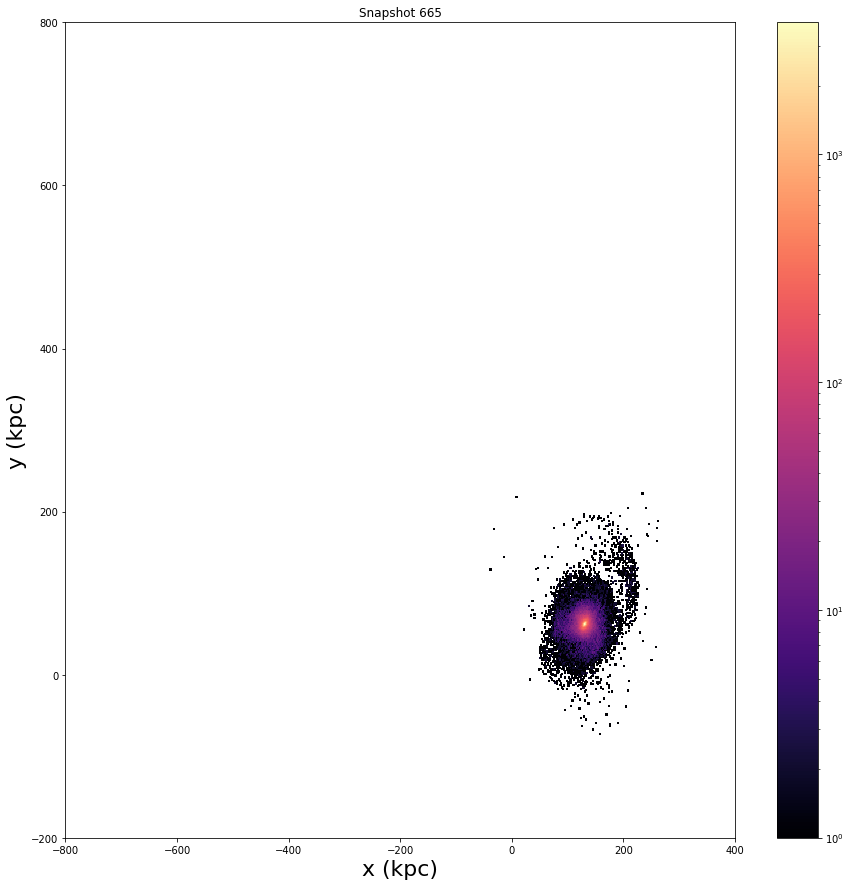

000670


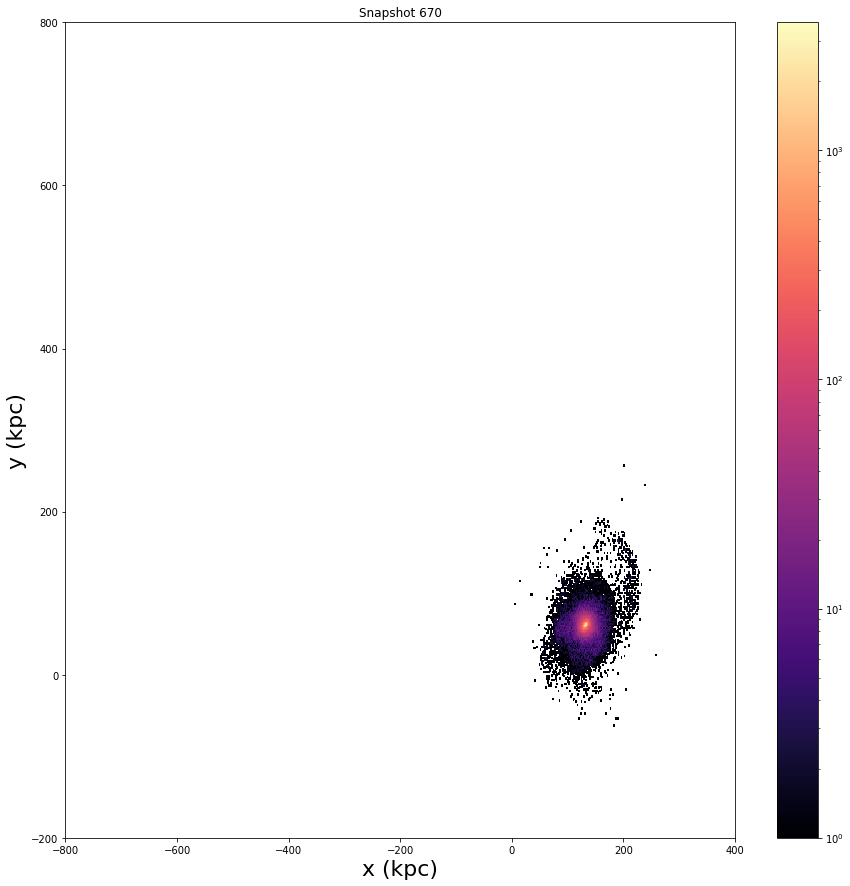

000675


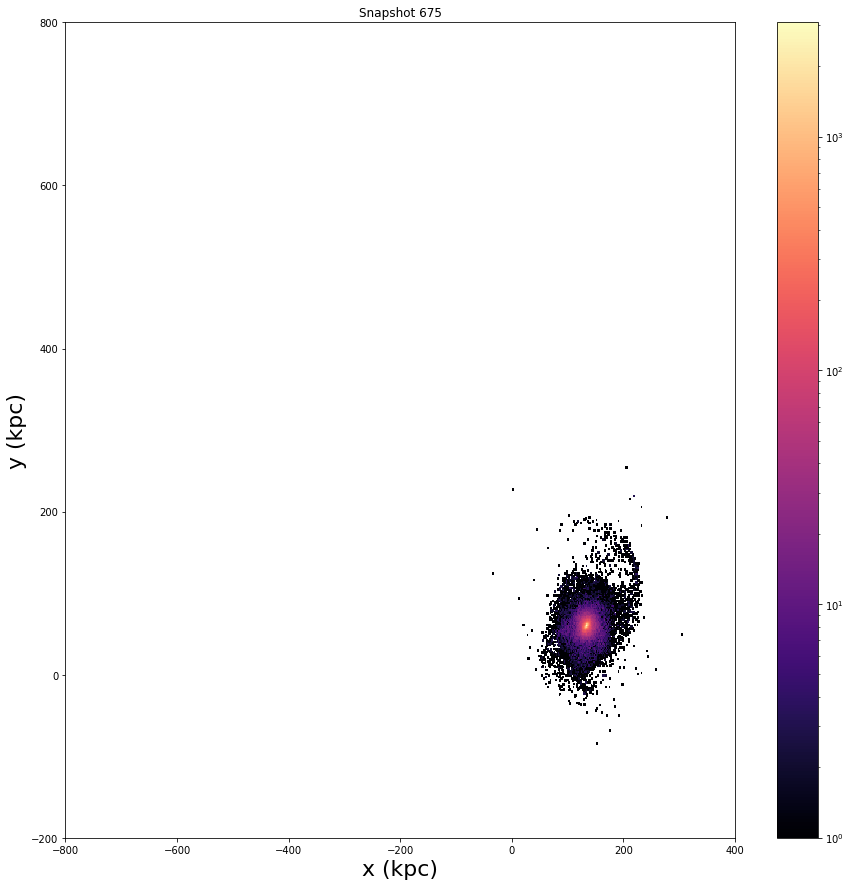

000680


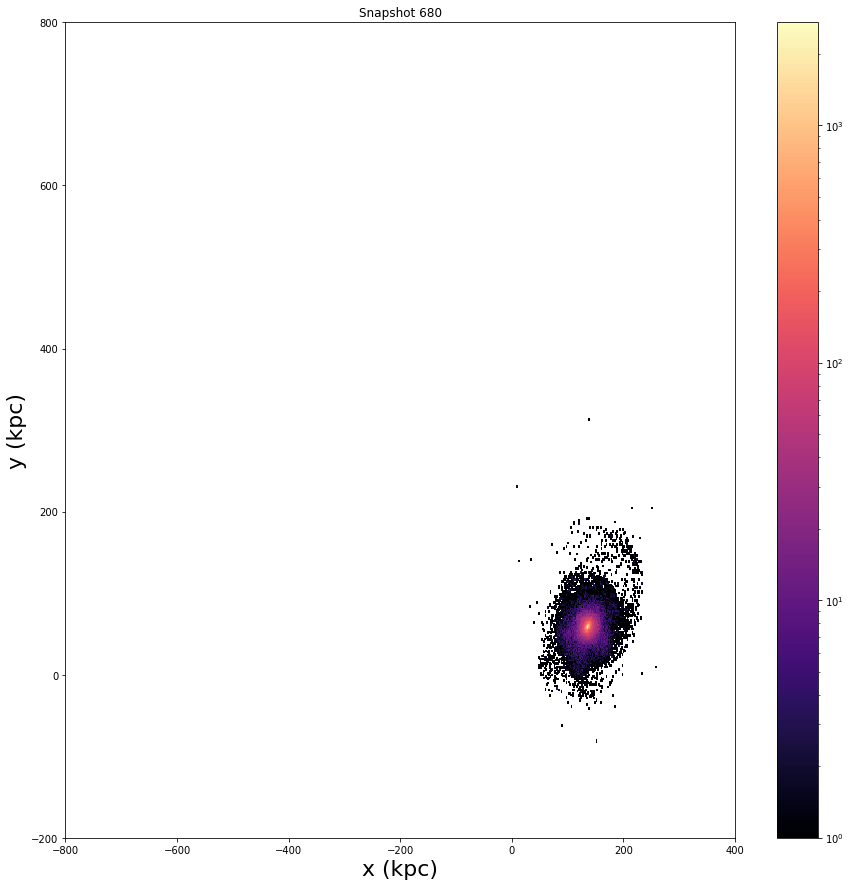

000685


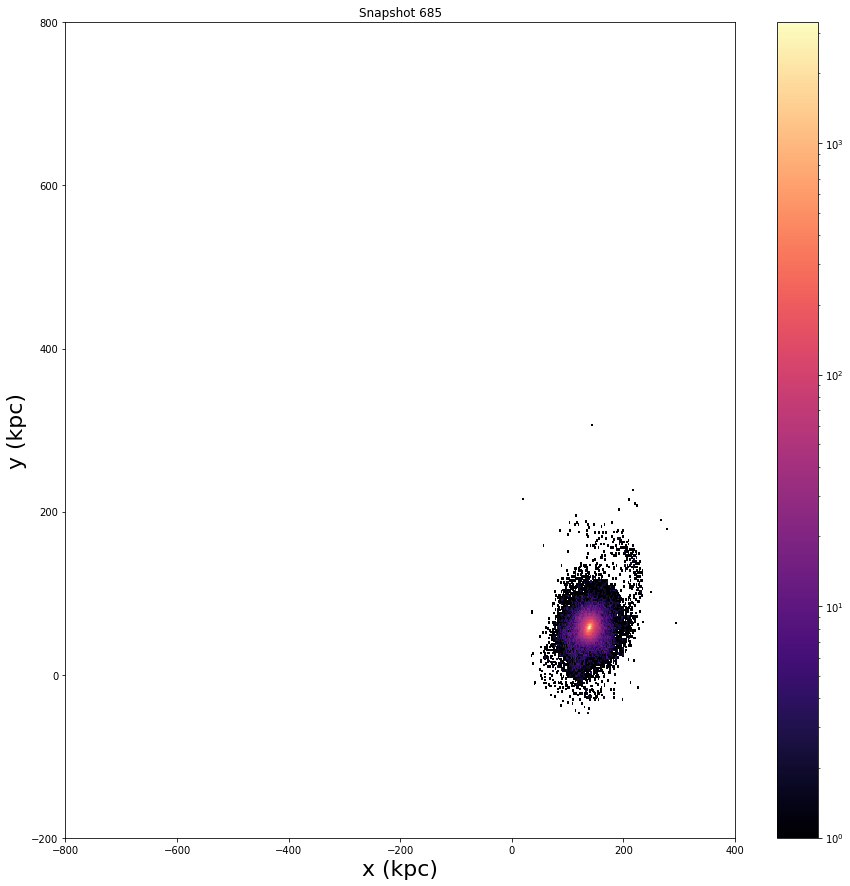

000690


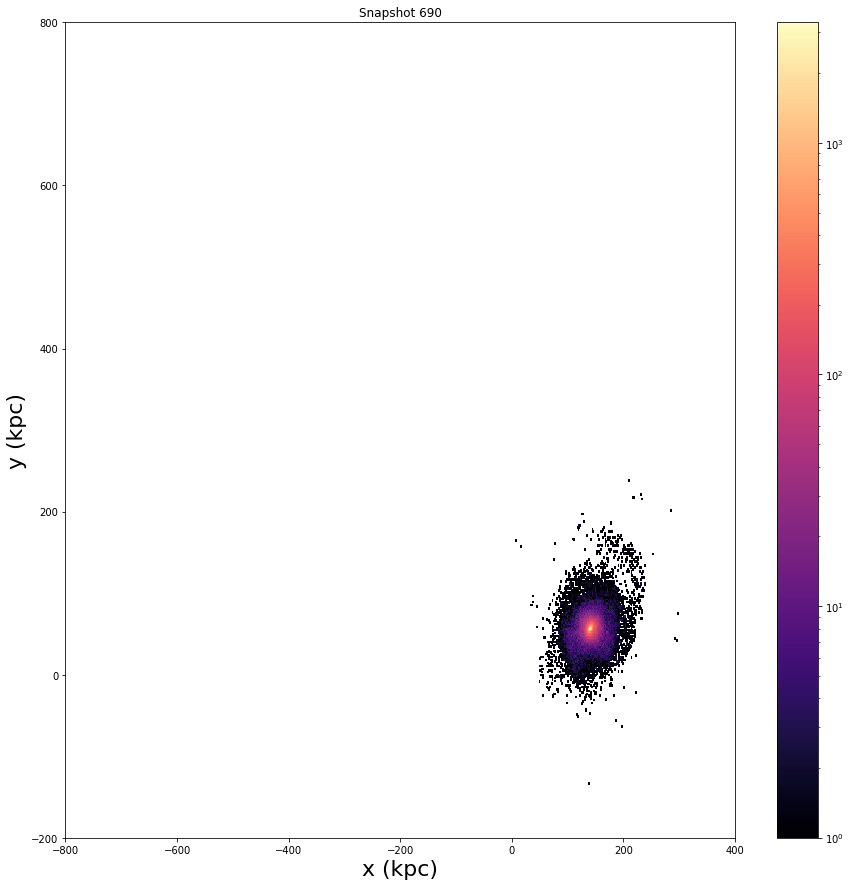

000695


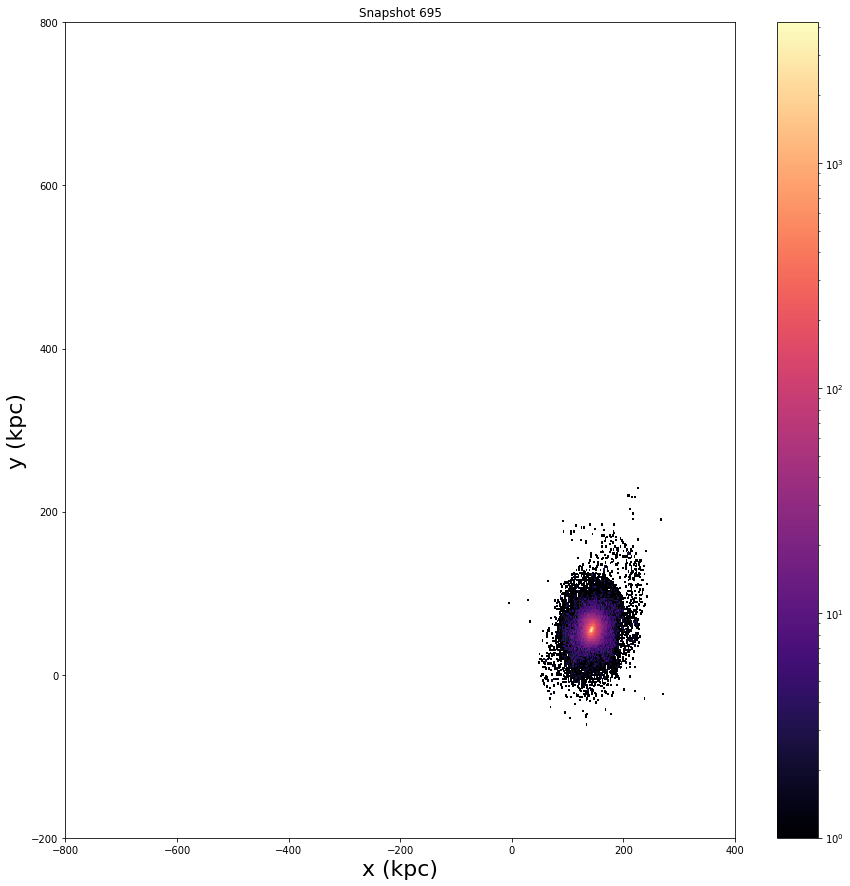

000700


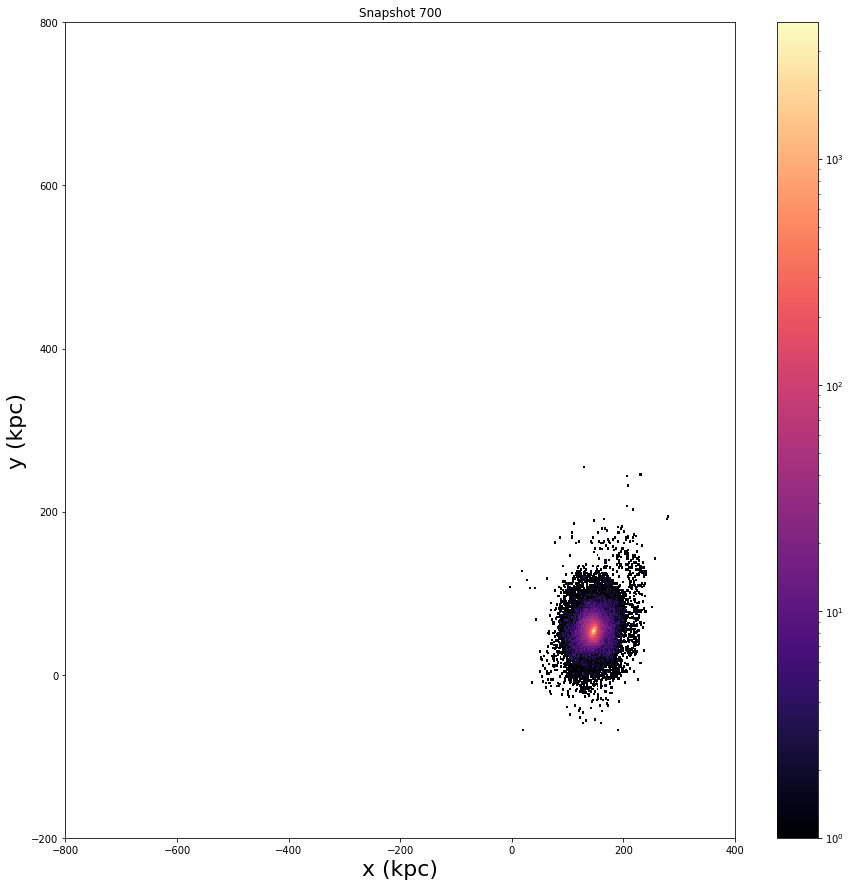

000705


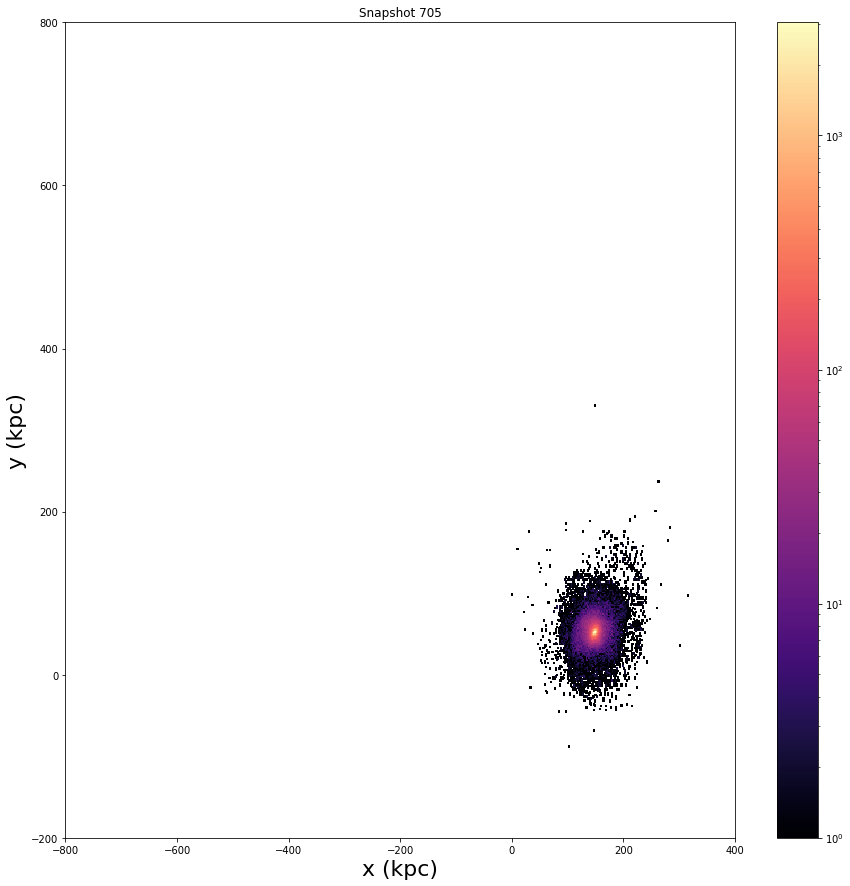

000710


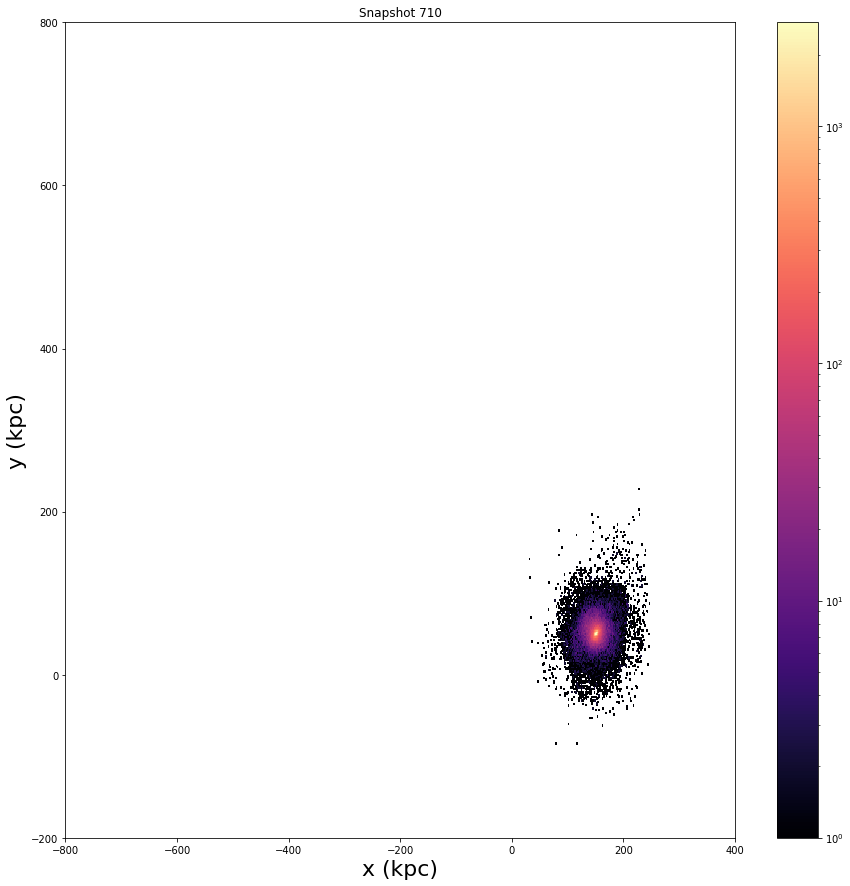

000715


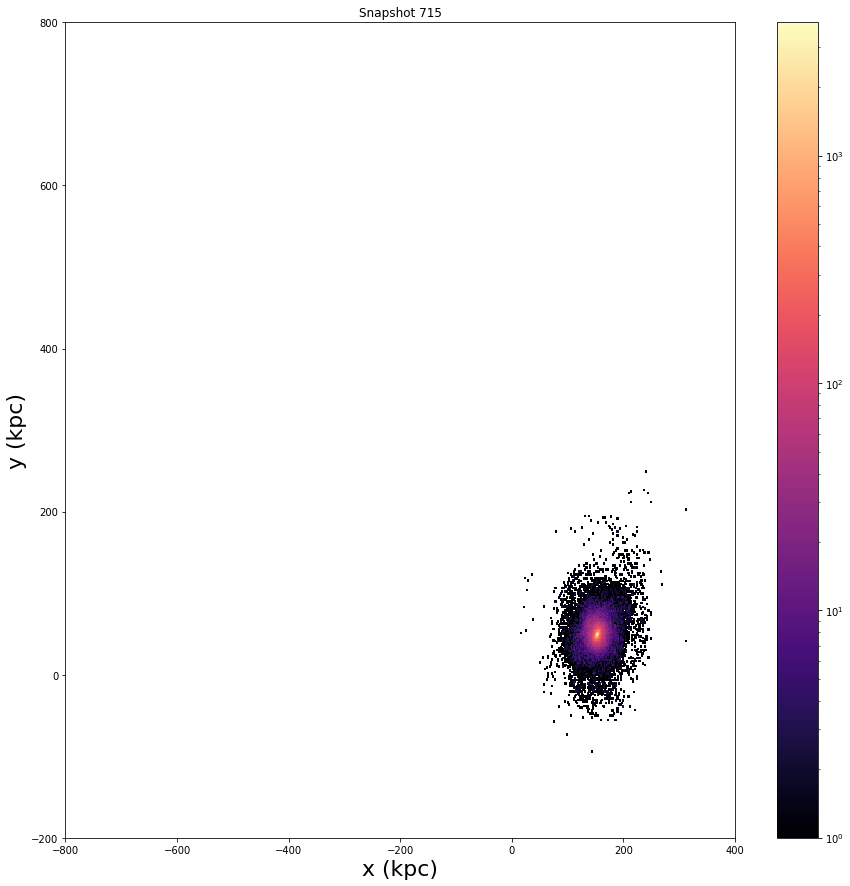

000720


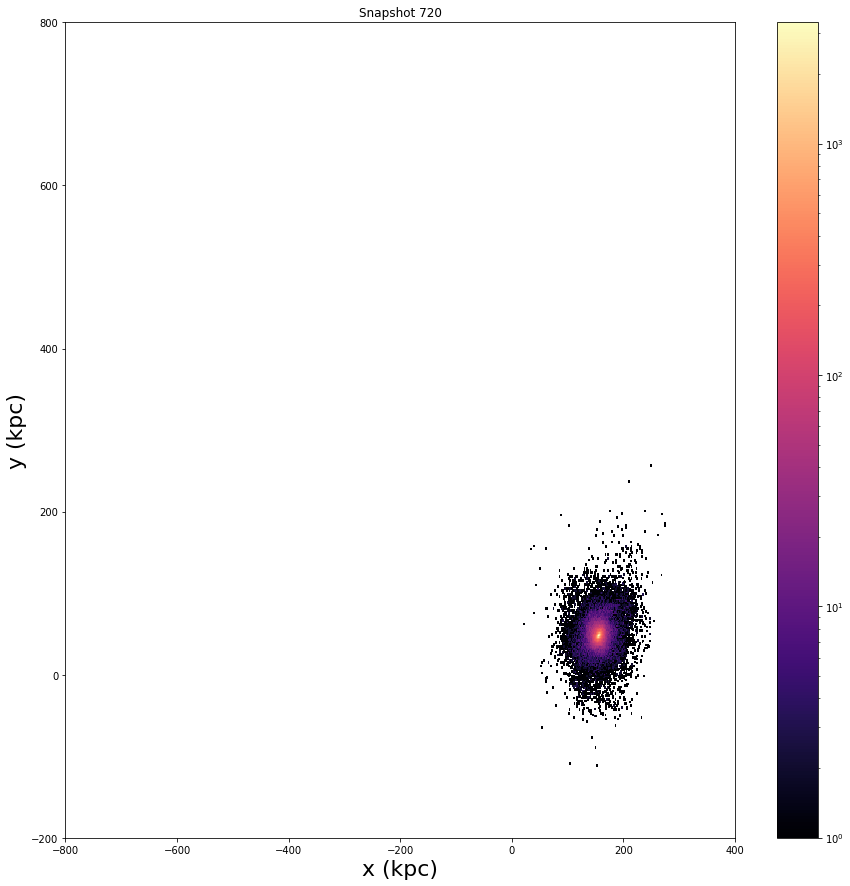

000725


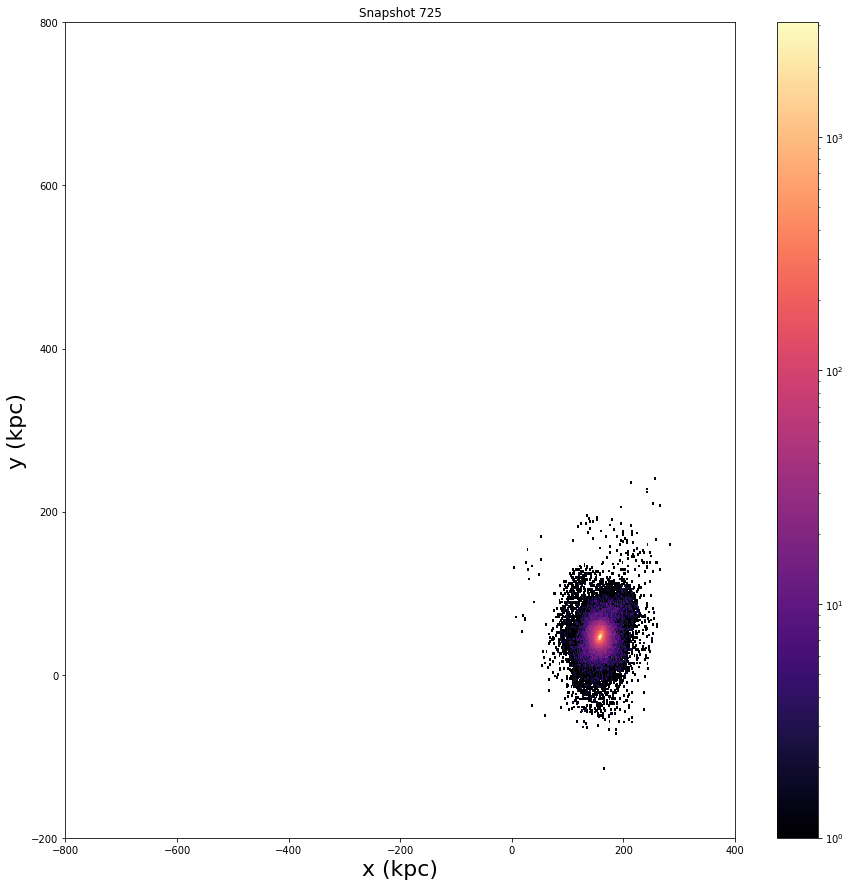

000730


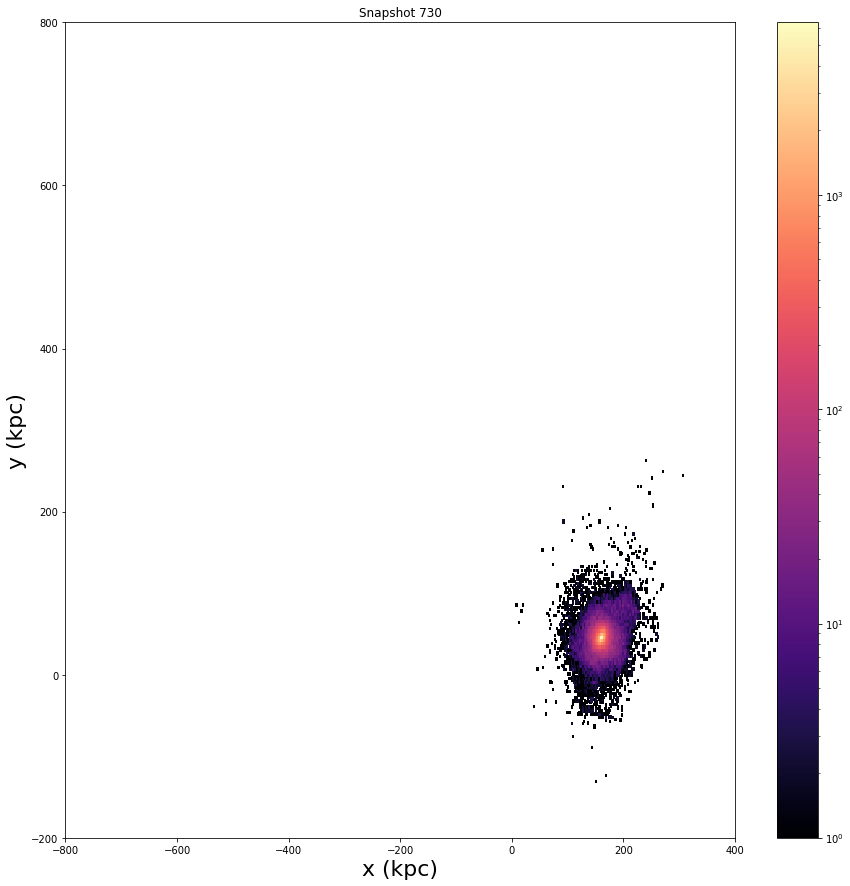

000735


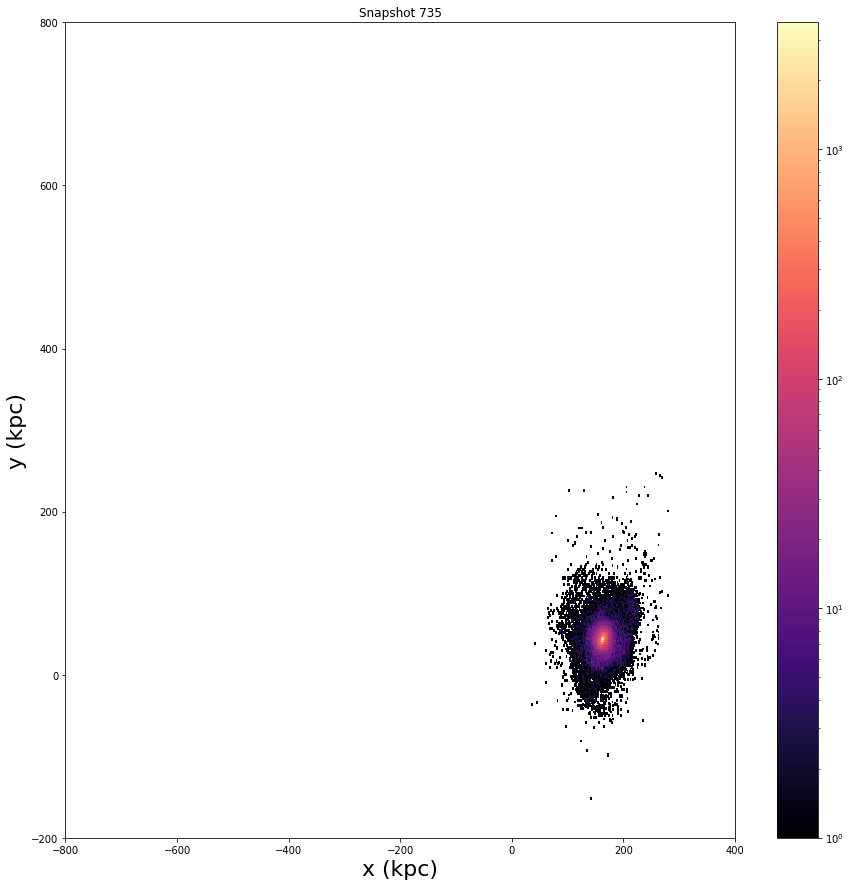

000740


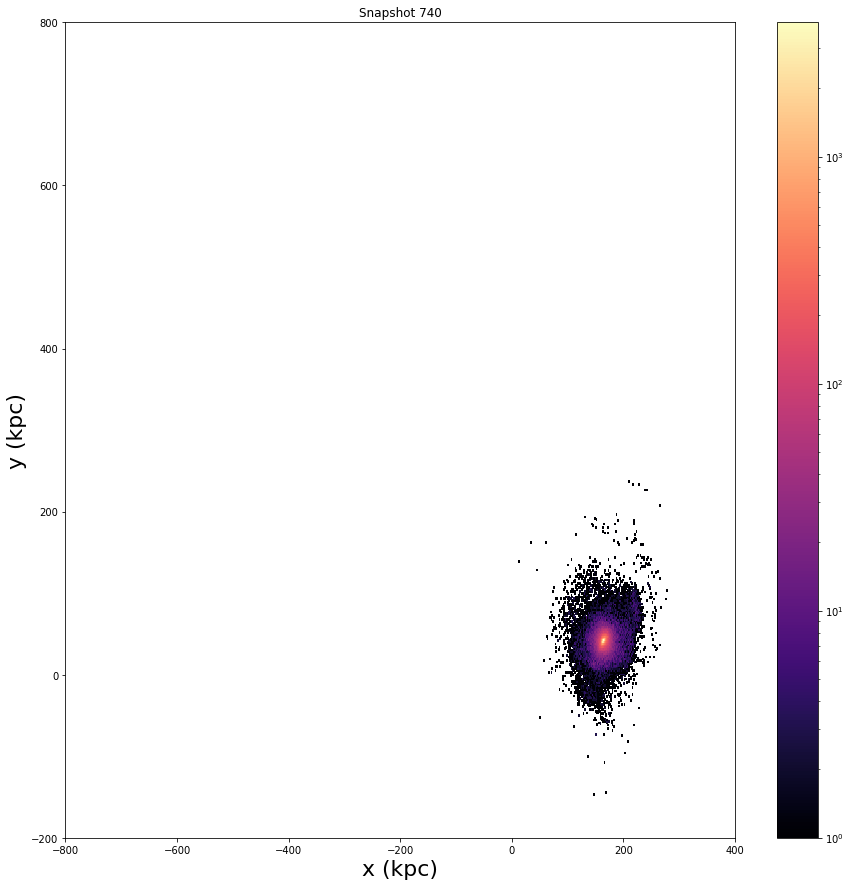

000745


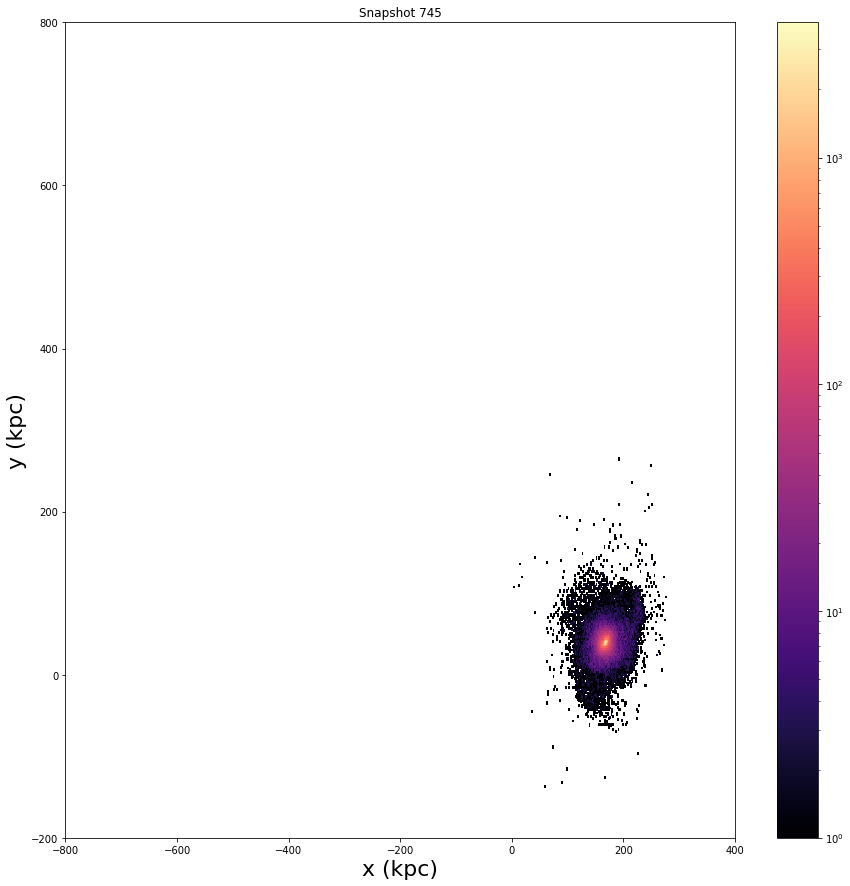

000750


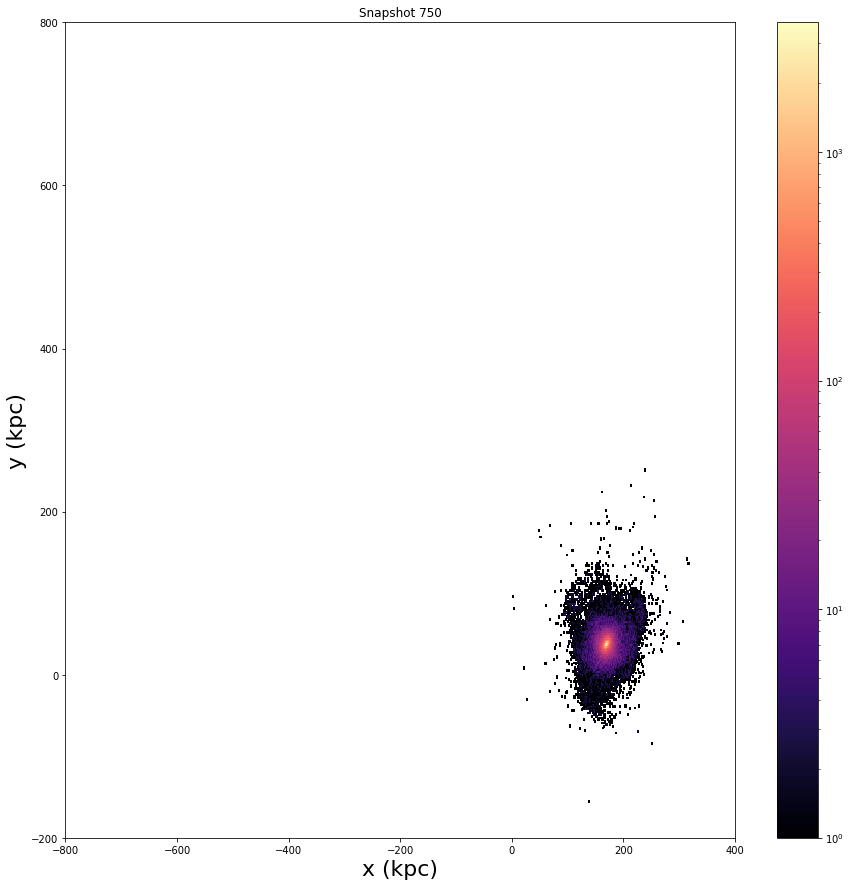

000755


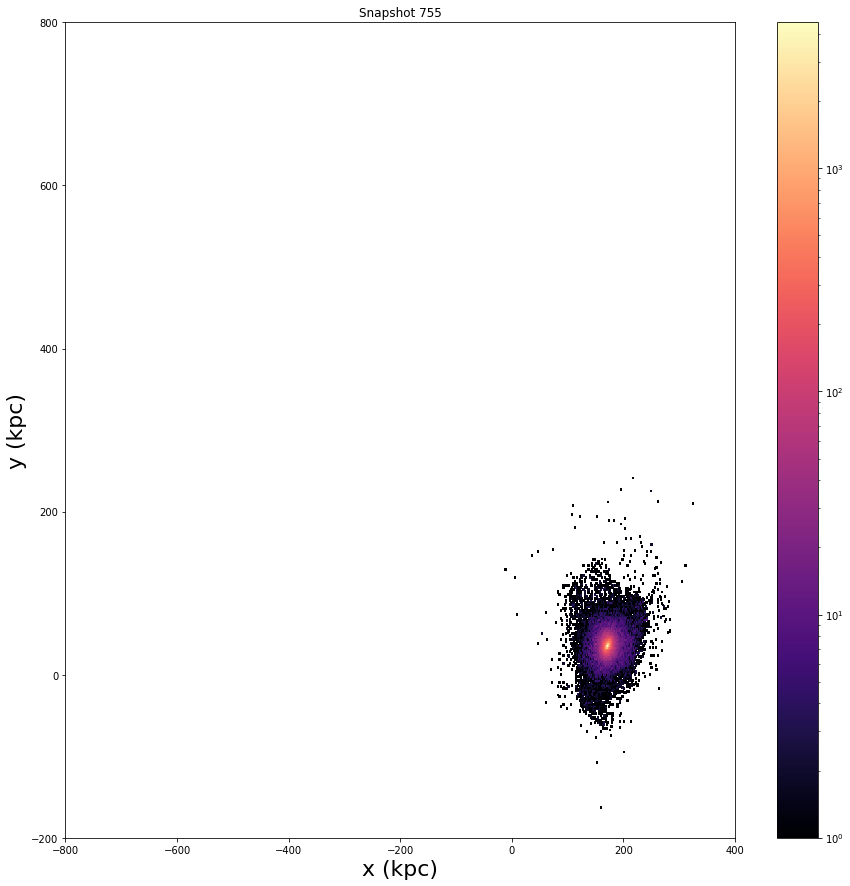

000760


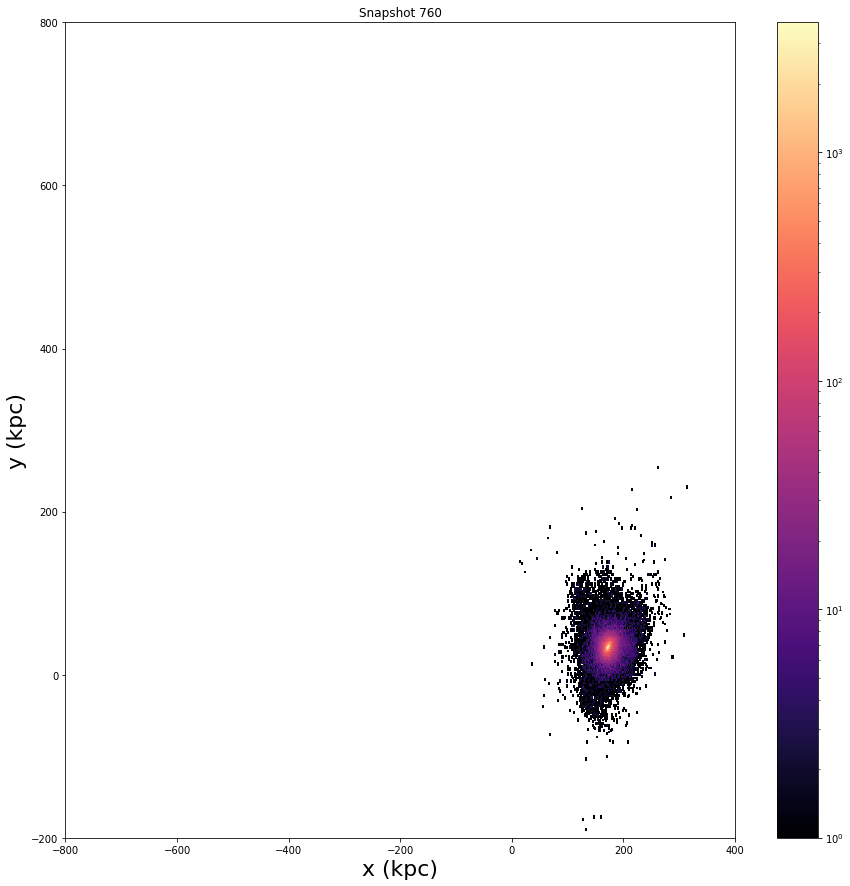

000765


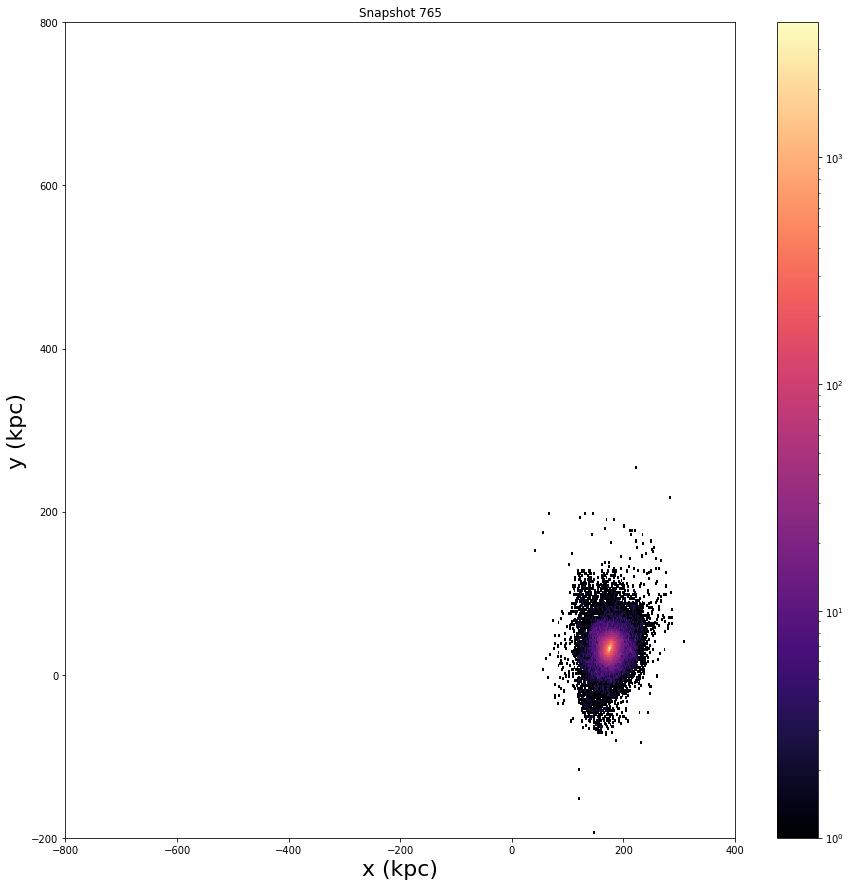

000770


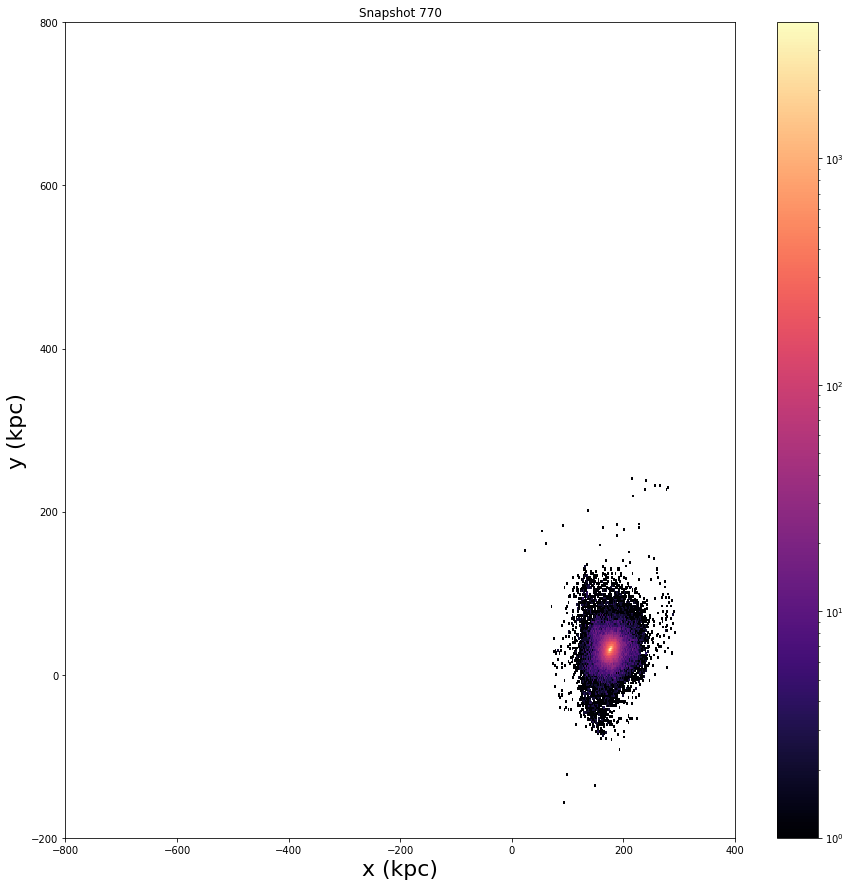

000775


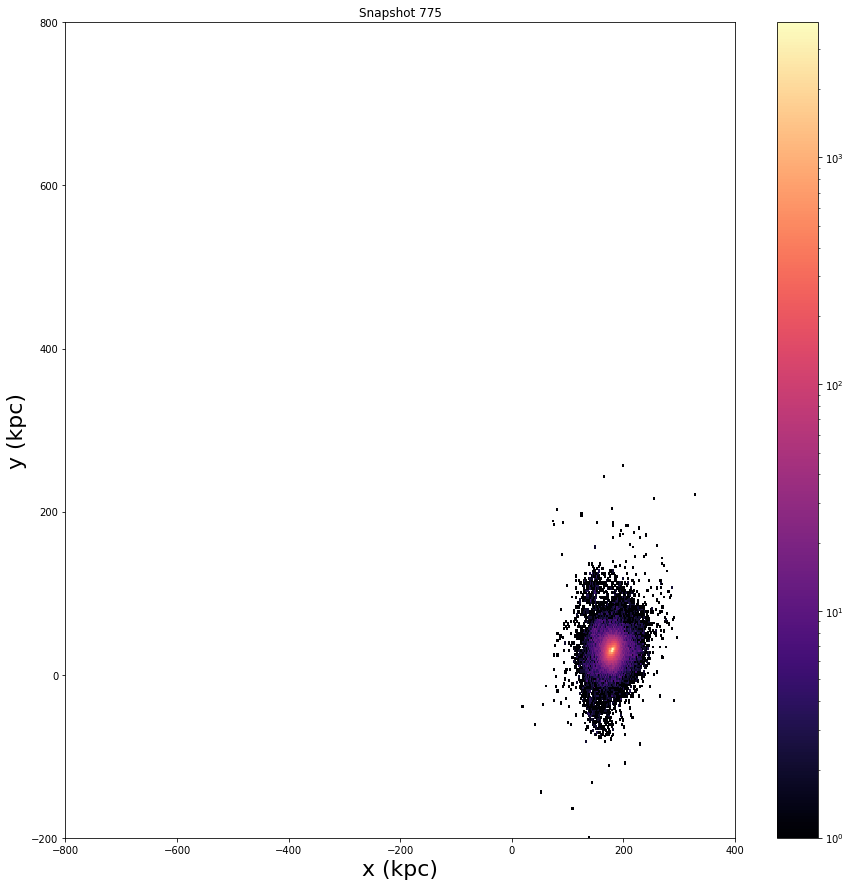

000780


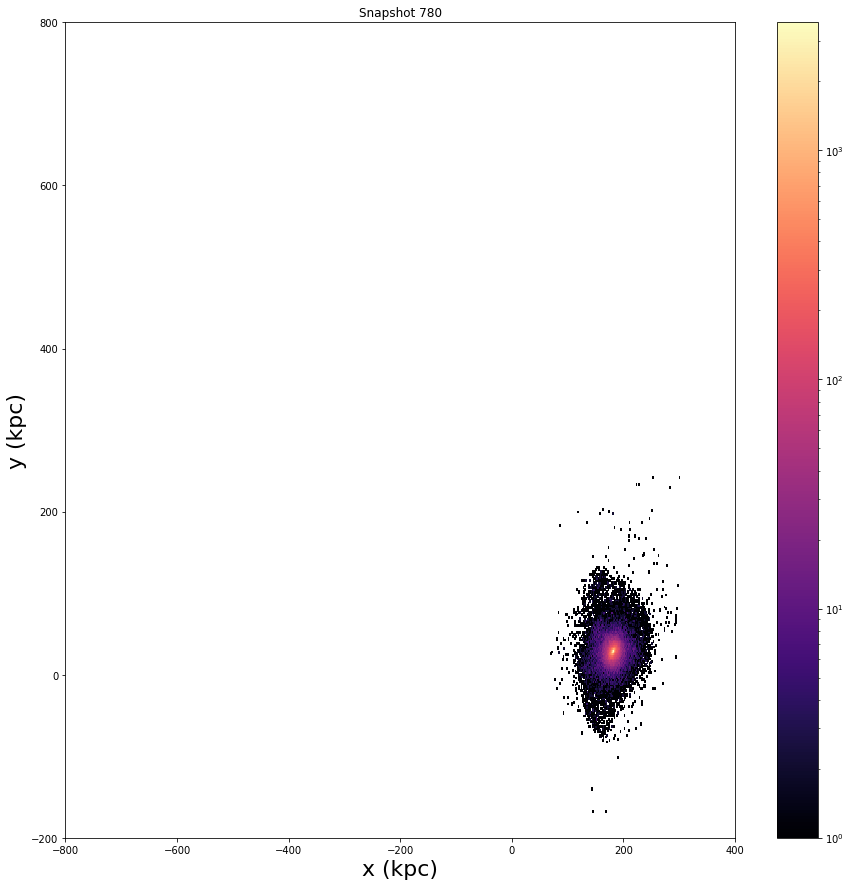

000785


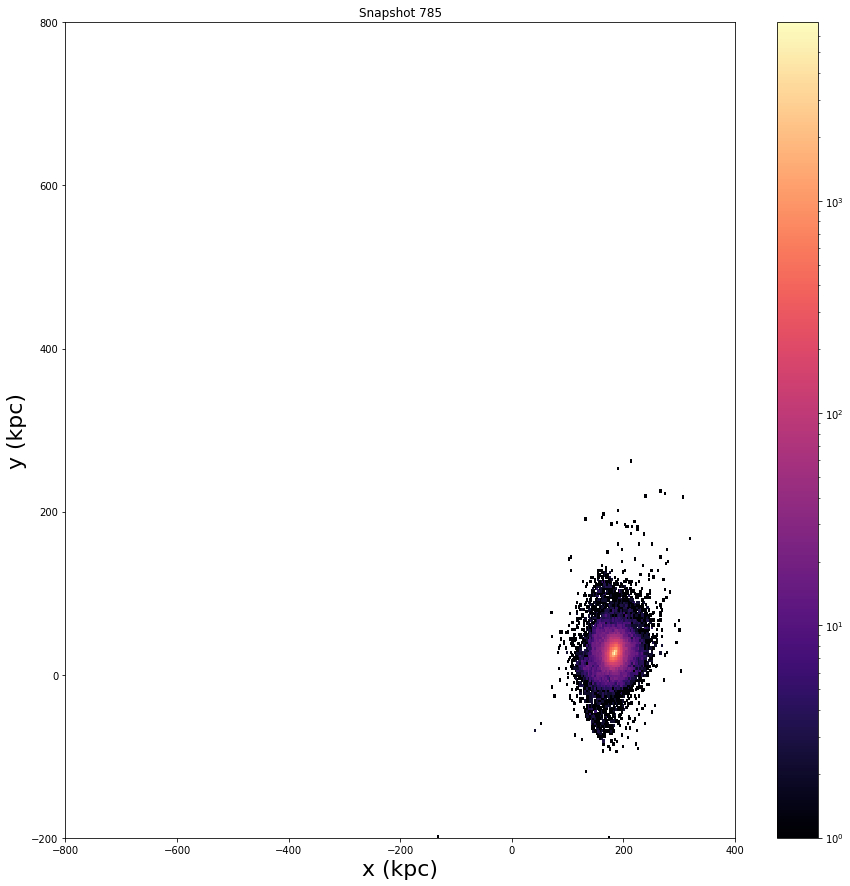

000790


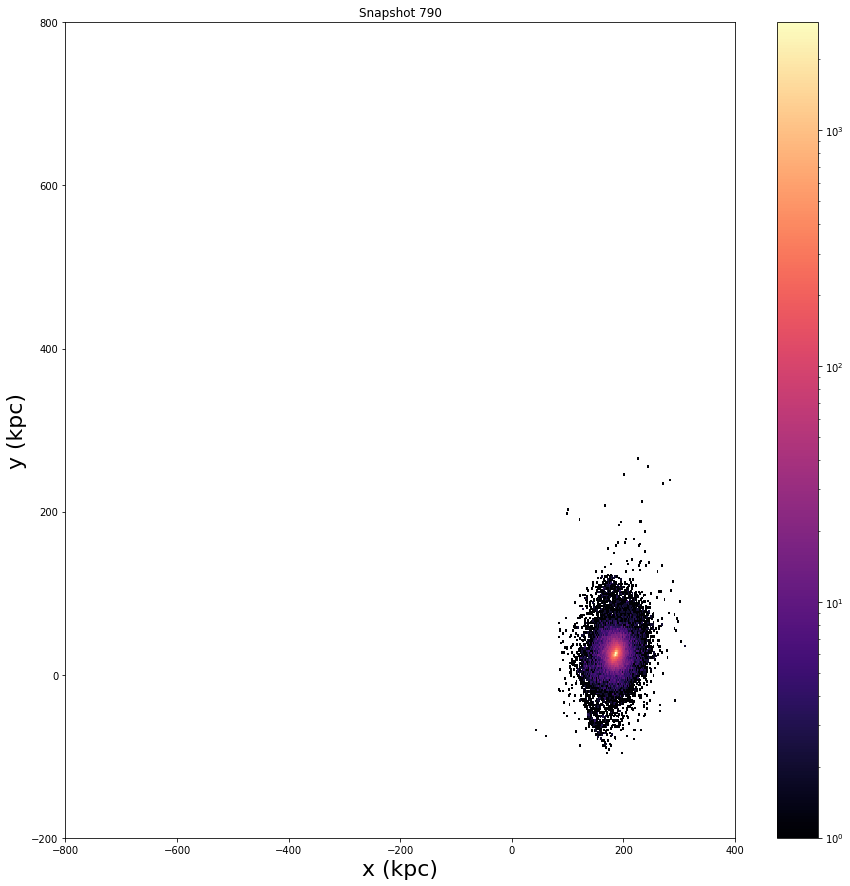

000795


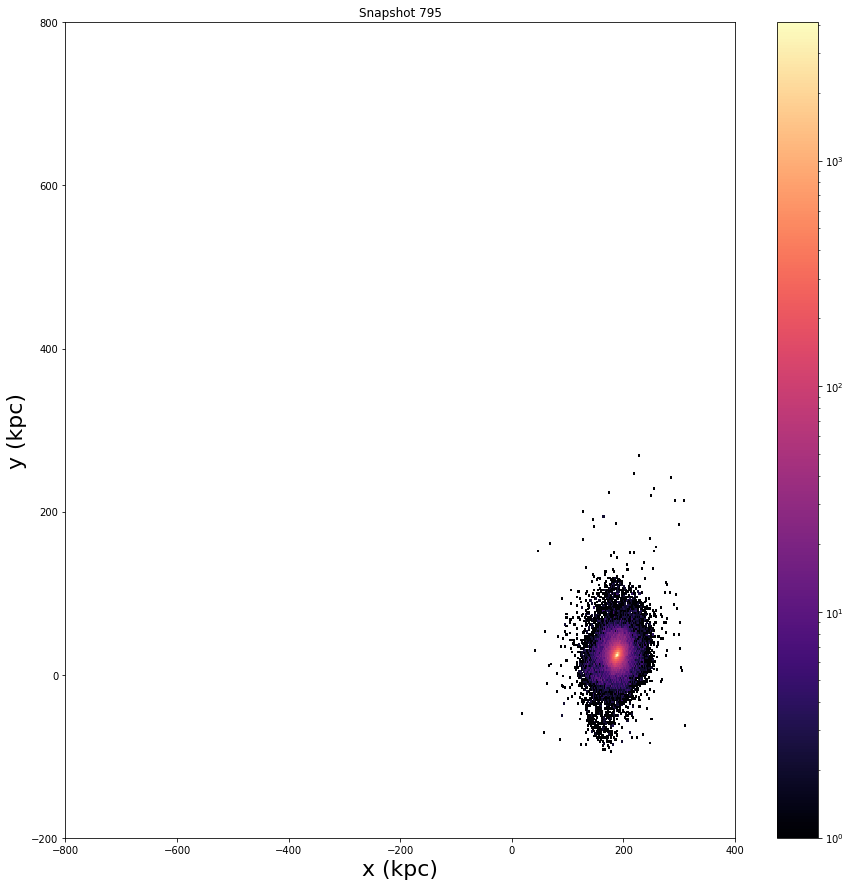

000800


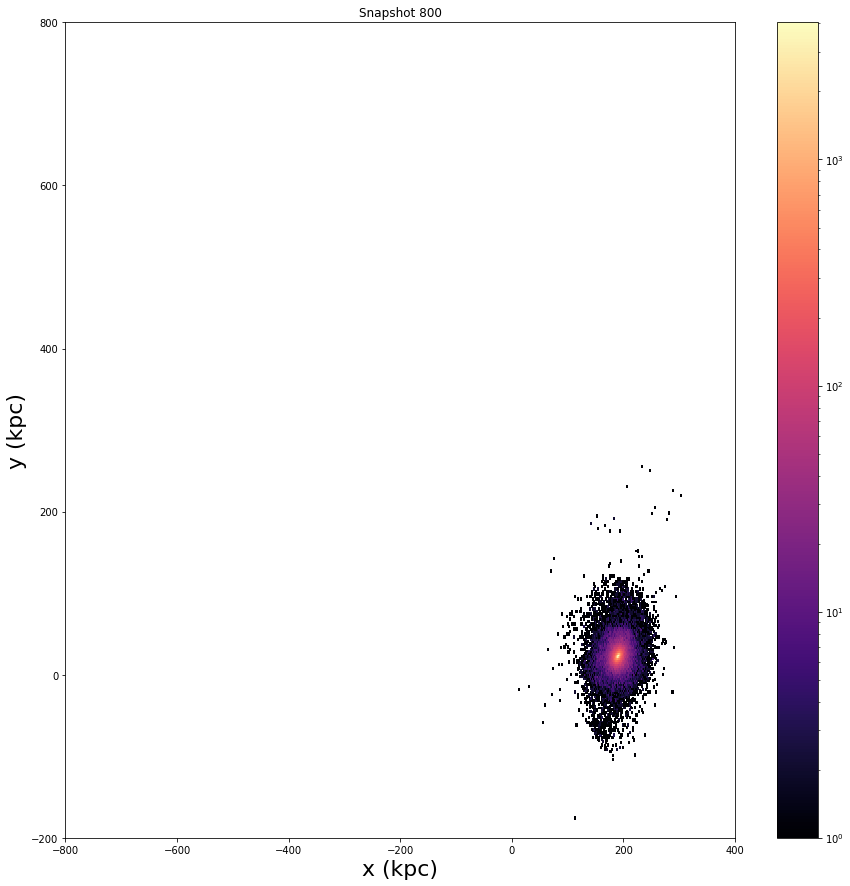

In [9]:
#creating a time array so that I can look at every 5 snapshots
time = np.arange(0,805,5)

for i in time:
    ### Identifying which file/snapshot using ###
    #print(i)
    #add a string of the filenumber to the value "000"
    ilbl = '000' + str(i)
    print(ilbl)
    
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    
    
    #define filename for MW Galaxy snapshots 
    MWfilename = "MW_VLowRes/MW_" + ilbl + '.txt' 
    #define filename for MW Galaxy snapshots 
    M31filename = "M31_VLowRes/M31_" + ilbl + '.txt'
    
    #print(MWfilename)
    #print(M31filename)
    
    ### X and Y position 
    #create center of mass object using disk particles
    COM_MW = CenterOfMass(MWfilename, 2)
    COM_M31 = CenterOfMass(M31filename,2)
    
    #just the position based on the coordinates from CenterofMass outplut
    MWx = COM_MW.x
    MWy = COM_MW.y
    M31x = COM_M31.x
    M31y = COM_M31.y
    
    #plotting in individual snapshots
    fig, ax= plt.subplots(figsize=(15, 15))

    #plotting the particle density using a 2D histogram
    plt.hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
    plt.hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma' )
    plt.colorbar()
    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y (kpc)', fontsize=22)

    #set axis limits
    plt.ylim(-200,800)
    plt.xlim(-800,400)
    
    plt.title("Snapshot " + str(i))
    
    plt.show()

[4.6]
[]
[4.7]
[4.8]
[4.8]
[]
[4.7]
[4.7]
[4.6]
[4.8]
[4.7]
[]
[4.7]
[4.6]
[4.8]


KeyboardInterrupt: 

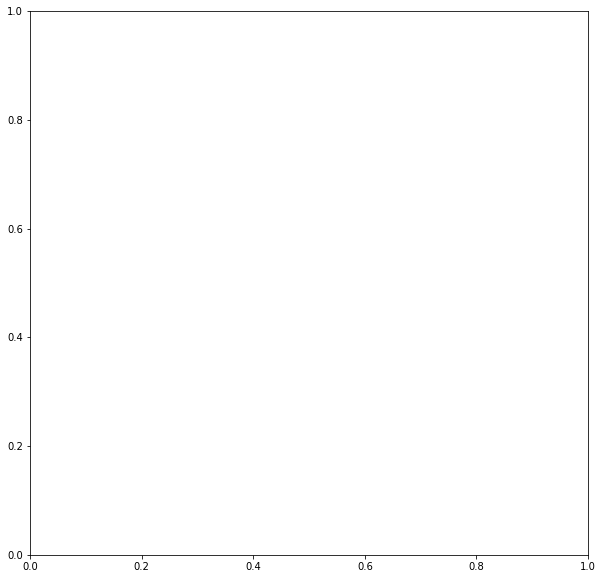

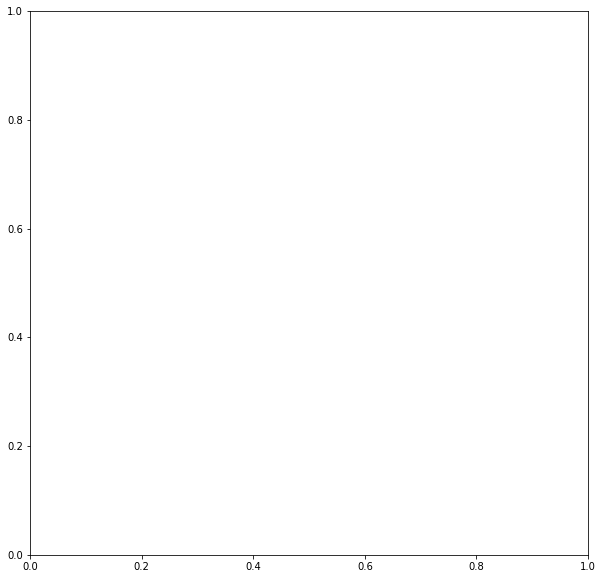

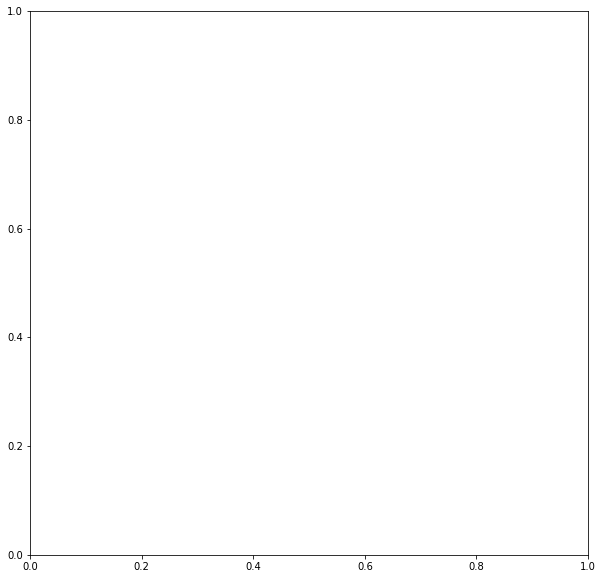

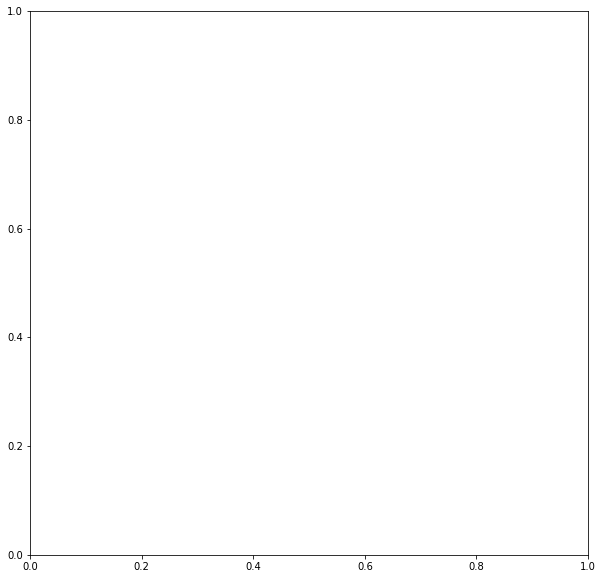

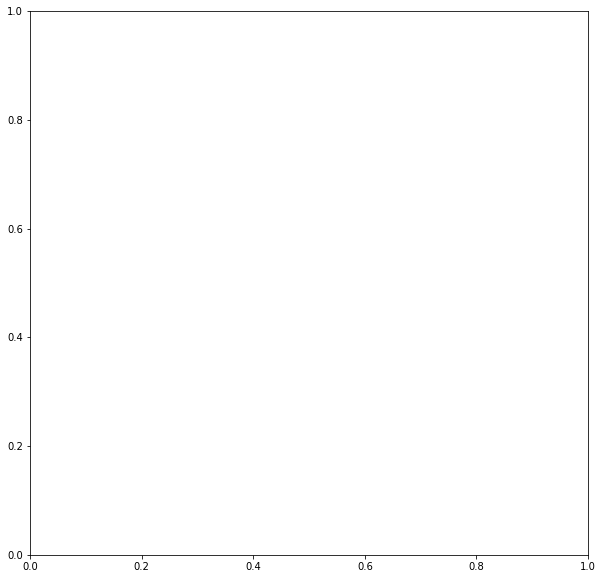

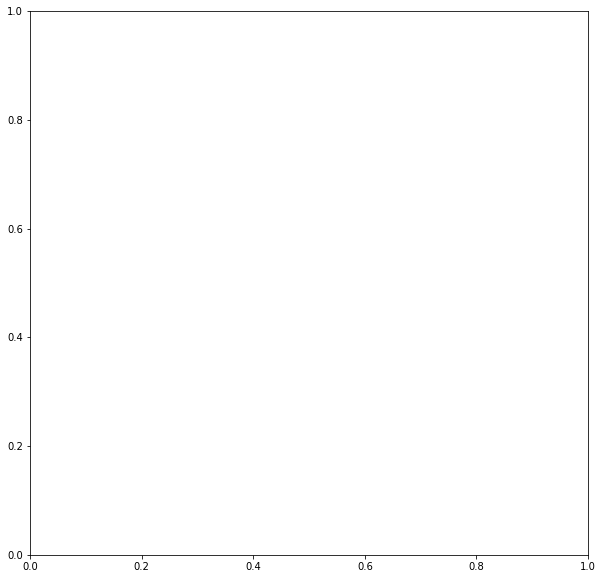

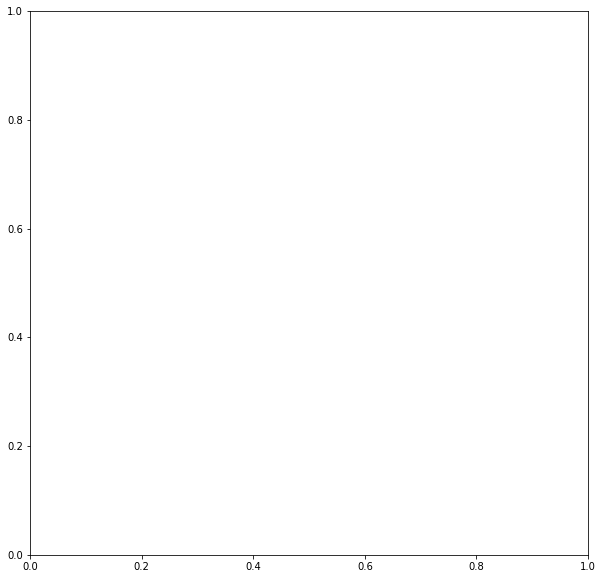

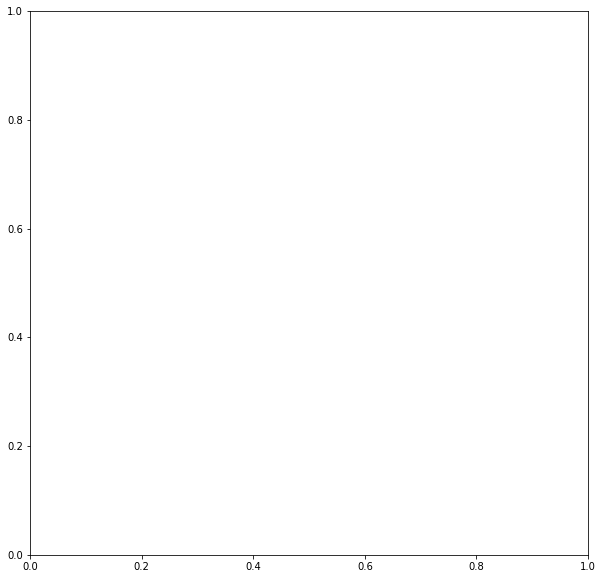

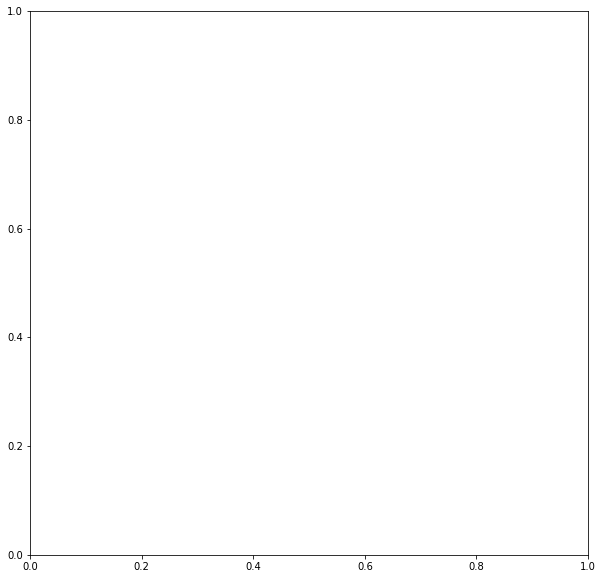

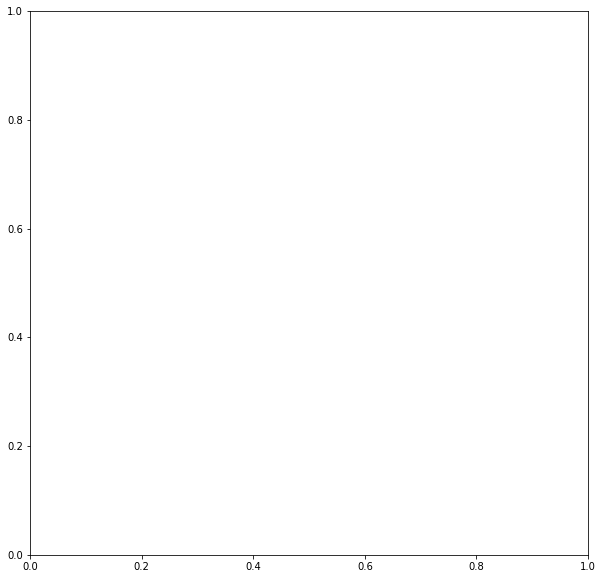

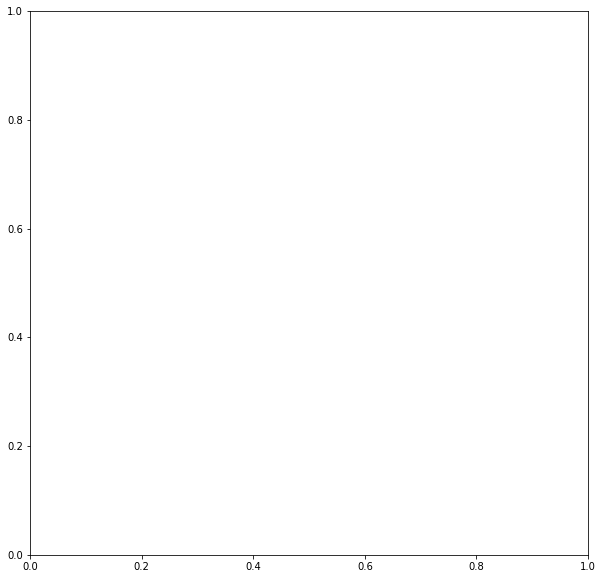

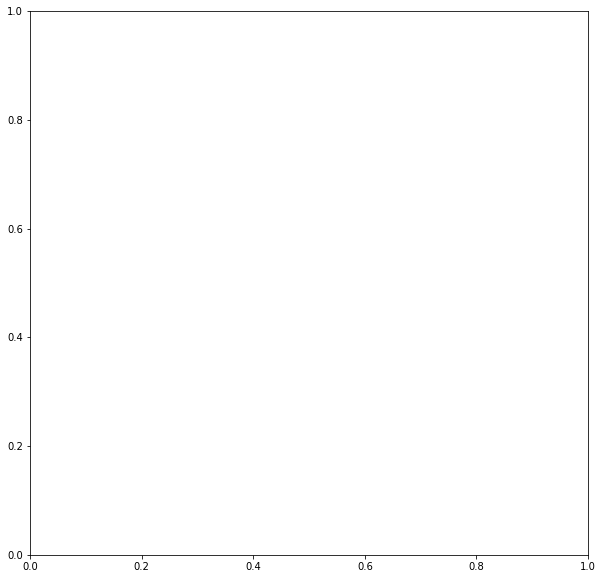

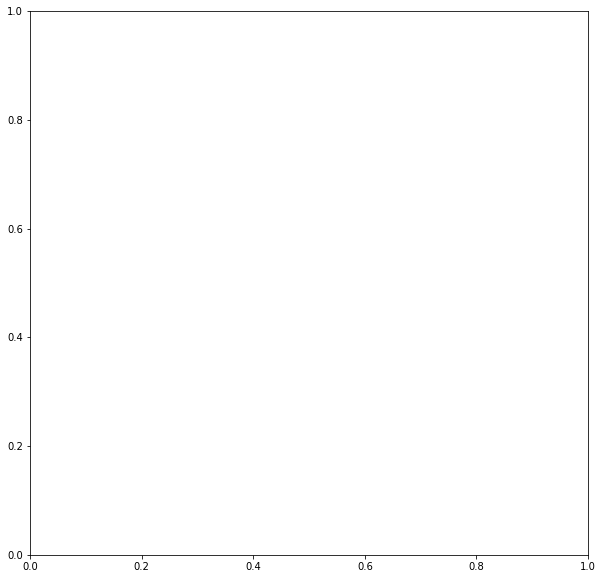

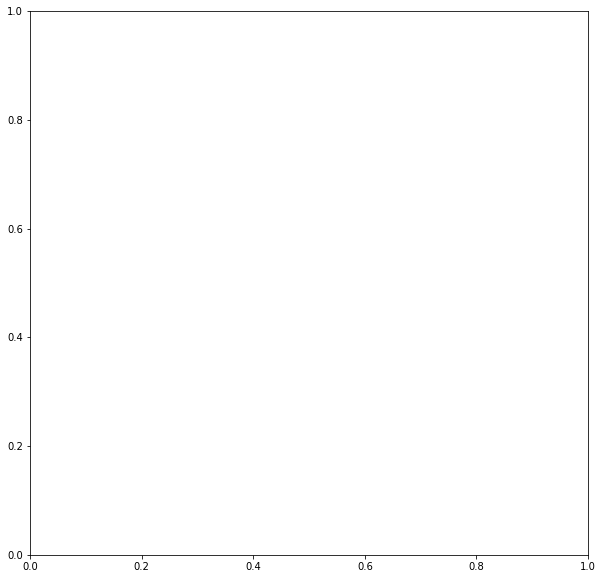

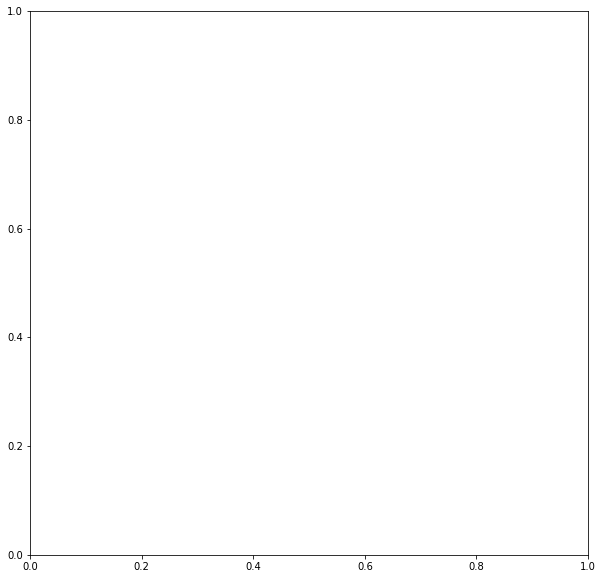

In [16]:
time = np.arange(0,805,5)

def SersicE(R,Re,n,Mtot):
        #inputs:
        #R - the radius (units: kpc)
        #Re- the half light radius (units: kpc)
        #n - Sercic Index
        #Mtot - total stellar mass of the system (untis: Msun)
        #Returns:
        #Surface brightness profile (units: Lsun/kpc^2)

        #assume mass to light = 1
    L = Mtot #total luminosity = total stellar mass

    #from equation above for Ie
    Ie = L/7.2/np.pi/Re**2

    #exponent term
    A = (R/Re)**(1/n)-1

    return Ie*np.exp(-7.67*A)

for i in time:
    ilbl = '000' + str(i)
    #print(ilbl)
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    
    #create sersic data
    MW = MassProfile("MW_VLowRes/MW",ilbl)
    M31 = MassProfile("M31_VLowRes/M31",ilbl)
    
    #create an array of radii
    r = np.arange(0.1,30.0,0.1)

    #create mass profile of the stellar mass of both galaxies
    #use particle type 2 for this then
    MW_StellarMass = MW.MassEnclosed(2,r)
    M31_StellarMass = M31.MassEnclosed(2,r)
    
    #compute surface mass density profile, assuming M/L ~ 1
    #I = L/4 pi D^2
    #note- spherical, may not be appropriate for a disk
    MW_StellarI = MW_StellarMass/4/np.pi/r**2
    M31_StellarI = M31_StellarMass/4/np.pi/r**2

    #compute half mass radius
    #total mass of stellar disk
    MW_StellarTotal = np.max(MW_StellarMass)
    M31_StellarTotal = np.max(M31_StellarMass)
    #find half mass radius by finding where mass drops by factor of 1/3
    MW_Low = MW_StellarTotal/2
    MW_High = MW_StellarTotal/2 + MW_StellarTotal/2*0.01
    M31_Low = M31_StellarTotal/2
    M31_High = M31_StellarTotal/2 + M31_StellarTotal/2*0.01
    #index for both galaxies
    index_MW = np.where((MW_StellarMass > MW_Low) & (MW_StellarMass < MW_High))
    index_M31 = np.where((M31_StellarMass > M31_Low) & (M31_StellarMass < M31_High))

    ReMW = r[index_MW]
    ReM31 = r[index_M31]
    
    print(ReMW)
    
    ##plotting
    
    fig = plt.figure(figsize=(10,10))
    ax=plt.subplot(111)

    """#plot disk luminosity density- this is a proxy for surface density
    plt.semilogy(r,MW_StellarI, color='blue',linewidth=3,label = "MW Disk Particles")
    plt.semilogy(r,M31_StellarI, color='red', linewidth = 3, label = "M31 Disk Particles")

    #Sersic
    plt.semilogy(r,SersicE(r, ReMW[i], 4, MW_StellarTotal), color = 'black', linestyle = '--',
                linewidth = 3, label = 'Sersic n=4, Elliptical')

    plt.semilogy(r,SersicE(r, ReMW[i], 1, MW_StellarTotal), color = 'black', linestyle = ':',
                linewidth = 3, label = 'Sersic n=1, Spiral')

    # Add axis labels
    plt.xlabel('Radius (kpc)', fontsize=22)
    plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
    plt.ylim(1e5,1e11)

    # add a legend with some customizations.
    legend = ax.legend(loc='upper right',fontsize='x-large')
"""

Note above: there is an issue with the Re/ReMW term in my plots after the loop, it is something that I want to discuss during the hack day in class

#### Attempt at the side by side plots

for this code I would also like to make a movie that shows the position and sersic profile over time as a movie- right now doing an attempt to show the profile at the beginning of the merger and at the end to test out this side by side plotting format

note: for the "beginning" I am looking at the snapshot of when the galaxies come together after the first large encounter, and the end is the final snapshot

ValueError: operands could not be broadcast together with shapes (299,) (0,) 

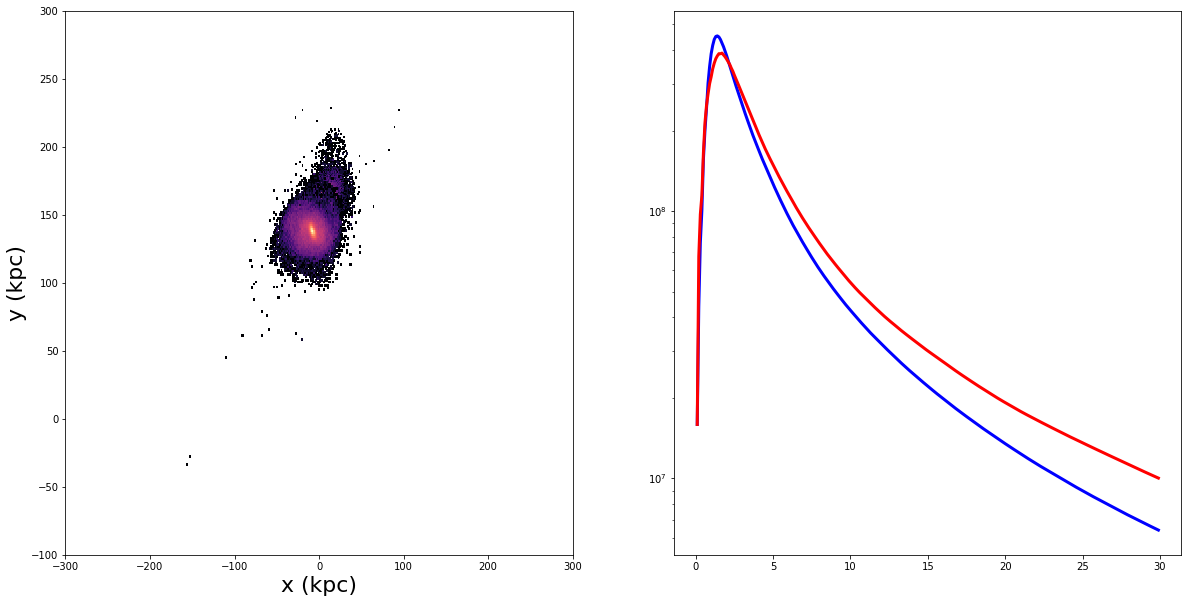

In [17]:
### from first attempt in the position plots above I have found
### the "beginning" to be at snapshot 405

#beginning profile of merger

#COM Data for MW Disk
COM_MW = CenterOfMass("MW_VLowRes/MW_405.txt",2)
#COM Data for M31 Disk
COM_M31 = CenterOfMass("M31_VLowRes/M31_405.txt",2)

#COM position by Galaxy
#MW
COMP_MW = COM_MW.COM_P(0.1)
#M31
COMP_M31 = COM_M31.COM_P(0.1)

#just the position based on the coordinates from CenterofMass outplut
MWx = COM_MW.x
MWy = COM_MW.y
M31x = COM_M31.x
M31y = COM_M31.y

#Sersic Function
def SersicE(R,Re,n,Mtot):
#inputs:
    #R - the radius (units: kpc)
    #Re- the half light radius (units: kpc)
    #n - Sercic Index
    #Mtot - total stellar mass of the system (untis: Msun)
#Returns:
    #Surface brightness profile (units: Lsun/kpc^2)
    
    #assume mass to light = 1
    L = Mtot #total luminosity = total stellar mass
    
    #from equation above for Ie
    Ie = L/7.2/np.pi/Re**2
    
    #exponent term
    A = (R/Re)**(1/n)-1
    
    return Ie*np.exp(-7.67*A)

MW = MassProfile("MW_VLowRes/MW",405)
M31 = MassProfile("M31_VLowRes/M31",405)

#create an array of radii
r = np.arange(0.1,30.0,0.1)

#create mass profile of the stellar mass of both galaxies
#use particle type 2 for this then
MW_StellarMass = MW.MassEnclosed(2,r)
M31_StellarMass = M31.MassEnclosed(2,r)


#compute surface mass density profile, assuming M/L ~ 1
#I = L/4 pi D^2
#note- spherical, may not be appropriate for a disk
MW_StellarI = MW_StellarMass/4/np.pi/r**2
M31_StellarI = M31_StellarMass/4/np.pi/r**2

#compute half mass radius
#total mass of stellar disk
MW_StellarTotal = np.max(MW_StellarMass)
M31_StellarTotal = np.max(M31_StellarMass)
#find half mass radius by finding where mass drops by factor of 1/3
MW_Low = MW_StellarTotal/2
MW_High = MW_StellarTotal/2 + MW_StellarTotal/2*0.01
M31_Low = M31_StellarTotal/2
M31_High = M31_StellarTotal/2 + M31_StellarTotal/2*0.01
#index for both galaxies
index_MW = np.where((MW_StellarMass > MW_Low) & (MW_StellarMass < MW_High))
index_M31 = np.where((M31_StellarMass > M31_Low) & (M31_StellarMass < M31_High))

ReMW = r[index_MW]
ReM31 = r[index_M31]

#plotting with position on the left and sersic profile on the right
fig, ax = plt.subplots(nrows=1, ncols=2, figsize =(20 ,10)) 

ax[0].hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
ax[0].hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma' )
#plt.colorbar()
# Add axis labels
ax[0].set_xlabel('x (kpc)', fontsize=22)
ax[0].set_ylabel('y (kpc)', fontsize=22)
#set axis limits
ax[0].set_ylim(-100,300)
ax[0].set_xlim(-300,300)

#plot disk luminosity density- this is a proxy for surface density
ax[1].semilogy(r,MW_StellarI, color='blue',linewidth=3,label = "MW Disk Particles")
ax[1].semilogy(r,M31_StellarI, color='red', linewidth = 3, label = "M31 Disk Particles")

#Sersic
ax[1].semilogy(r,SersicE(r, ReMW, 4, MW_StellarTotal), color = 'black', linestyle = '--',
            linewidth = 3, label = 'Sersic n=4, Elliptical')

ax[1].semilogy(r,SersicE(r, ReMW, 1, MW_StellarTotal), color = 'black', linestyle = ':',
            linewidth = 3, label = 'Sersic n=1, Spiral')
# Add axis labels
ax[1].set_xlabel('Radius (kpc)', fontsize=22)
ax[1].set_ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
#limit on the yscale
ax[1].ylim(1e5,1e11)

legend = ax[1].legend(loc='upper right',fontsize='x-large')


#end profile of merger

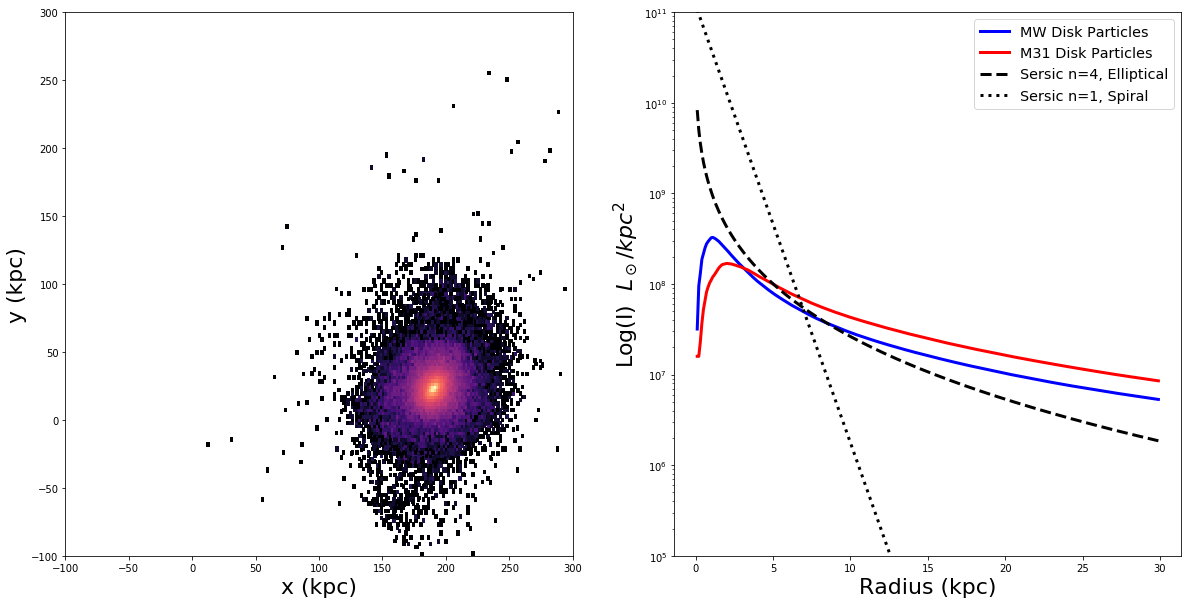

In [20]:
#end profile- snap 800

#COM Data for MW Disk
COM_MW = CenterOfMass("MW_VLowRes/MW_800.txt",2)
#COM Data for M31 Disk
COM_M31 = CenterOfMass("M31_VLowRes/M31_800.txt",2)

#COM position by Galaxy
#MW
COMP_MW = COM_MW.COM_P(0.1)
#M31
COMP_M31 = COM_M31.COM_P(0.1)

#just the position based on the coordinates from CenterofMass outplut
MWx = COM_MW.x
MWy = COM_MW.y
M31x = COM_M31.x
M31y = COM_M31.y

#Sersic Function
def SersicE(R,Re,n,Mtot):
#inputs:
    #R - the radius (units: kpc)
    #Re- the half light radius (units: kpc)
    #n - Sercic Index
    #Mtot - total stellar mass of the system (untis: Msun)
#Returns:
    #Surface brightness profile (units: Lsun/kpc^2)
    
    #assume mass to light = 1
    L = Mtot #total luminosity = total stellar mass
    
    #from equation above for Ie
    Ie = L/7.2/np.pi/Re**2
    
    #exponent term
    A = (R/Re)**(1/n)-1
    
    return Ie*np.exp(-7.67*A)

MW = MassProfile("MW_VLowRes/MW",800)
M31 = MassProfile("M31_VLowRes/M31",800)

#create an array of radii
r = np.arange(0.1,30.0,0.1)

#create mass profile of the stellar mass of both galaxies
#use particle type 2 for this then
MW_StellarMass = MW.MassEnclosed(2,r)
M31_StellarMass = M31.MassEnclosed(2,r)


#compute surface mass density profile, assuming M/L ~ 1
#I = L/4 pi D^2
#note- spherical, may not be appropriate for a disk
MW_StellarI = MW_StellarMass/4/np.pi/r**2
M31_StellarI = M31_StellarMass/4/np.pi/r**2

#compute half mass radius
#total mass of stellar disk
MW_StellarTotal = np.max(MW_StellarMass)
M31_StellarTotal = np.max(M31_StellarMass)
#find half mass radius by finding where mass drops by factor of 1/3
MW_Low = MW_StellarTotal/2
MW_High = MW_StellarTotal/2 + MW_StellarTotal/2*0.01
M31_Low = M31_StellarTotal/2
M31_High = M31_StellarTotal/2 + M31_StellarTotal/2*0.01
#index for both galaxies
index_MW = np.where((MW_StellarMass > MW_Low) & (MW_StellarMass < MW_High))
index_M31 = np.where((M31_StellarMass > M31_Low) & (M31_StellarMass < M31_High))

ReMW = r[index_MW]
ReM31 = r[index_M31]

#plotting with position on the left and sersic profile on the right
fig, ax = plt.subplots(nrows=1, ncols=2, figsize =(20 ,10)) 

ax[0].hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
ax[0].hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma' )
#plt.colorbar()
# Add axis labels
ax[0].set_xlabel('x (kpc)', fontsize=22)
ax[0].set_ylabel('y (kpc)', fontsize=22)
#set axis limits
ax[0].set_ylim(-100,300)
ax[0].set_xlim(-100,300)

#plot disk luminosity density- this is a proxy for surface density
ax[1].semilogy(r,MW_StellarI, color='blue',linewidth=3,label = "MW Disk Particles")
ax[1].semilogy(r,M31_StellarI, color='red', linewidth = 3, label = "M31 Disk Particles")

#Sersic
ax[1].semilogy(r,SersicE(r, ReMW, 4, MW_StellarTotal), color = 'black', linestyle = '--',
            linewidth = 3, label = 'Sersic n=4, Elliptical')

ax[1].semilogy(r,SersicE(r, ReMW, 1, MW_StellarTotal), color = 'black', linestyle = ':',
            linewidth = 3, label = 'Sersic n=1, Spiral')
# Add axis labels
ax[1].set_xlabel('Radius (kpc)', fontsize=22)
ax[1].set_ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
#limit on the yscale
ax[1].set_ylim(1e5,1e11)

legend = ax[1].legend(loc='upper right',fontsize='x-large')


* Note: Not sure why I am getting an error with Re term at snapshot 405 but not 800- something I would like to try to fix during hack day

### Some other things I would like to attempt in this code for the final version of the project:

* would like to have a movie of the position and the sersic profile side by side to show how they are evolving over time (only reason did not attempt now was because I wanted to make sure the for loop worked and I was having issues with the Sersic profile for that)
* would like to make it posible to view the merger in 3D on the left hand side 
* would like to be able to differeniate on the position plot the M31 stellar disk particles and MW stellar disk particles to show how they are changing in the merger over time and how that may effect the classification of the merger- didn't address that part of the code here but I'm trying to think if it would be possible to either:
    - a: color the galaxies with different colormaps and have it show up clearly 
    - b: click on the sersic profile on the right side of the graph and have it highlight the disk particles on the left side of the plot that they correspond to. 